## ReneWind: Problem Statement

###Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 

### Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set, and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of the inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”. 

### Data Description

- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable


## Importing necessary libraries

In [1]:
# Reading and manipulating data
import pandas as pd
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value imputation
from sklearn.impute import SimpleImputer

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score, make_scorer, roc_curve, precision_recall_curve


# Data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Model tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipelines and personalisation 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 6/DataSets/Train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 6/DataSets/Test.csv")

In [4]:
train = train_data.copy()
test = test_data.copy()

## Data Overview

### First few rows of the dataset



In [ ]:
train.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

- Data was loaded properly

### Shape of the dataset


In [ ]:
train.shape

(20000, 41)

In [ ]:
test.shape

(5000, 41)

* Both datasets contain 41 columns.
* Training set has 20k variables, while test set has 5k.


### Data types of the columns

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- Both sets contain same types of column types (numerical).
- There seems to be some missing values on both sets for V1 and V2.

### Statistical summary 

In [ ]:
train.describe().T

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

- A statistical summary won't tell us much, since we have no knowledge of what the variables stand for.

### Checking for duplicate values



In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

- No duplicated values on either set.

### Checking for missing values

In [ ]:
train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- V1, and V2 have some missing values in both sets.

## EDA Summary


### Univariate analysis

In [ ]:
# Function to plot distirbution of numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

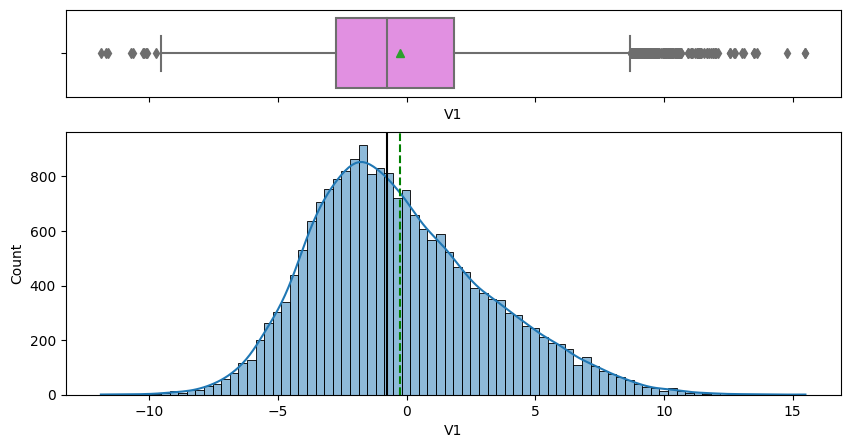

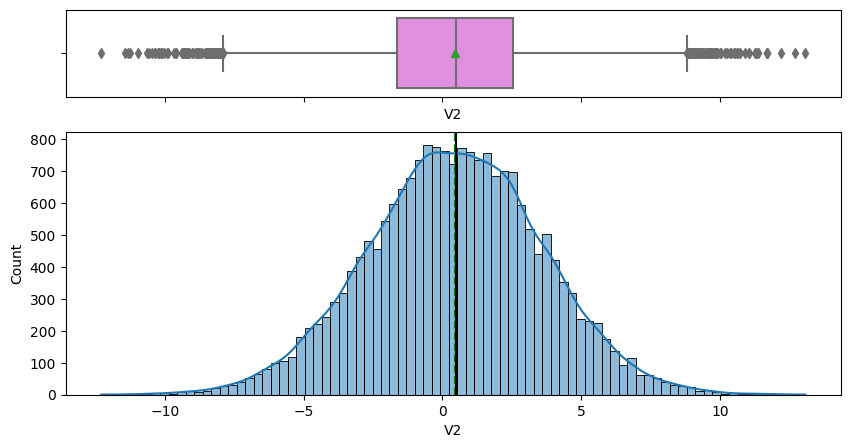

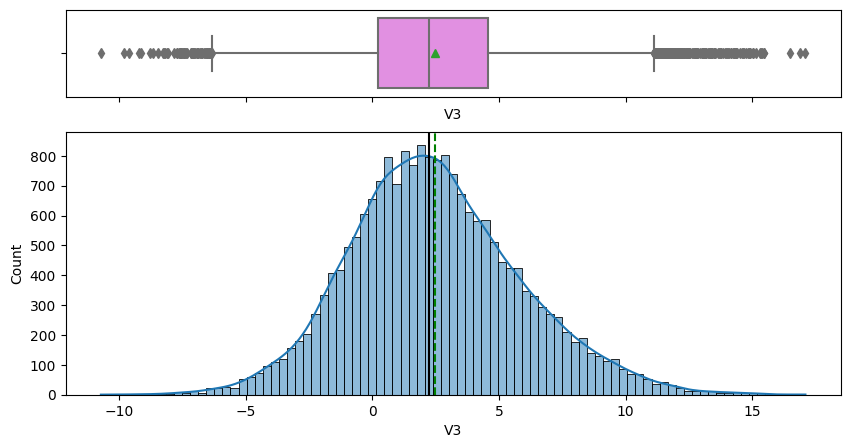

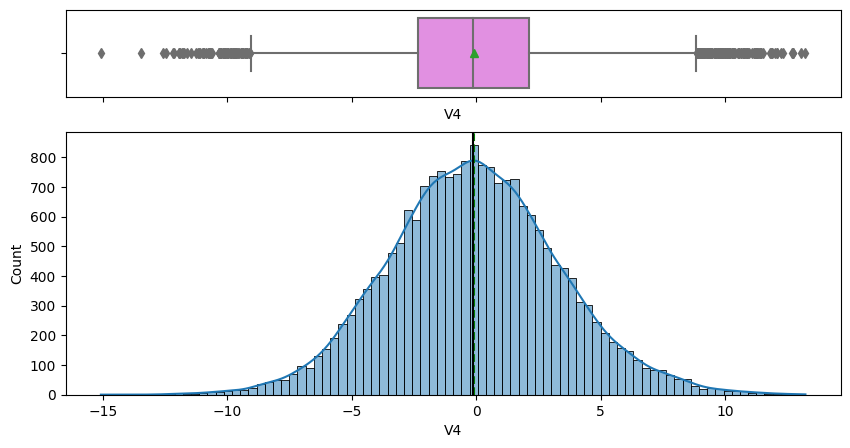

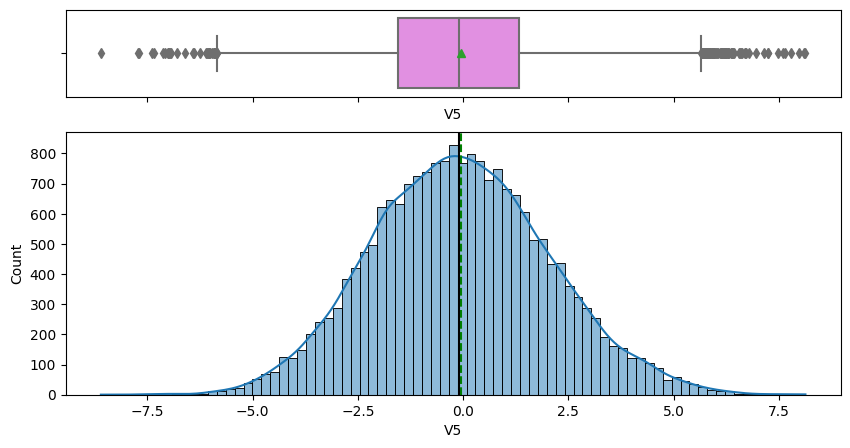

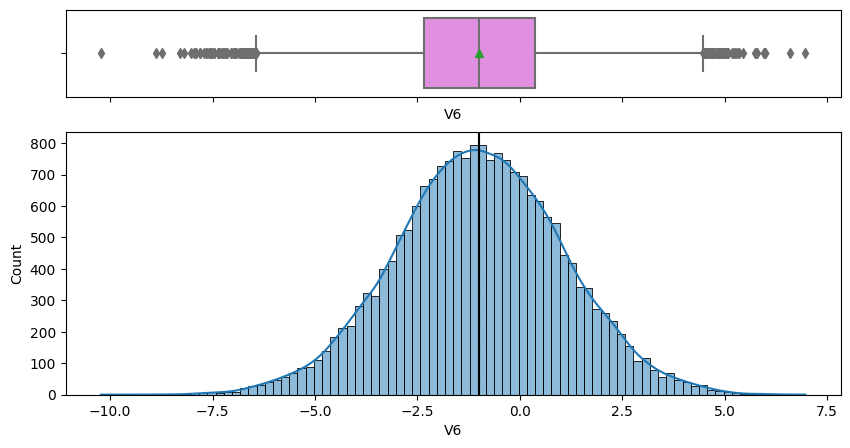

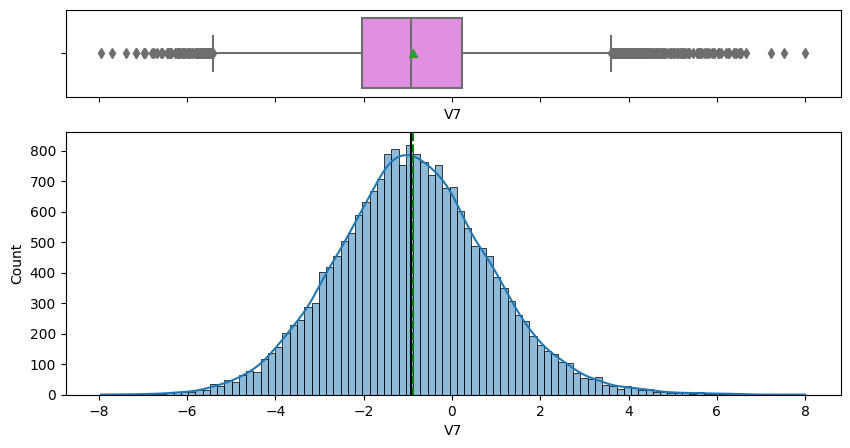

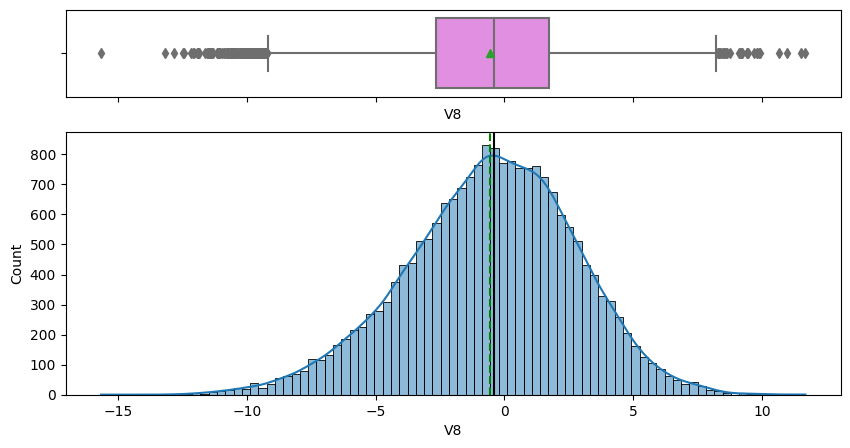

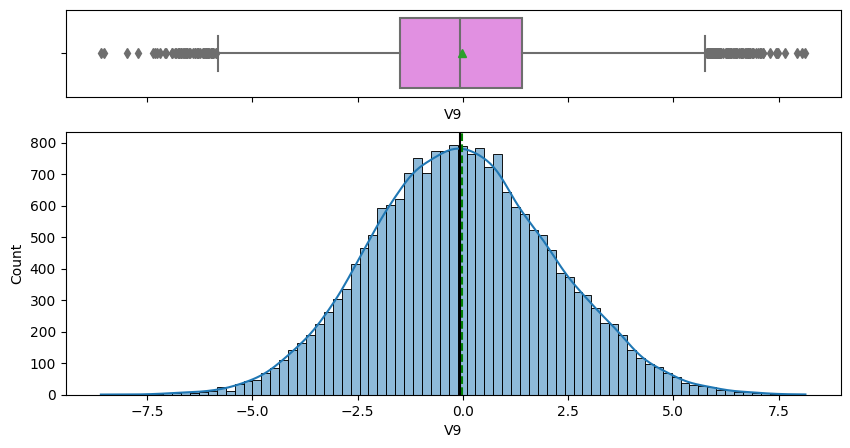

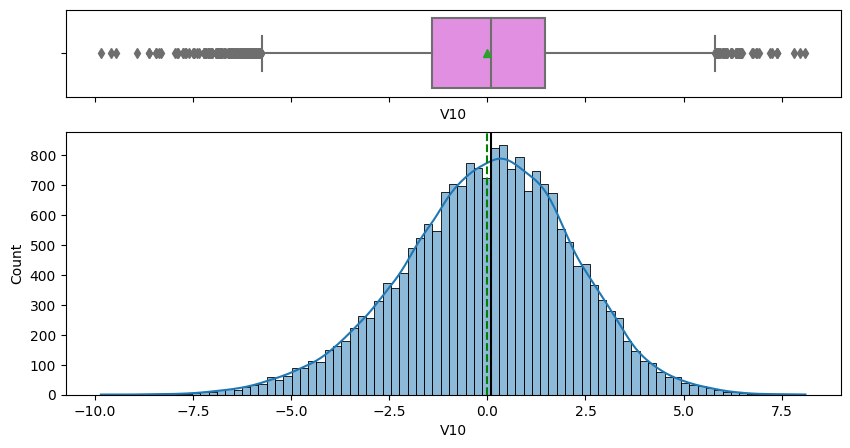

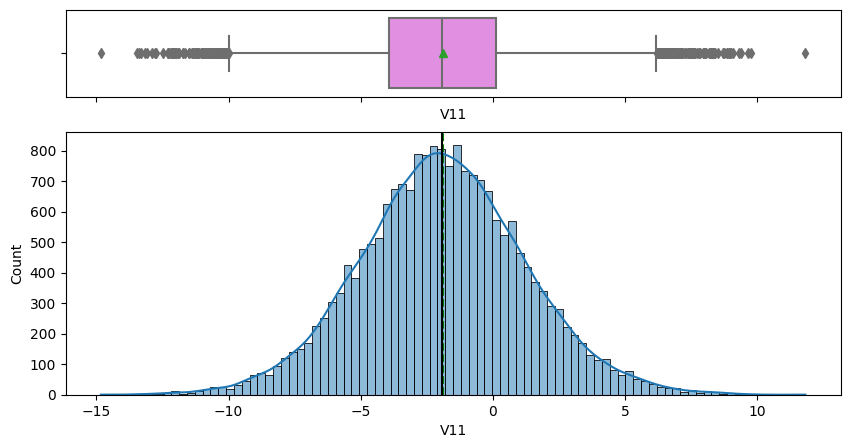

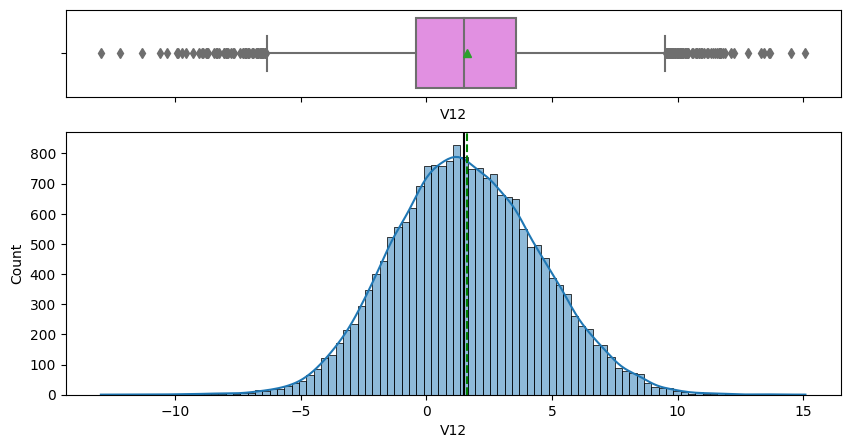

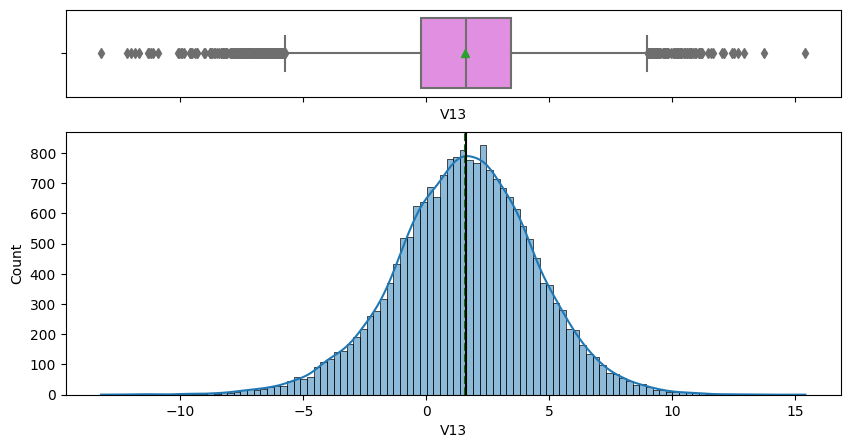

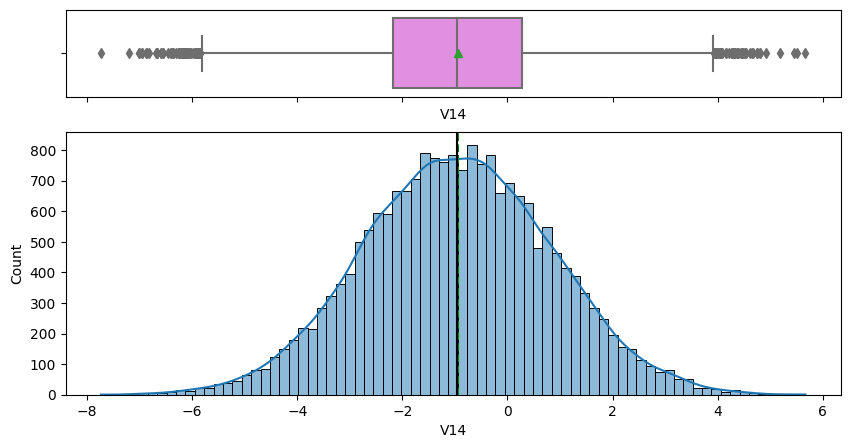

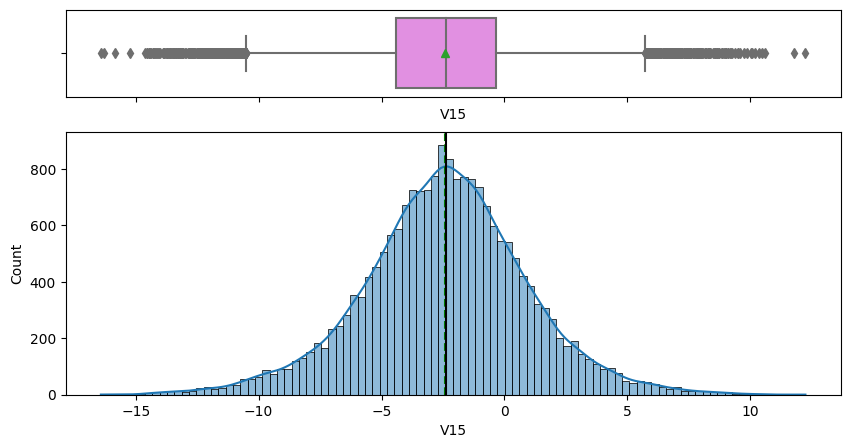

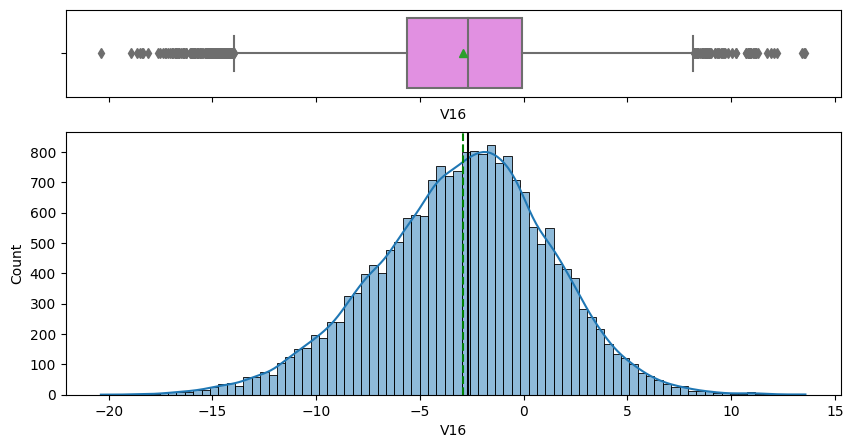

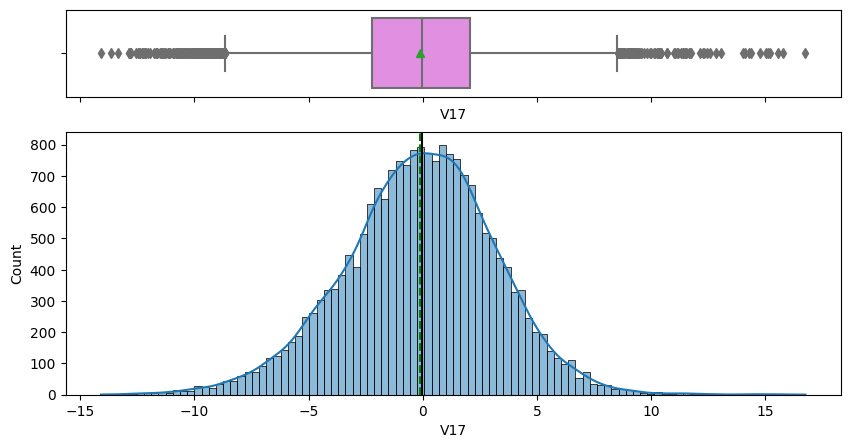

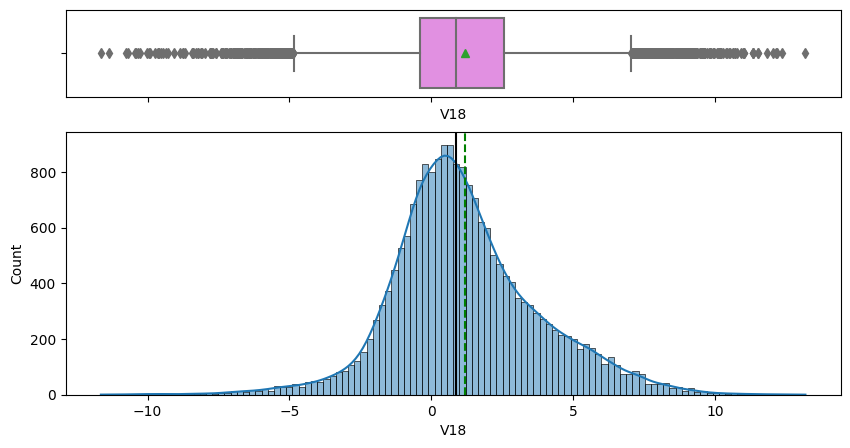

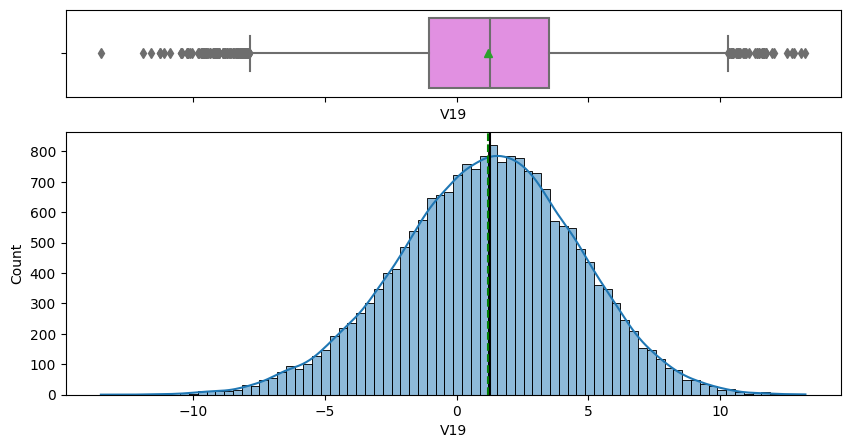

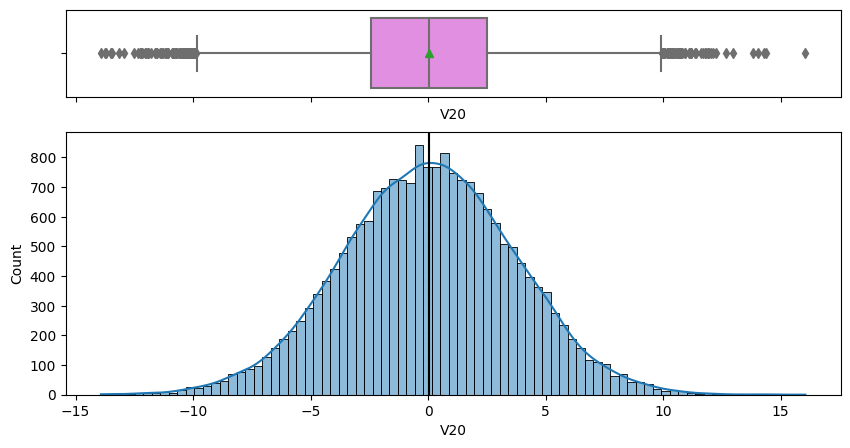

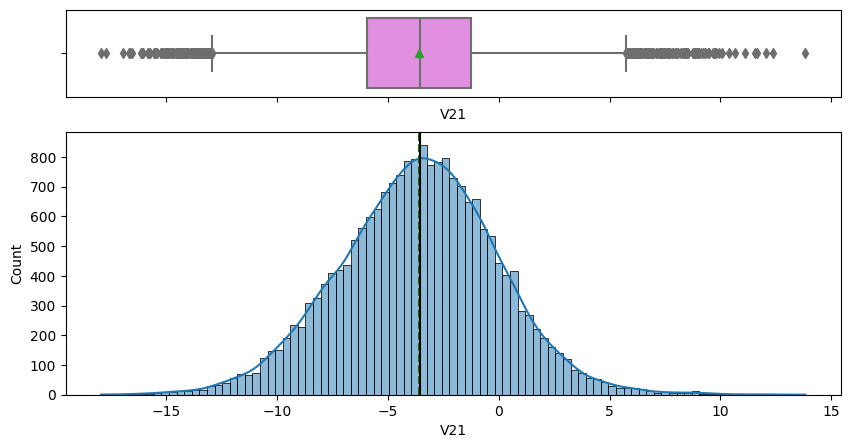

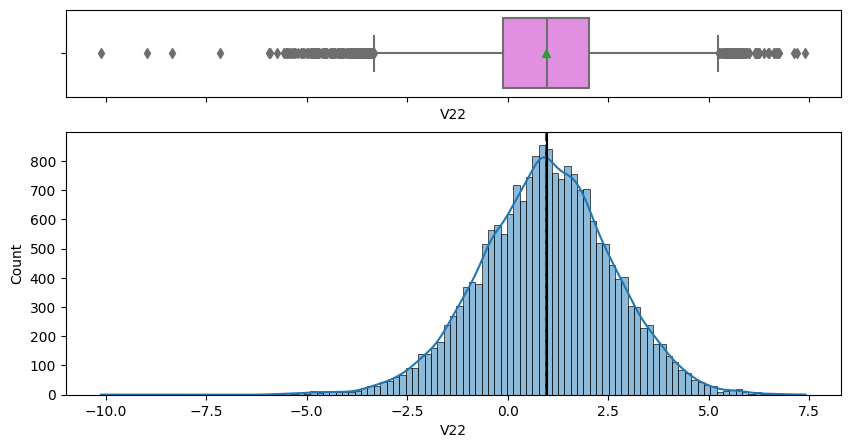

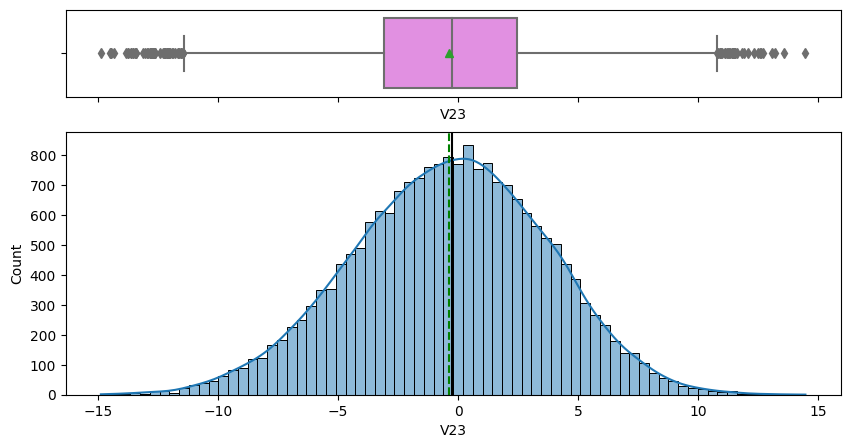

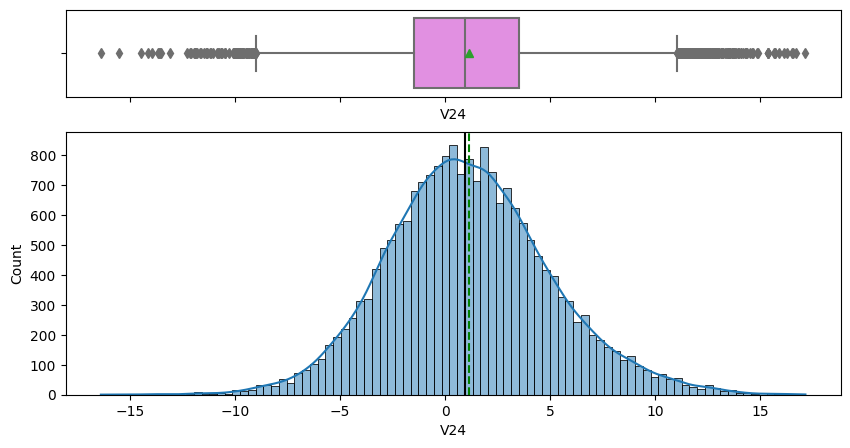

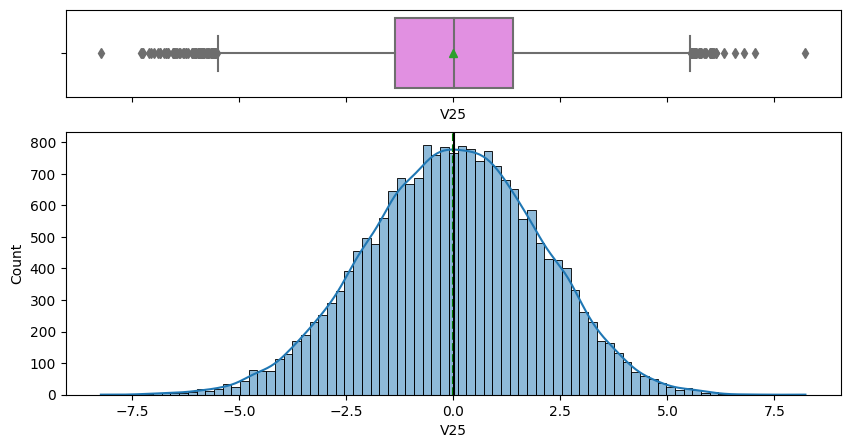

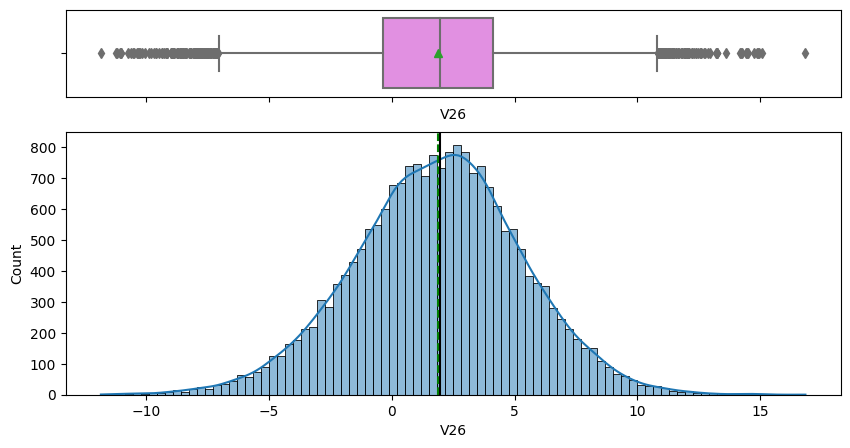

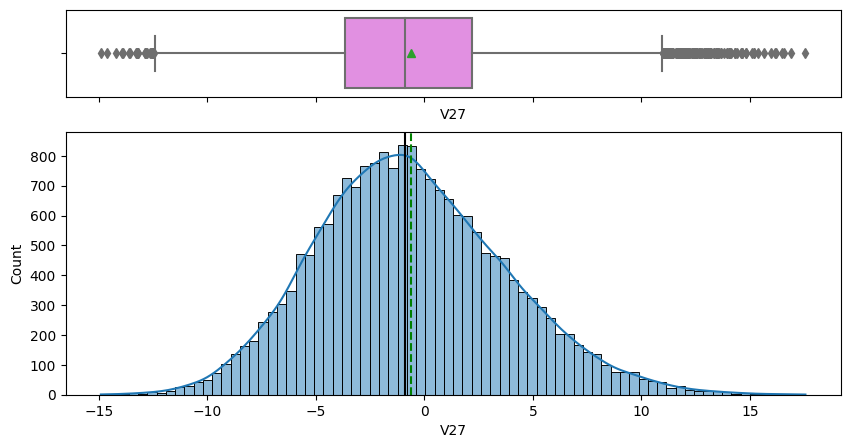

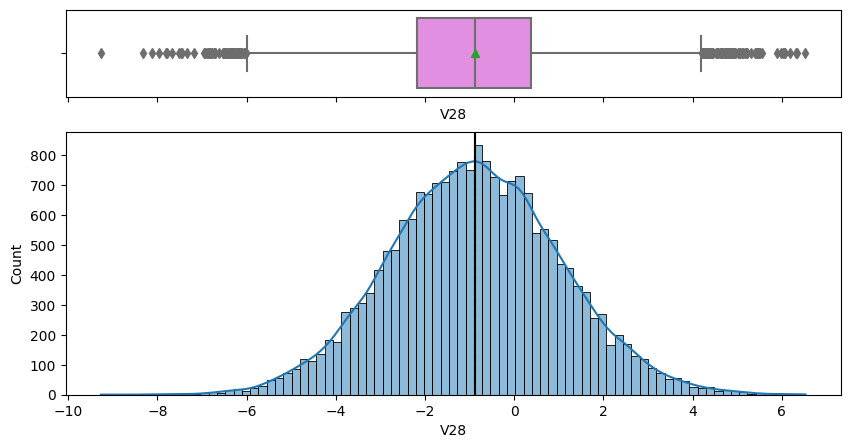

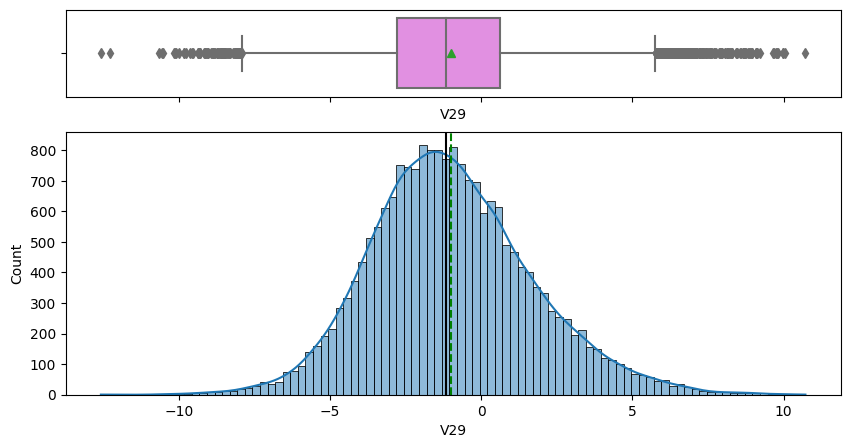

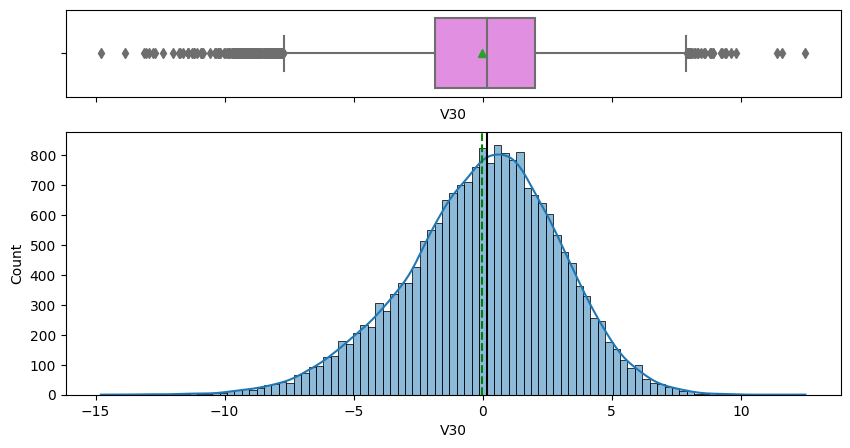

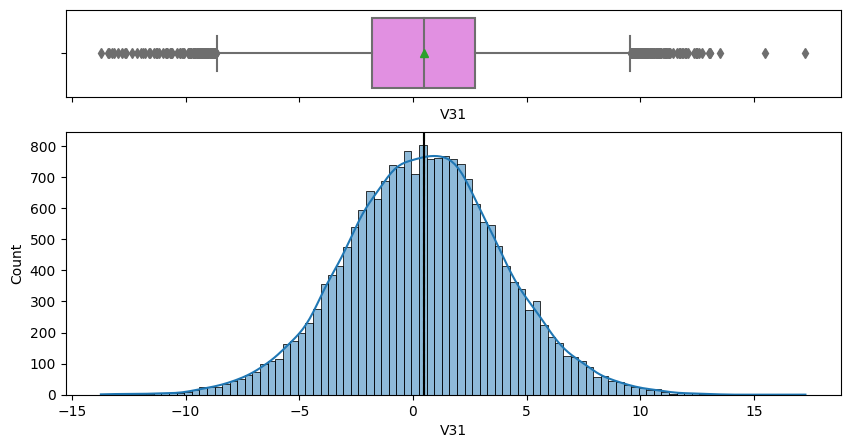

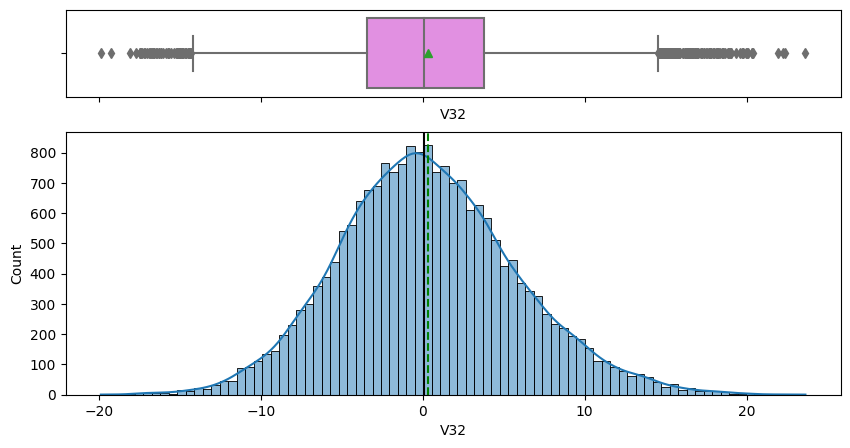

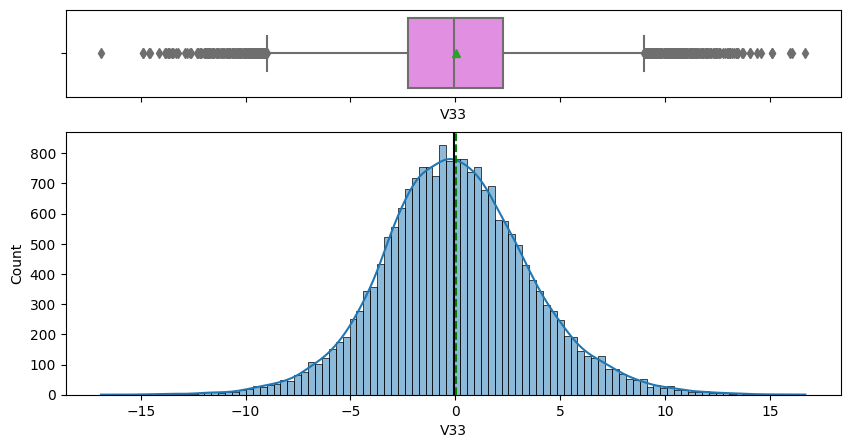

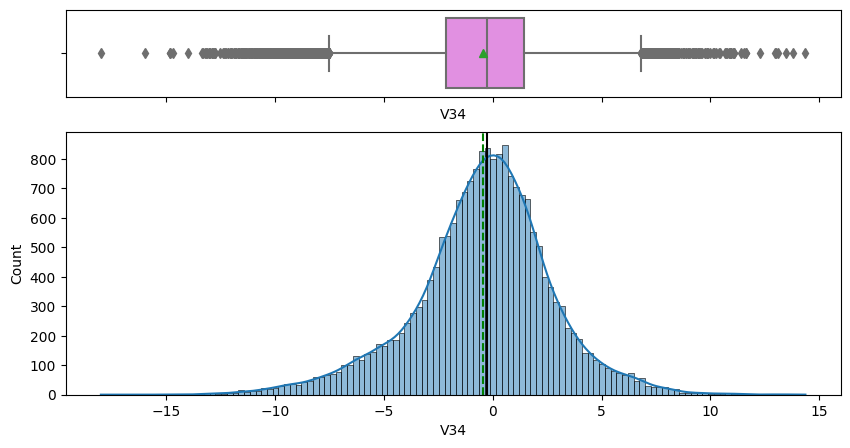

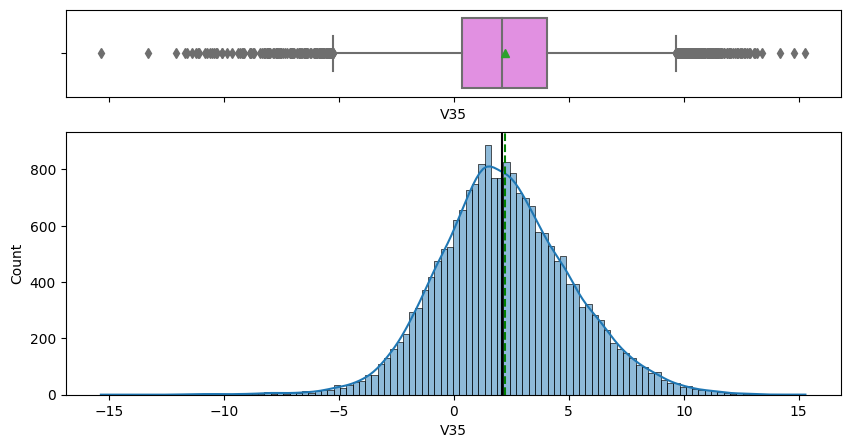

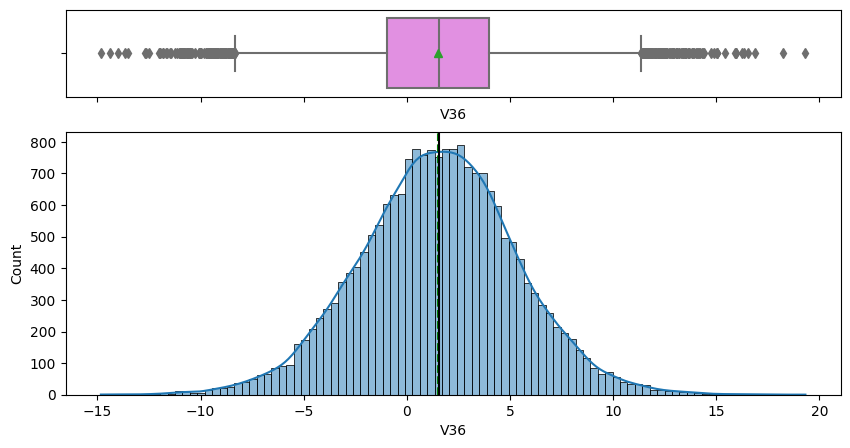

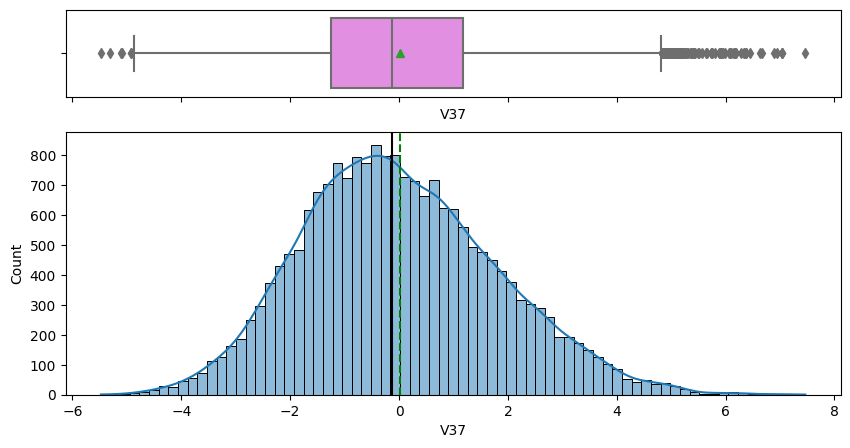

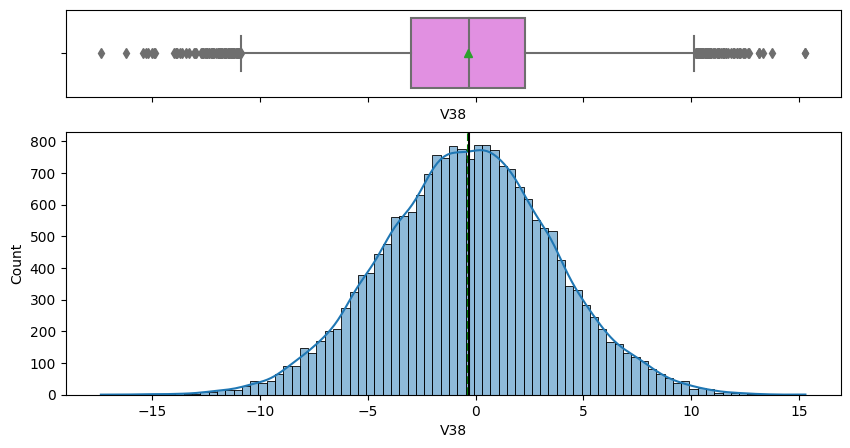

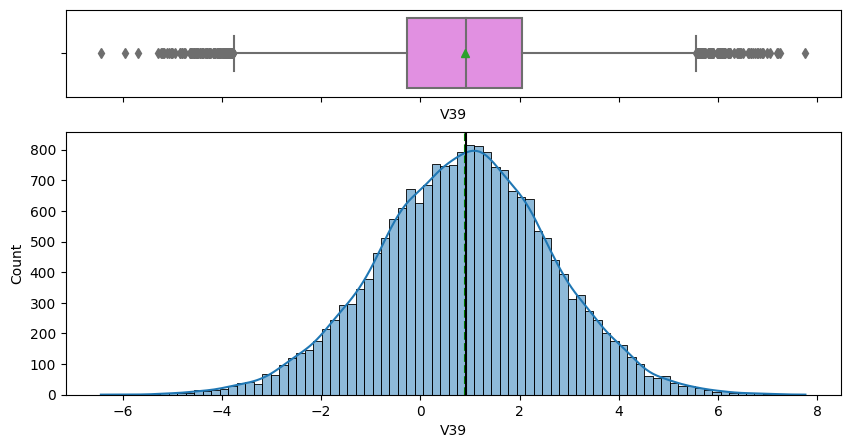

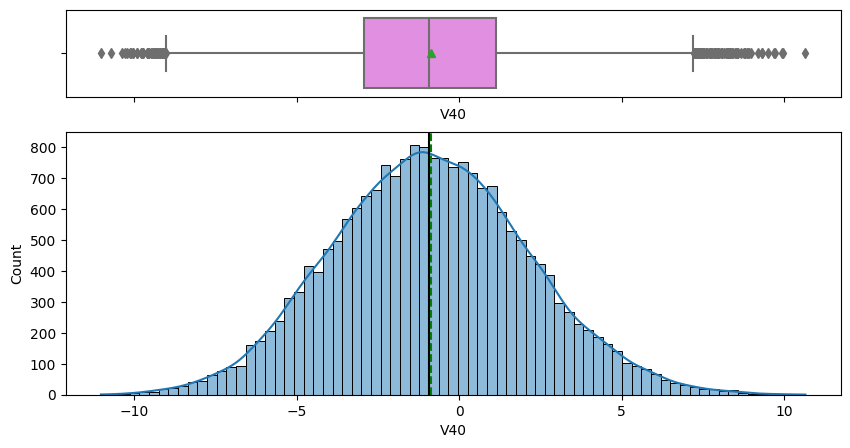

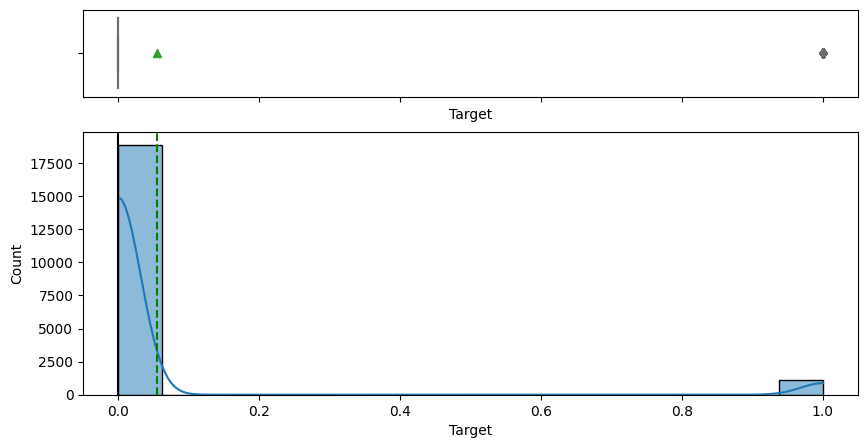

In [ ]:
# Creating conditional statement to graph all variables at once
for i in train.columns:
    histogram_boxplot(train, i, figsize=(10, 5), kde=True, bins=None)

- All independent variables are normally distributed.
- Target variable is disproportionately distributed between the two possible outcomes.

In [ ]:
train["Target"].value_counts()*100 / len(train)

0   94.450
1    5.550
Name: Target, dtype: float64

In [ ]:
test["Target"].value_counts()*100 / len(test)

0   94.360
1    5.640
Name: Target, dtype: float64

- Only ~5.6% of generators break.

### Bivariate analysis

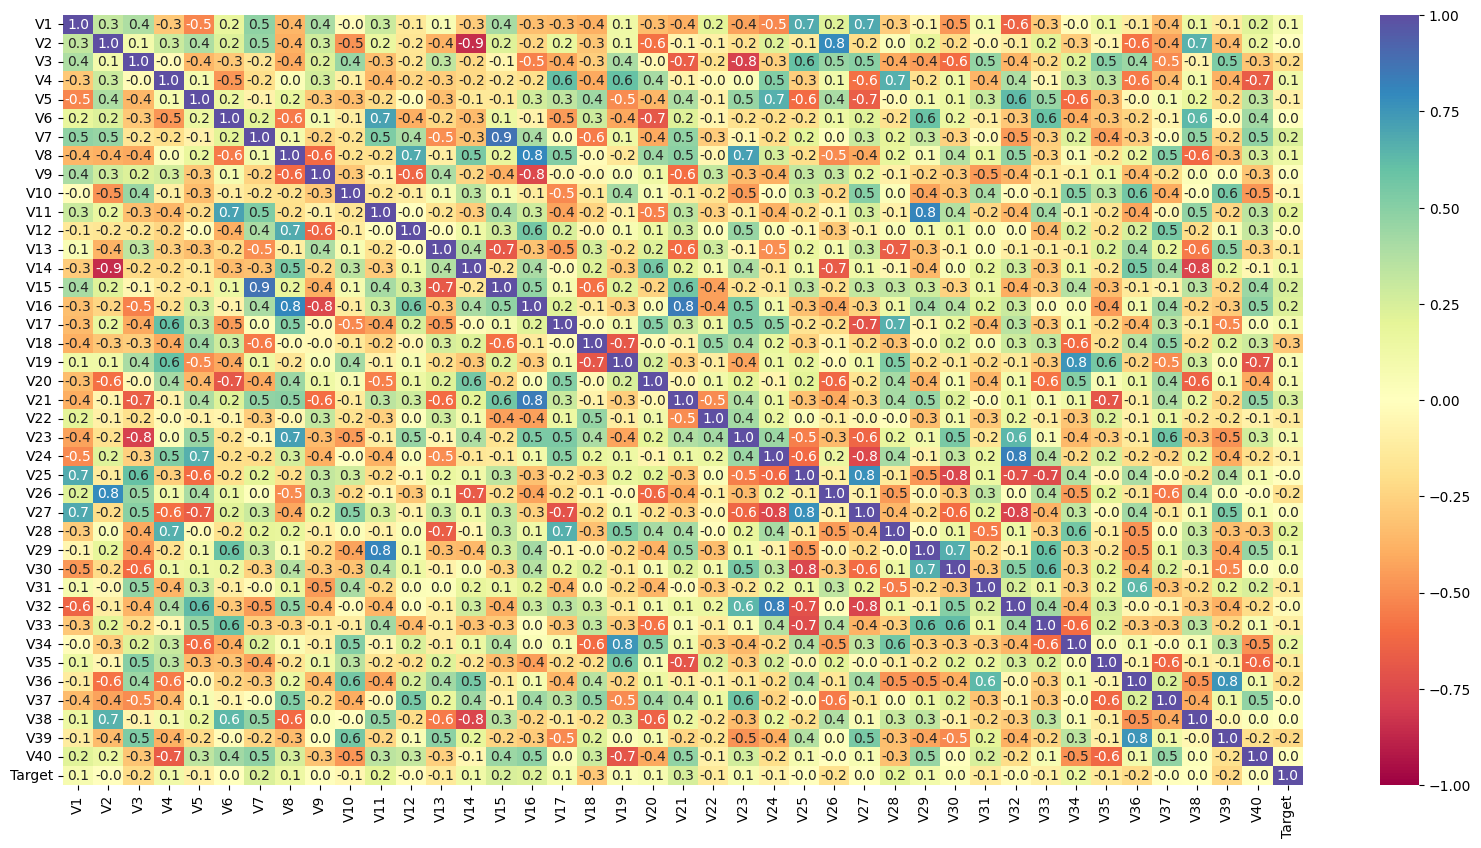

In [35]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))
sns.heatmap(train[num_cols].corr(), annot=True, vmin=-1, fmt=".1f", vmax=1, cmap="Spectral")
plt.show()

- There's many variables that seem to have high postive and negative correlations with each other.






In [30]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    
    plt.tight_layout()
    plt.show()

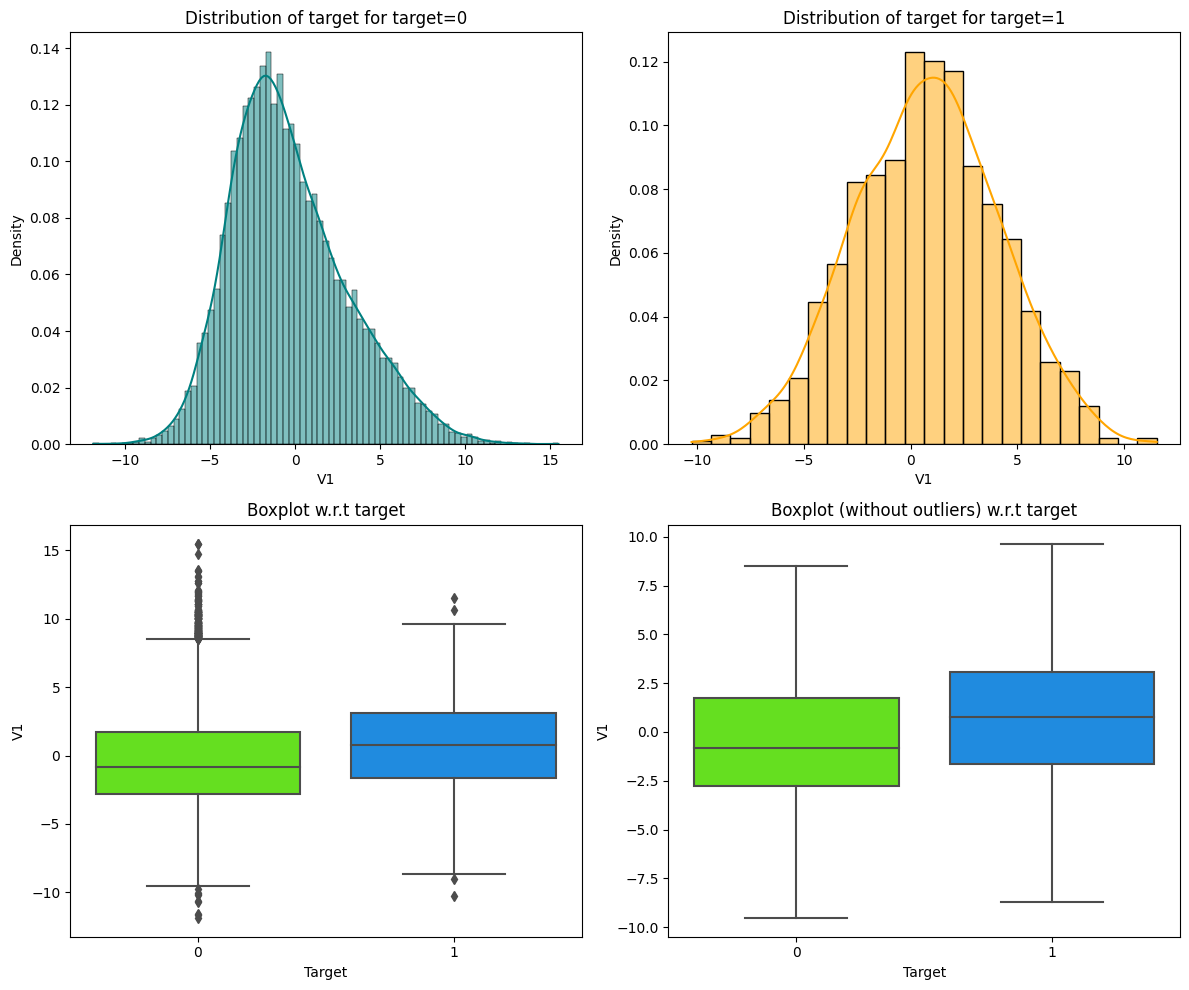

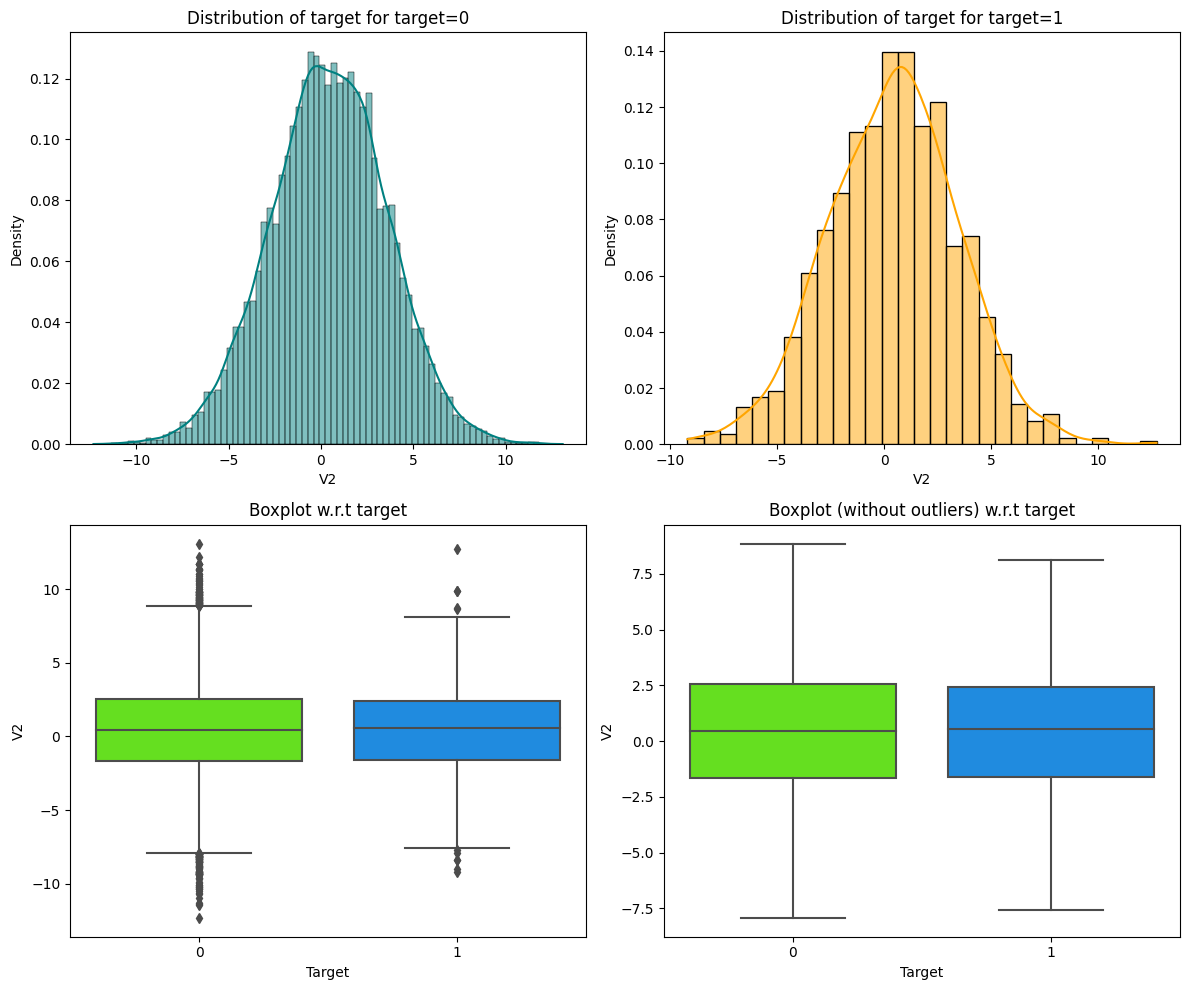

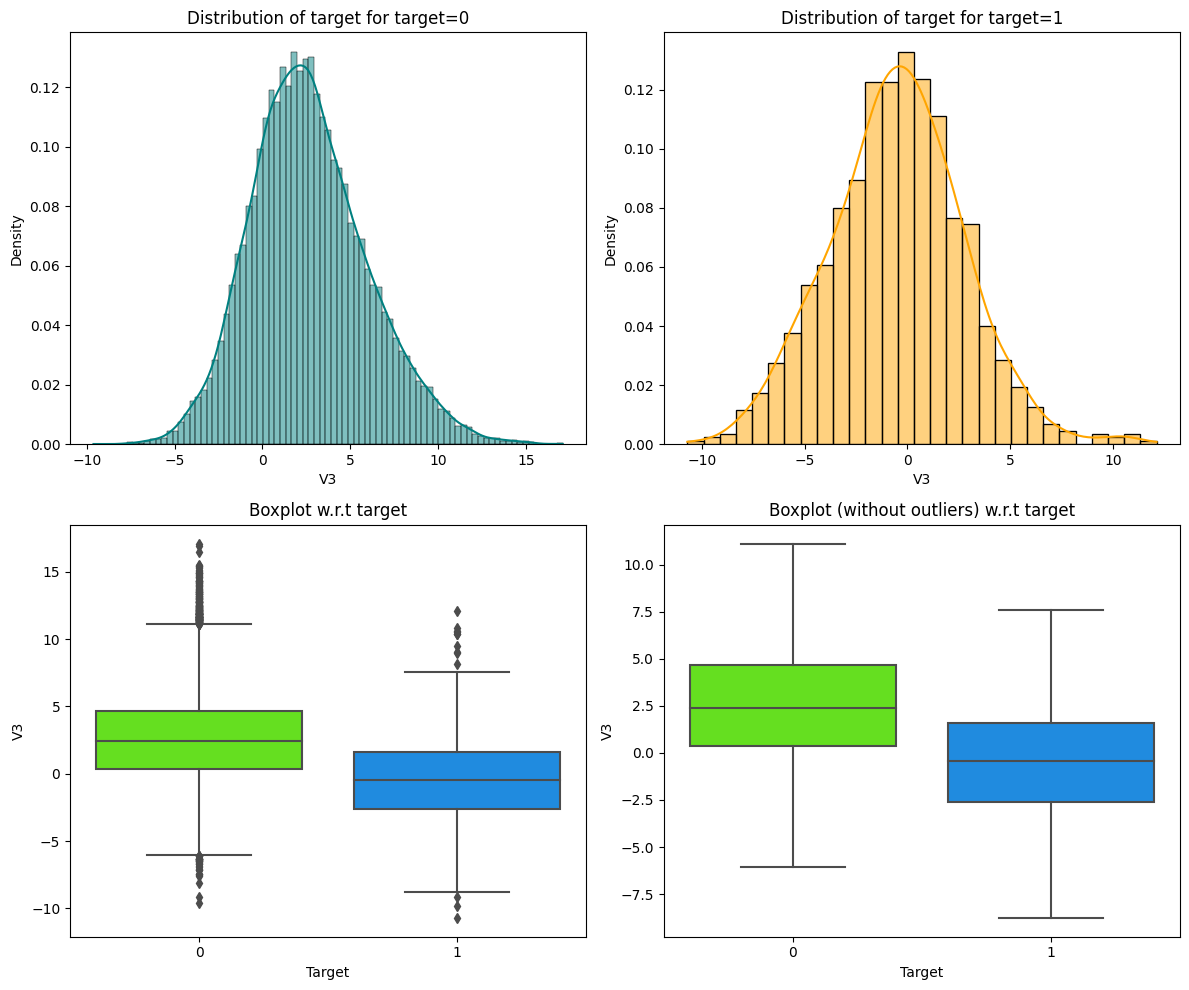

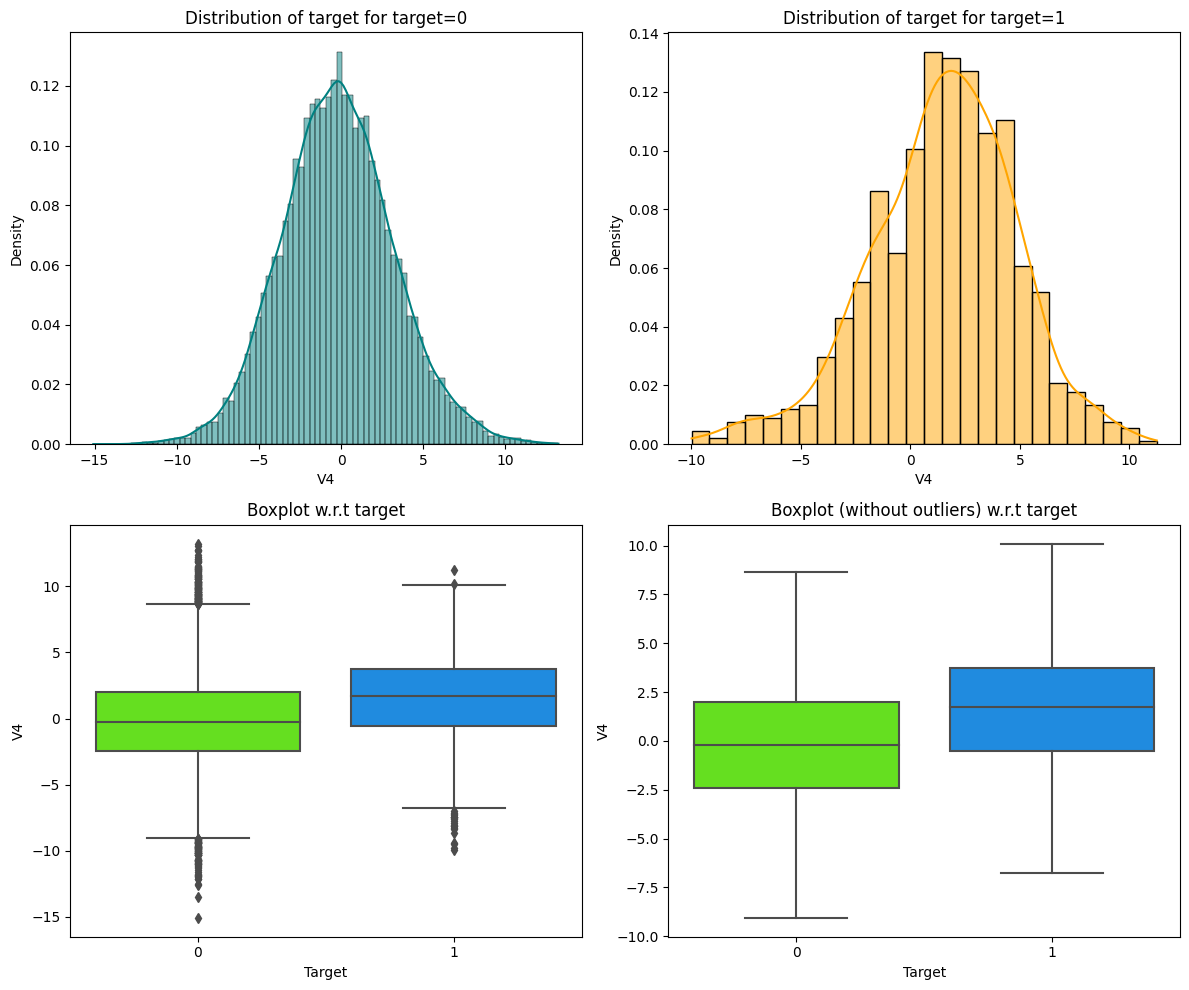

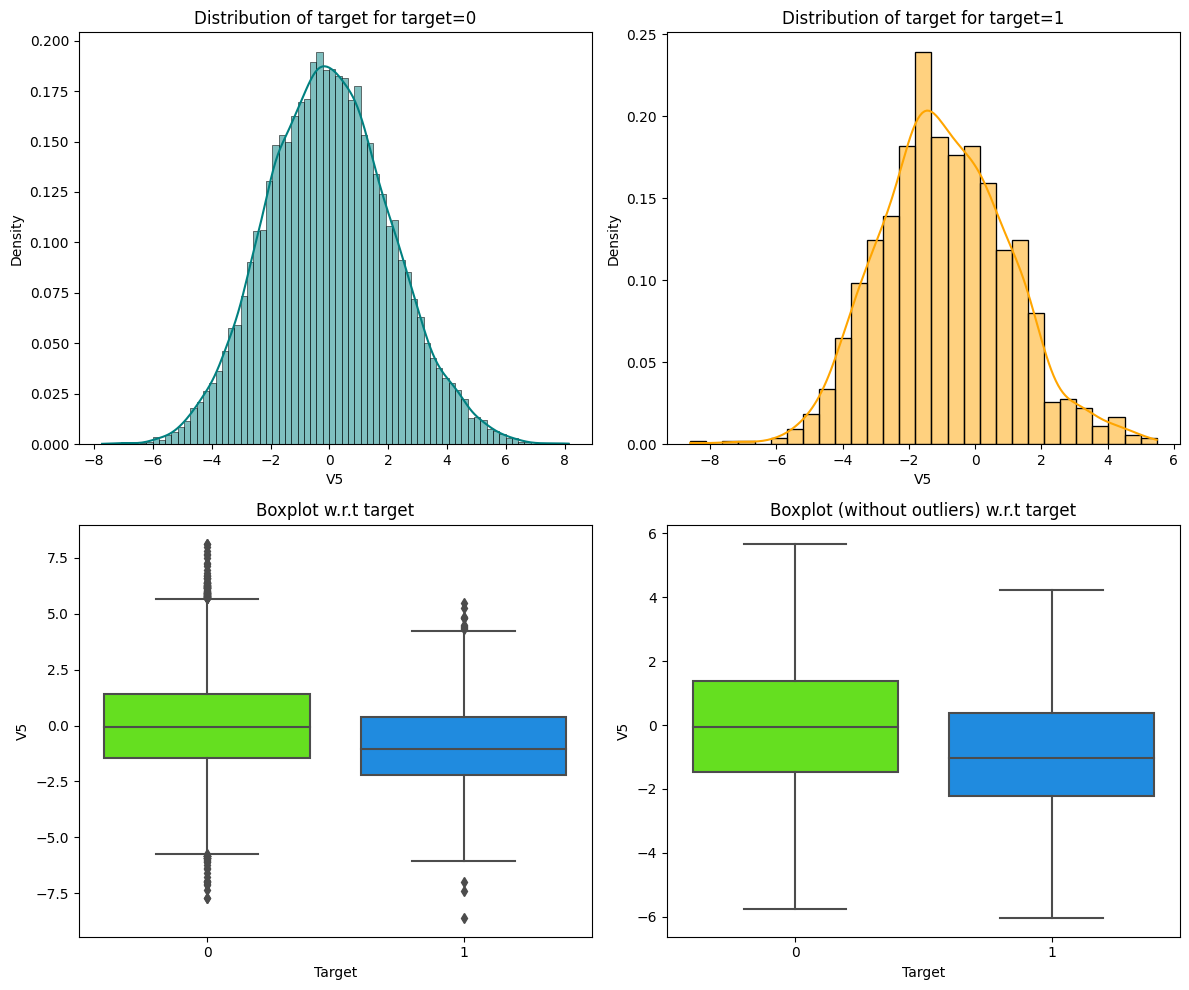

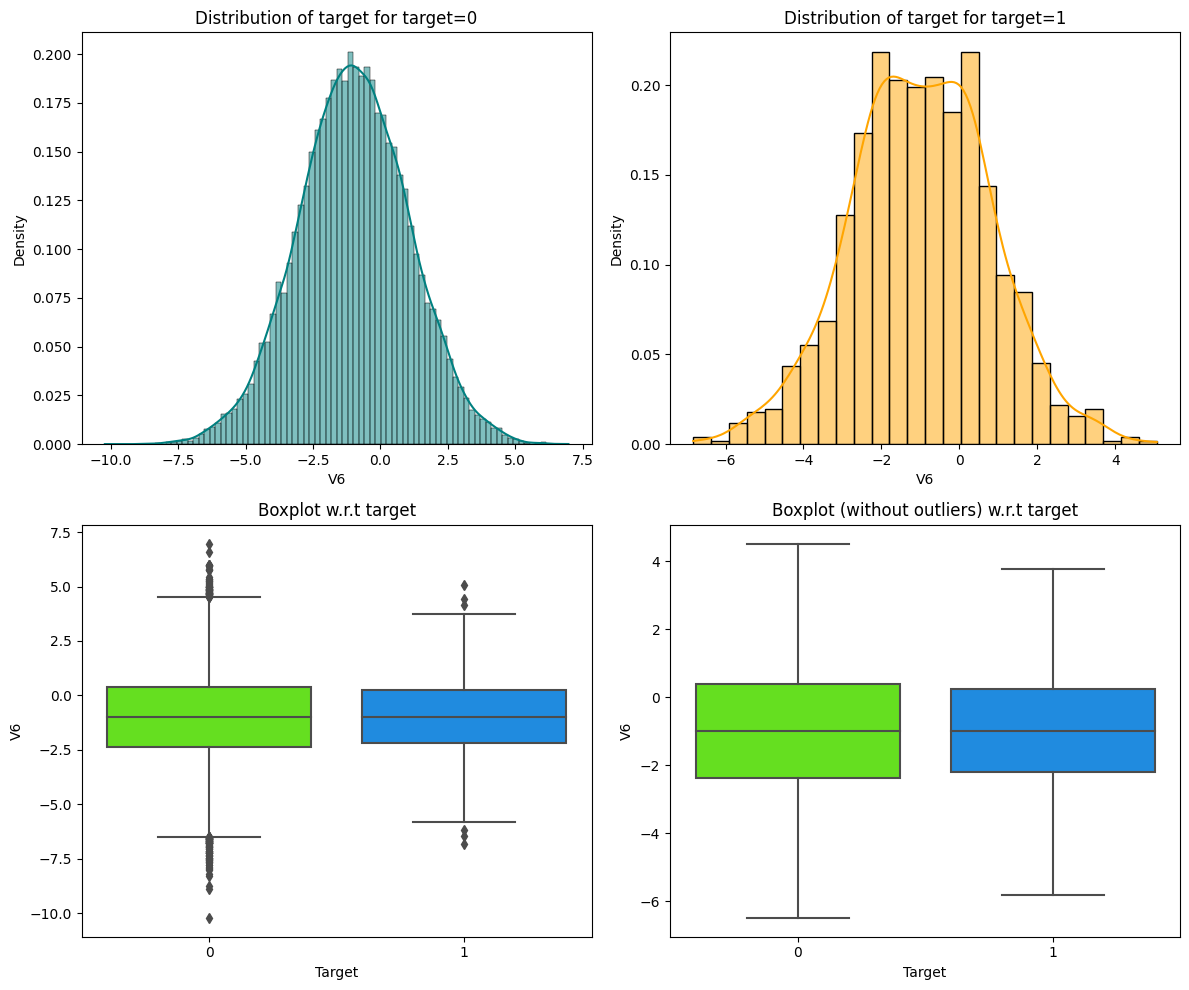

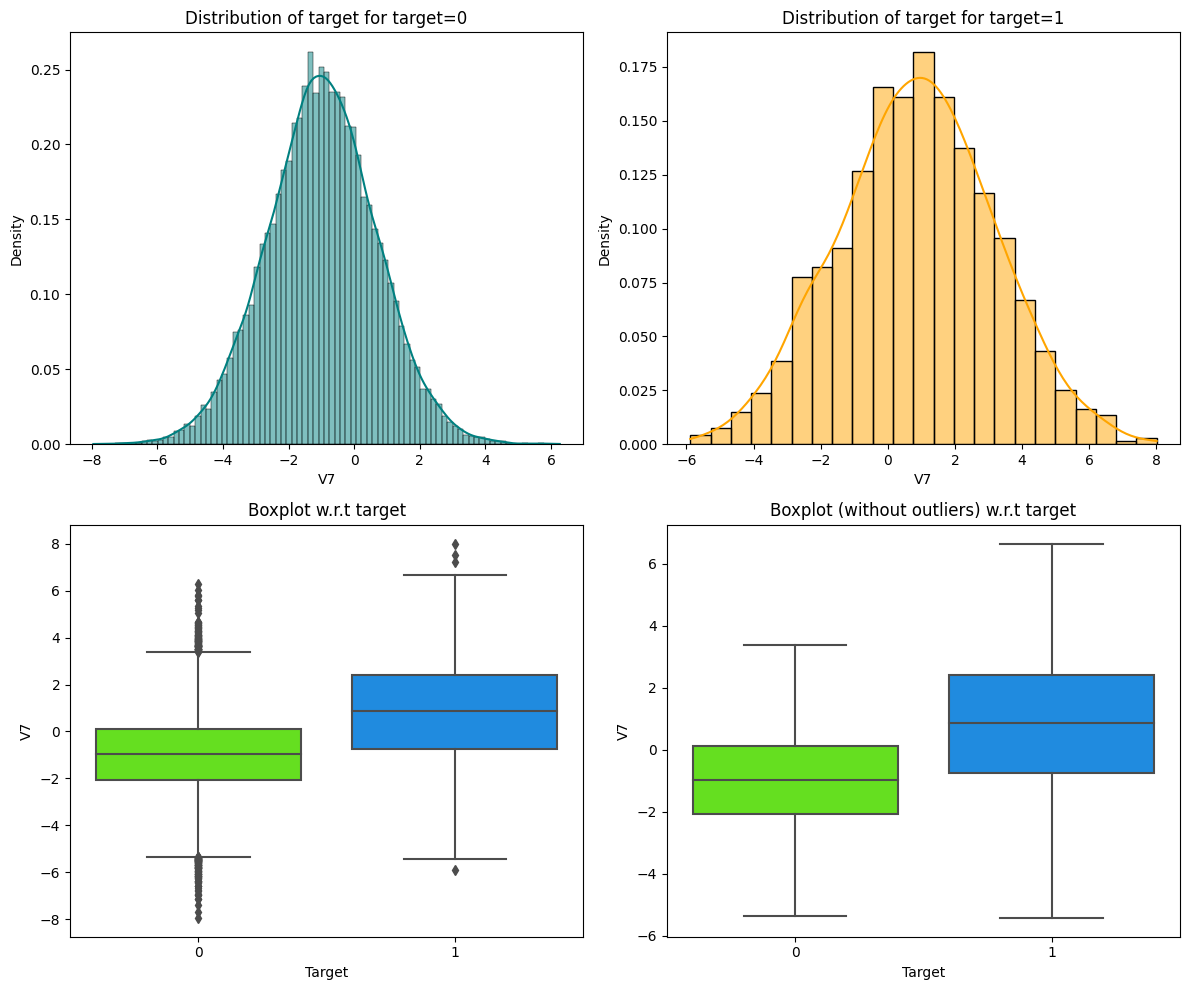

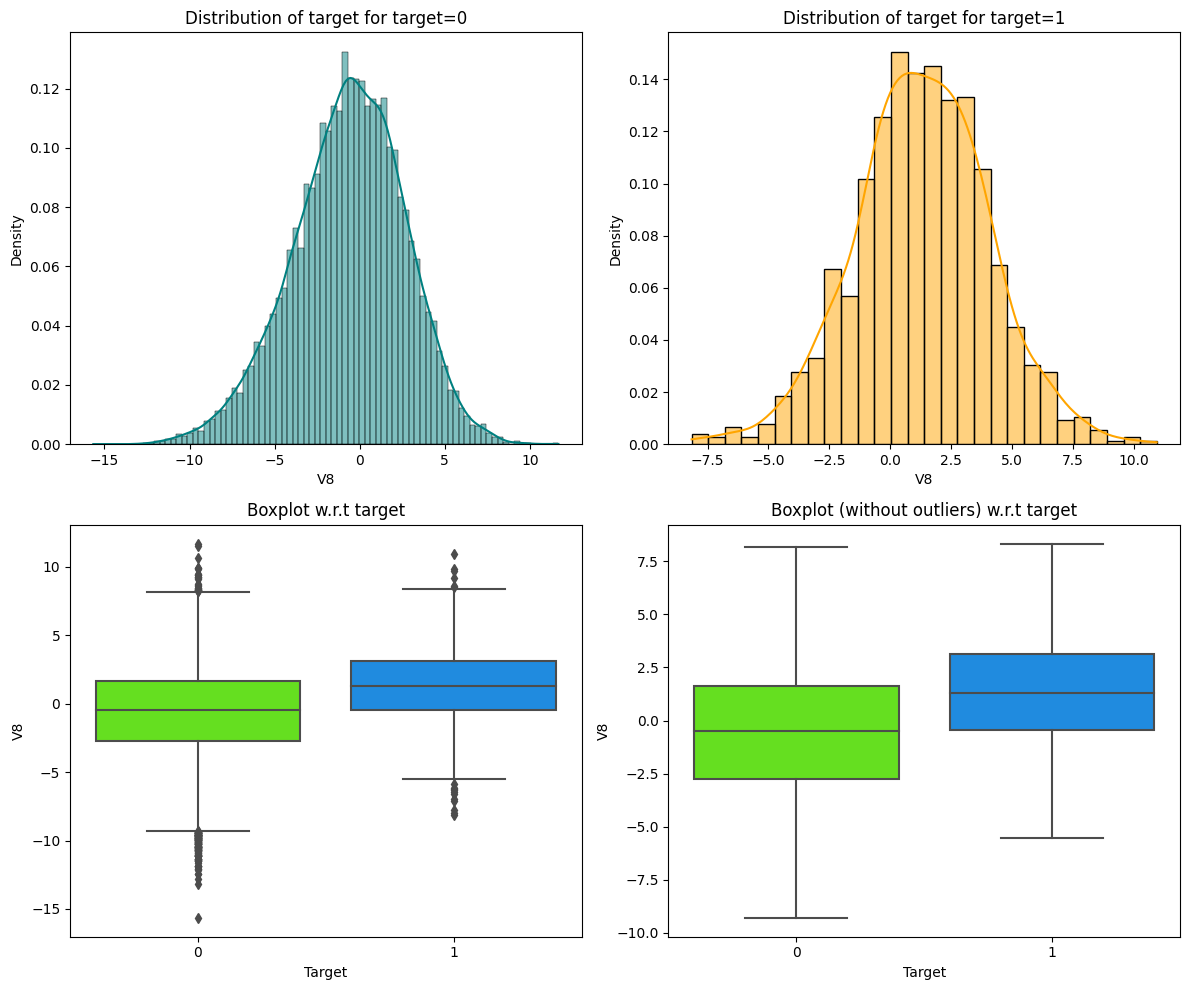

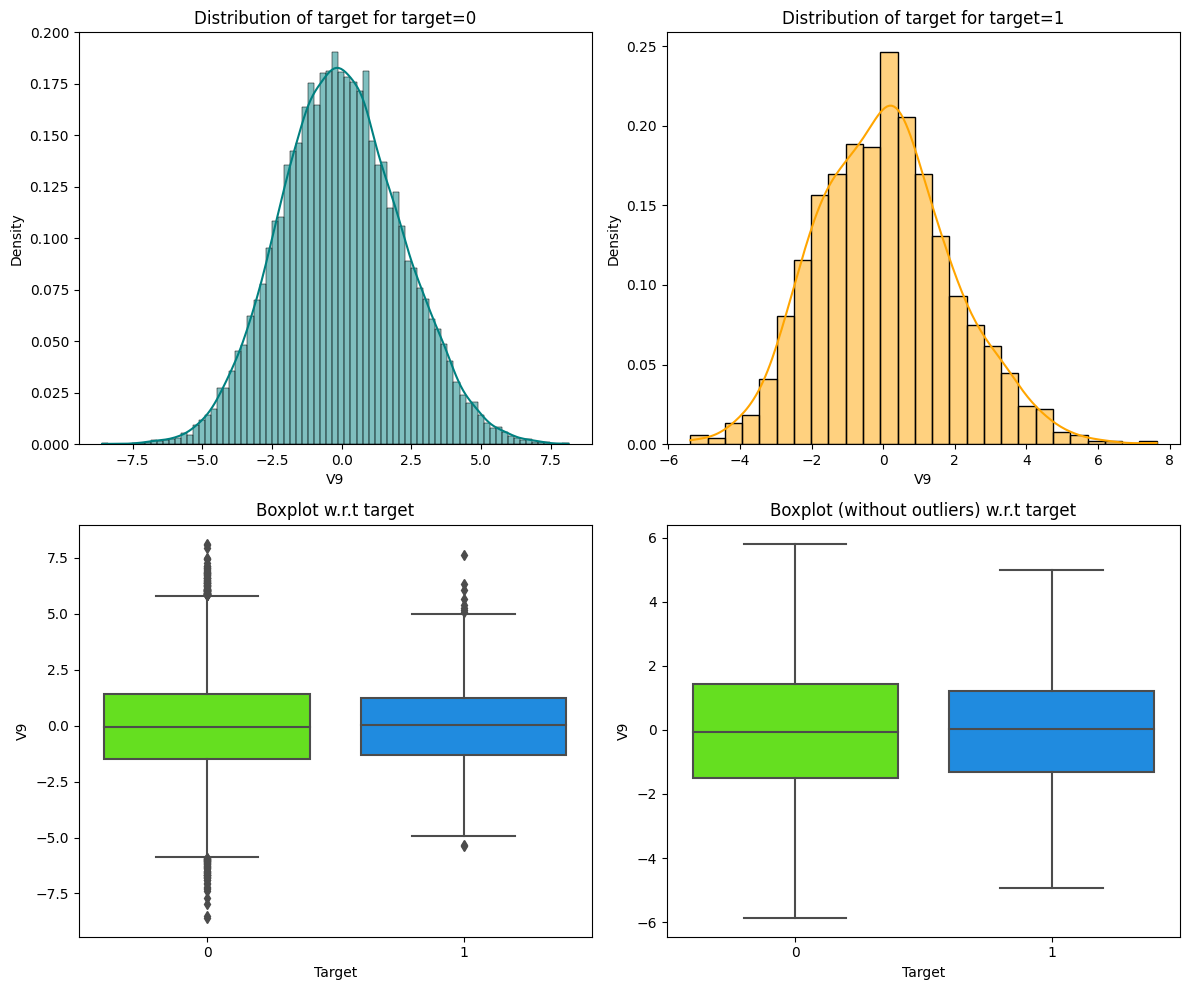

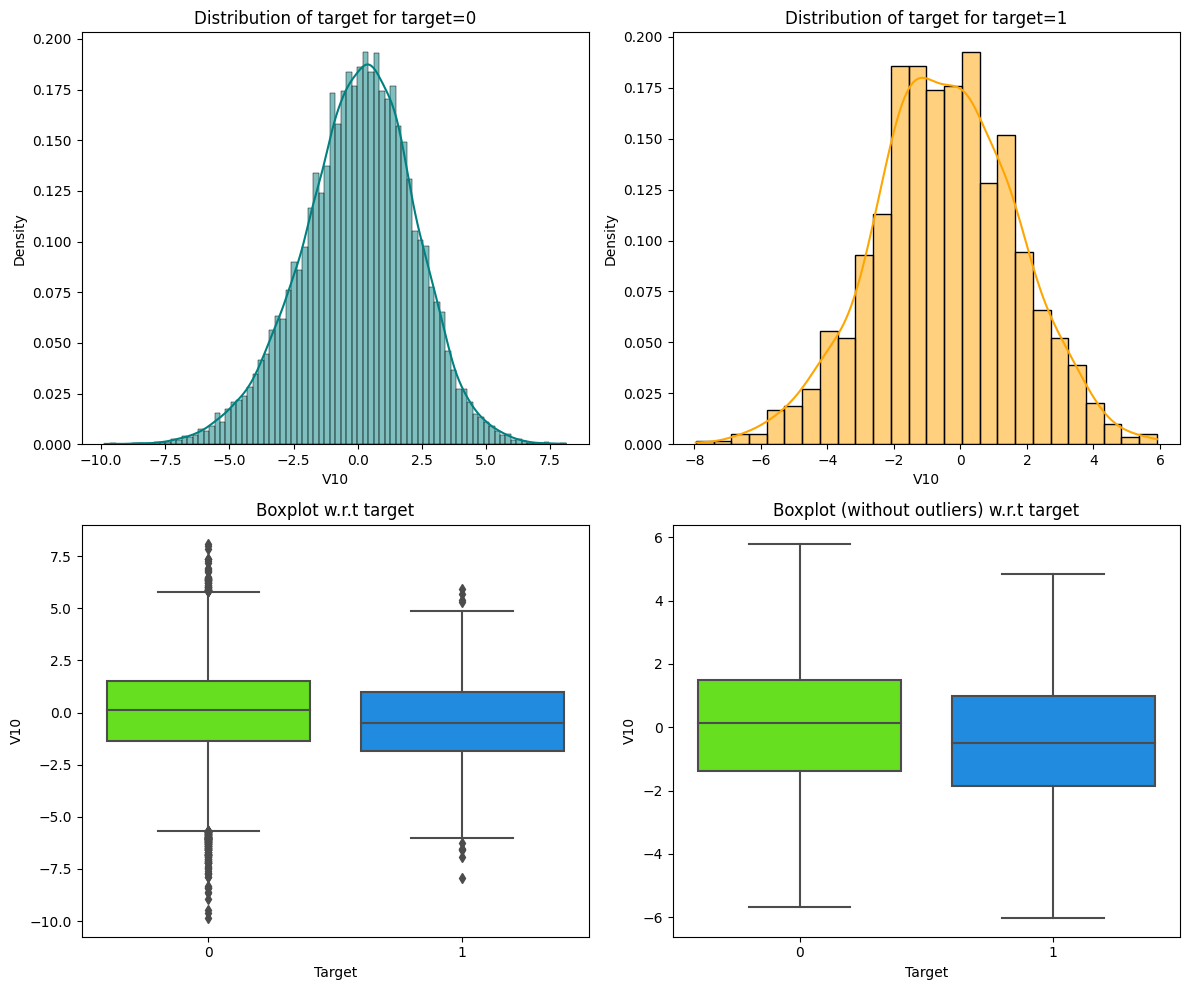

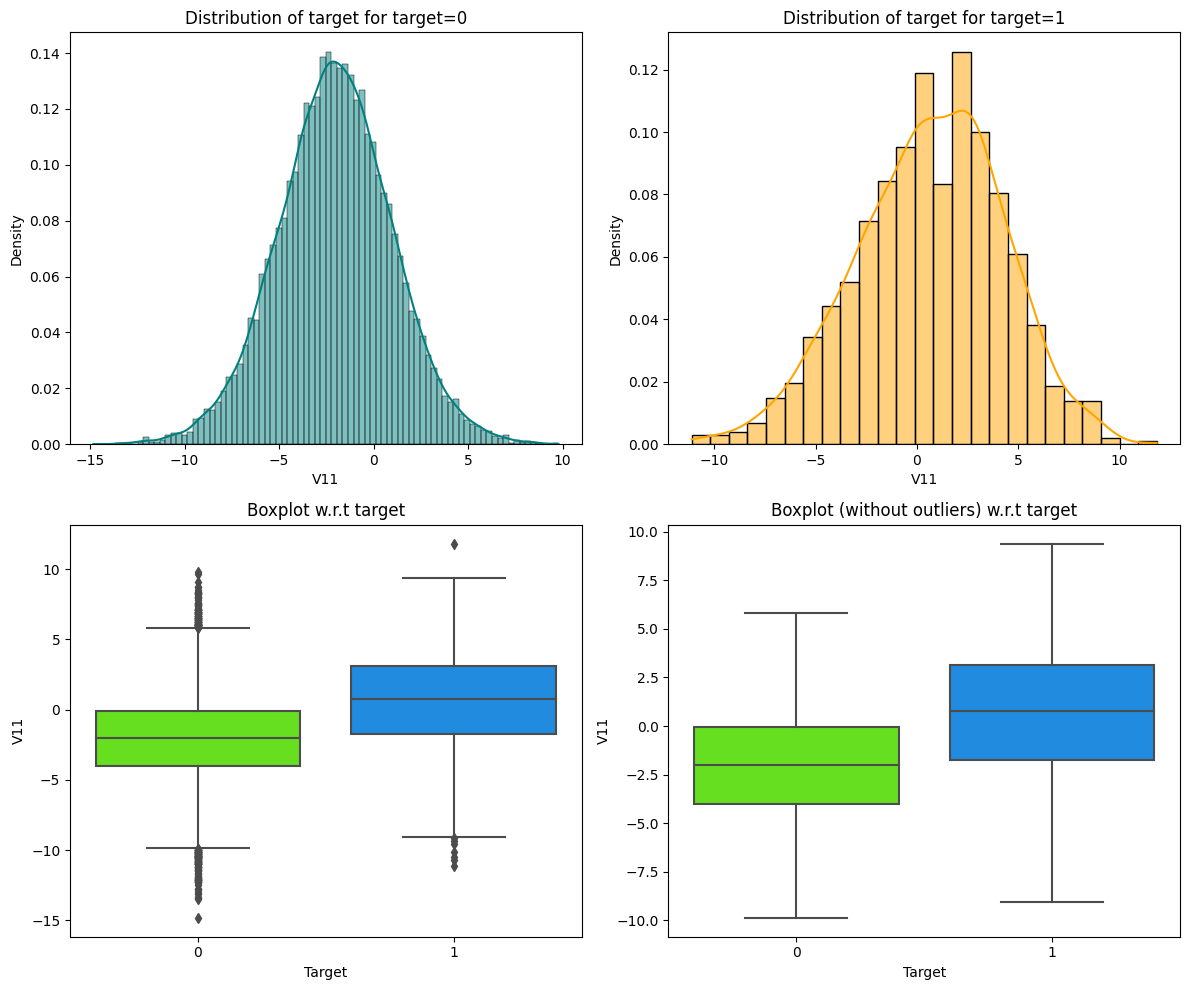

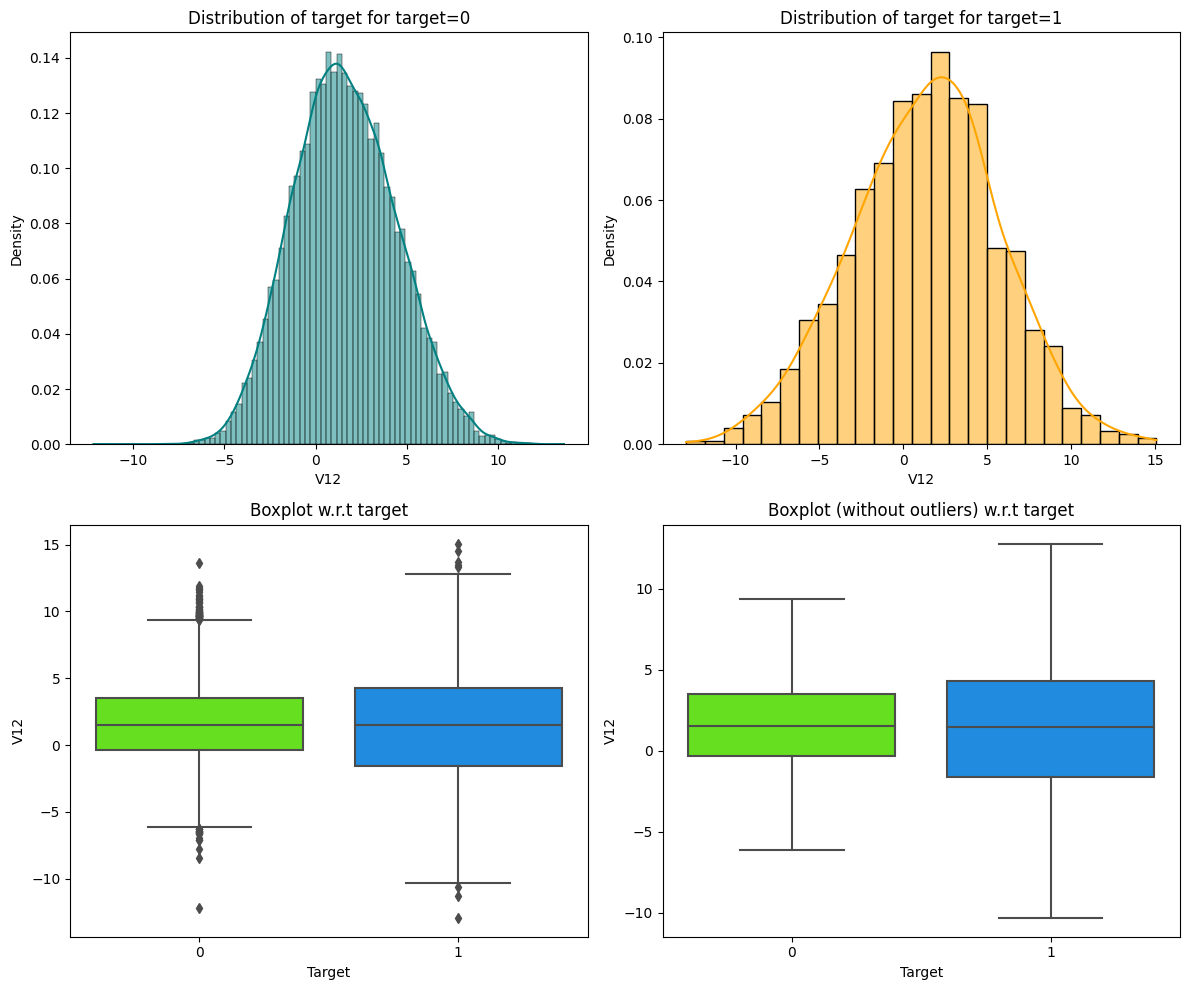

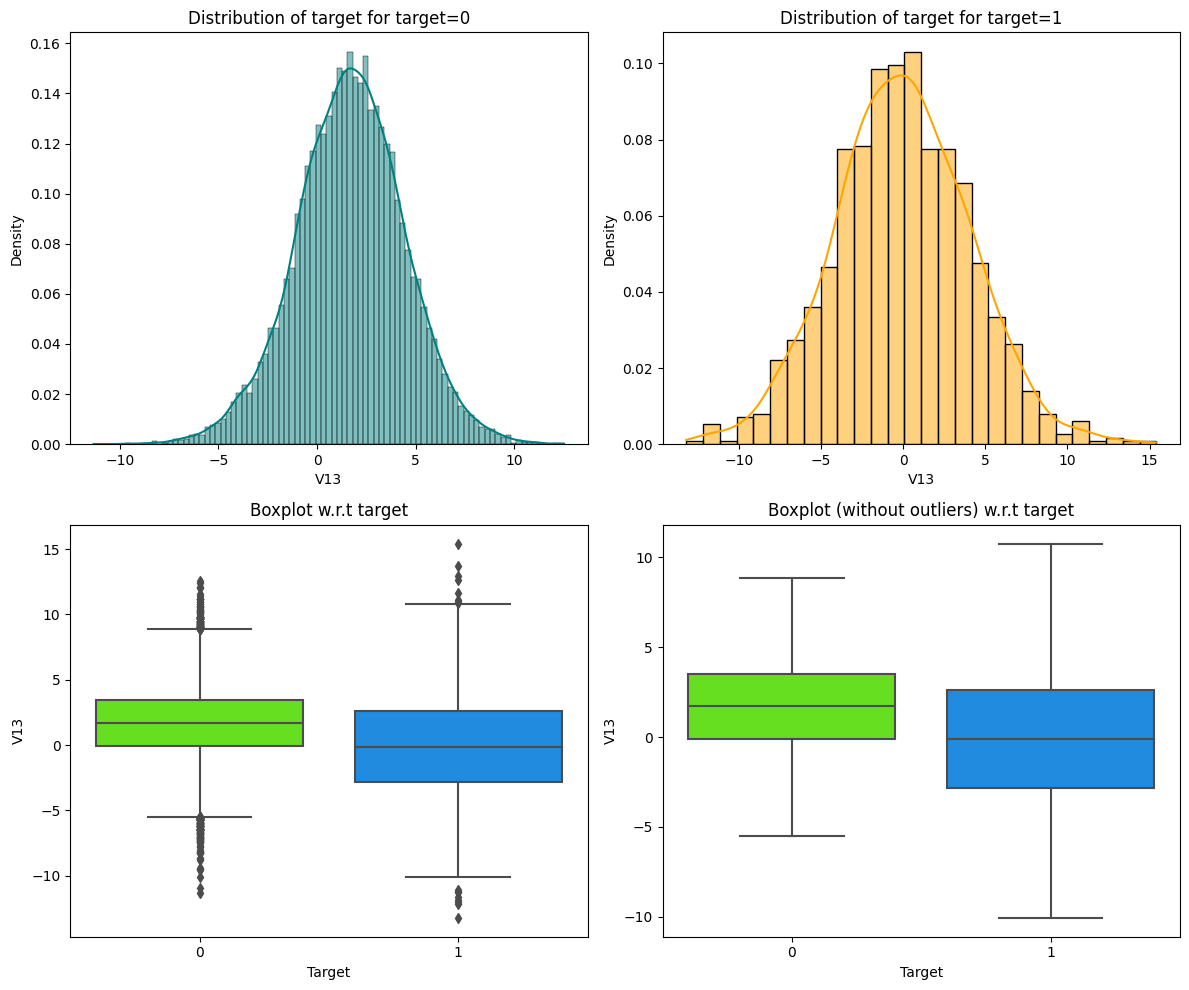

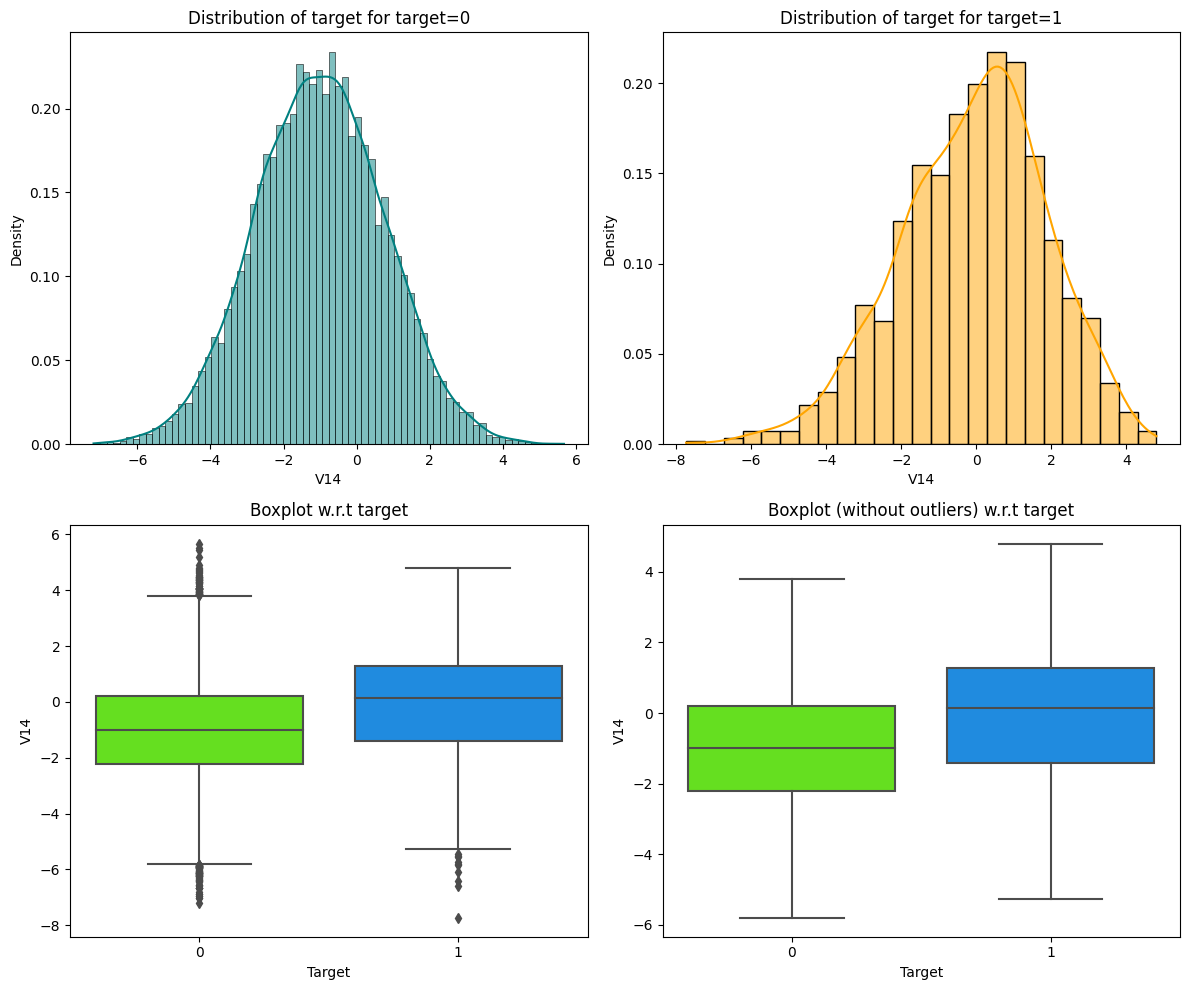

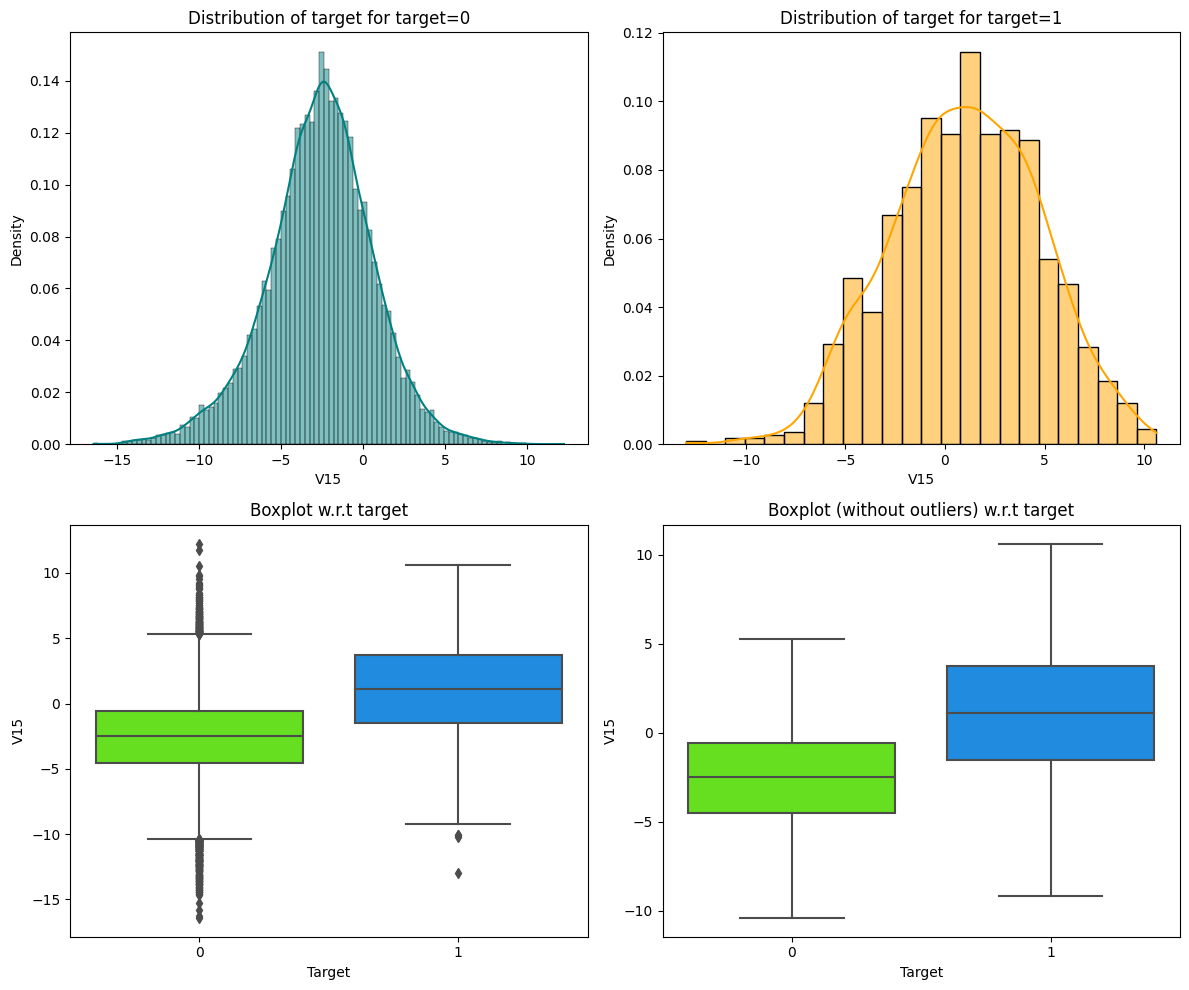

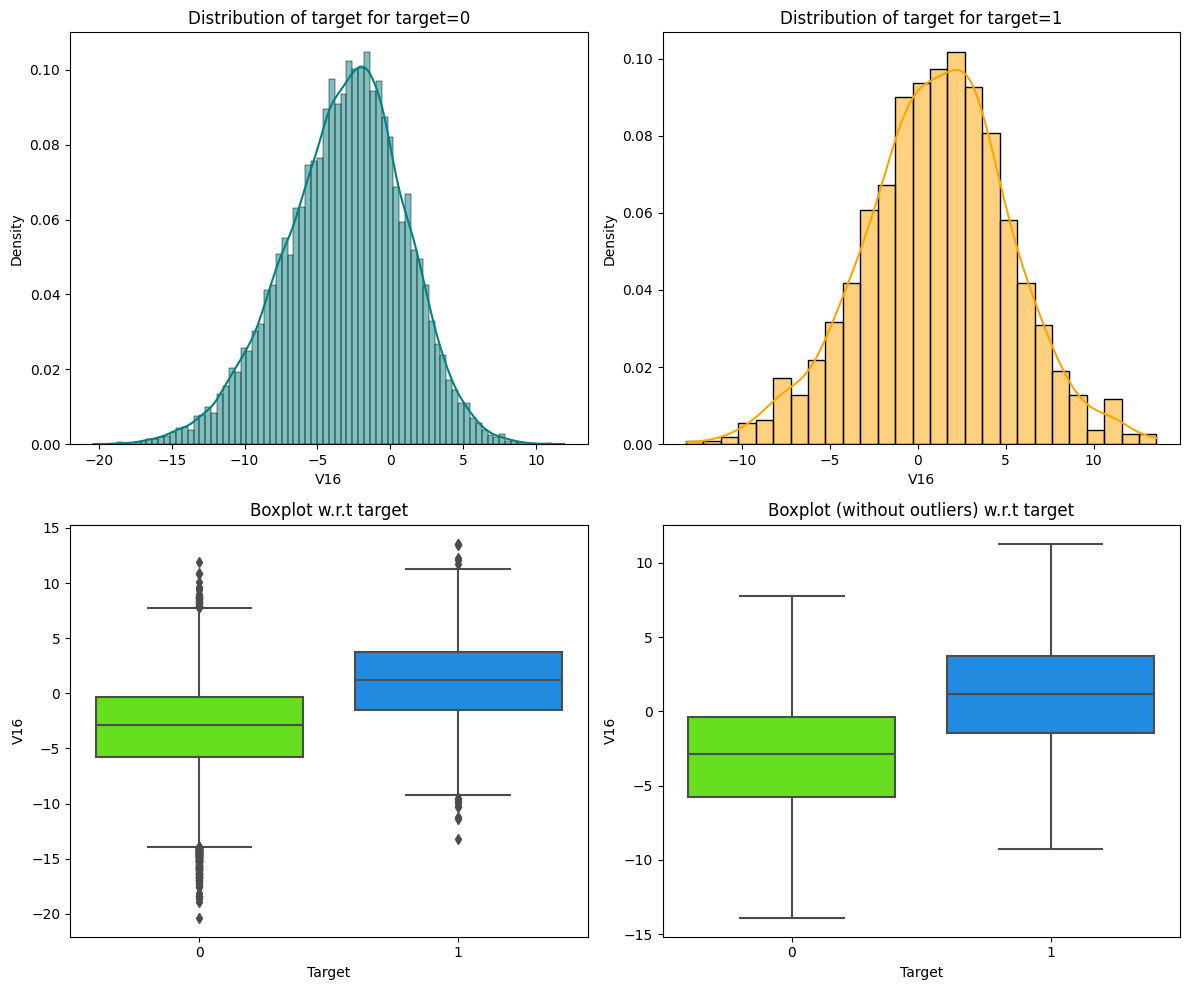

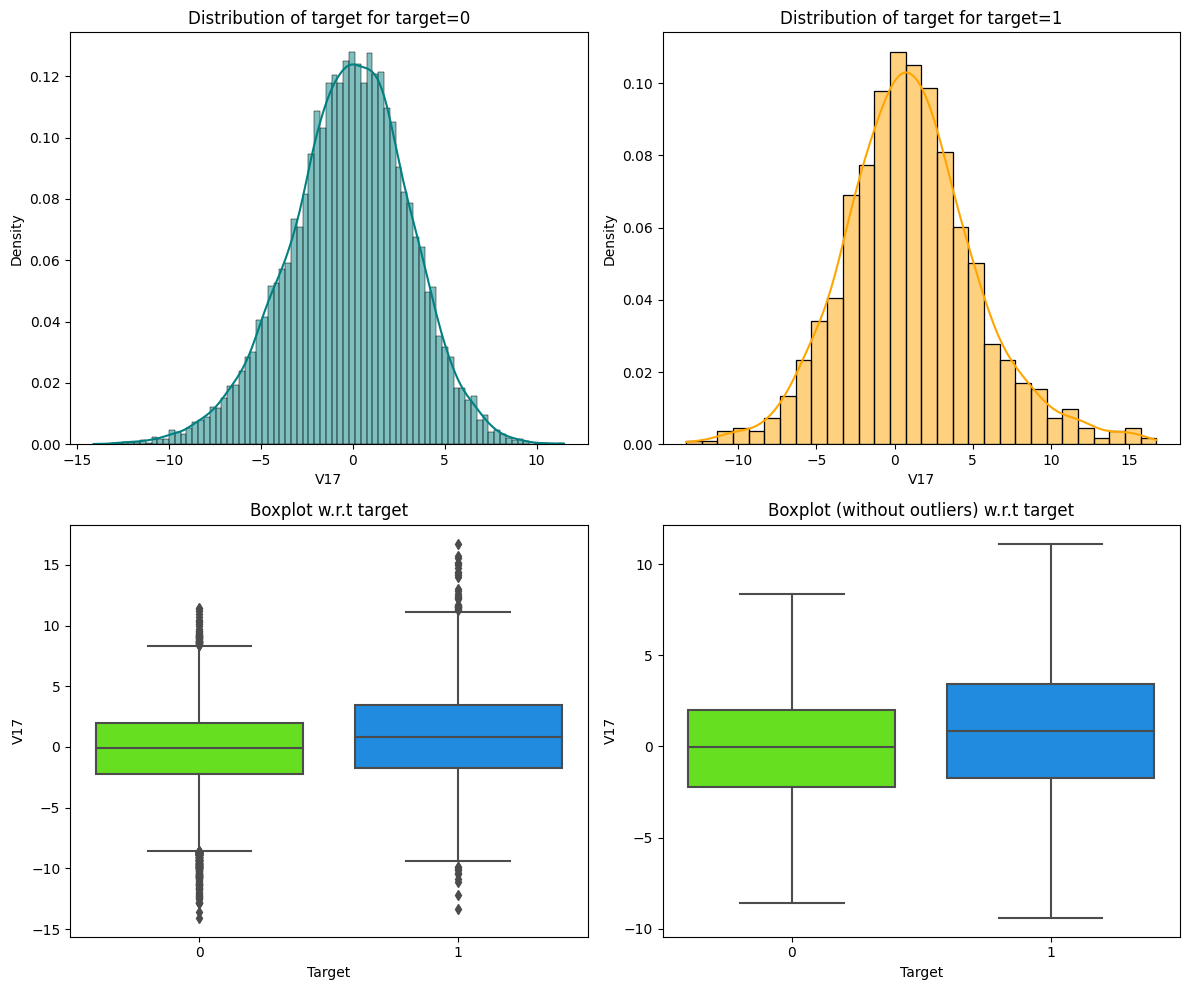

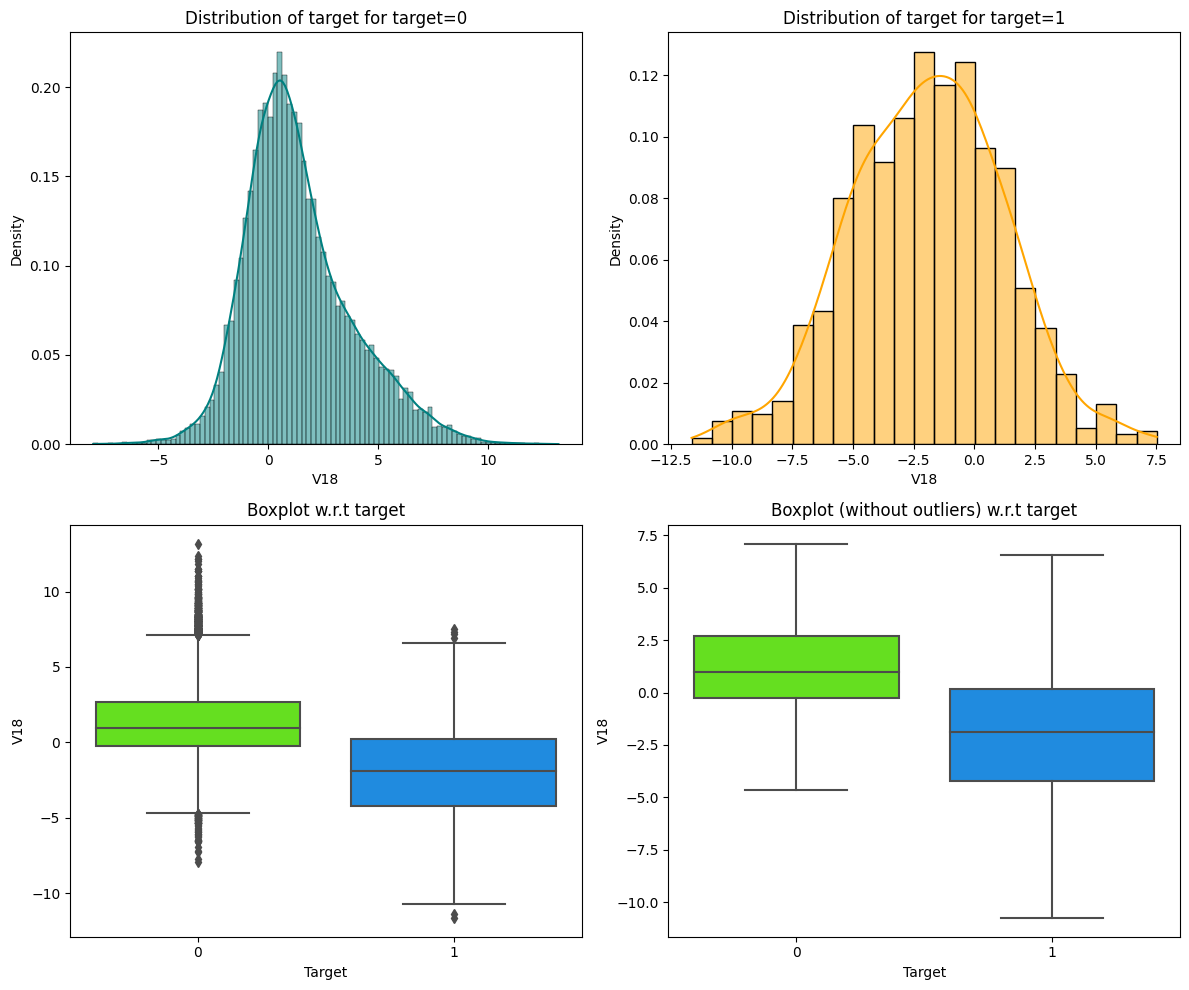

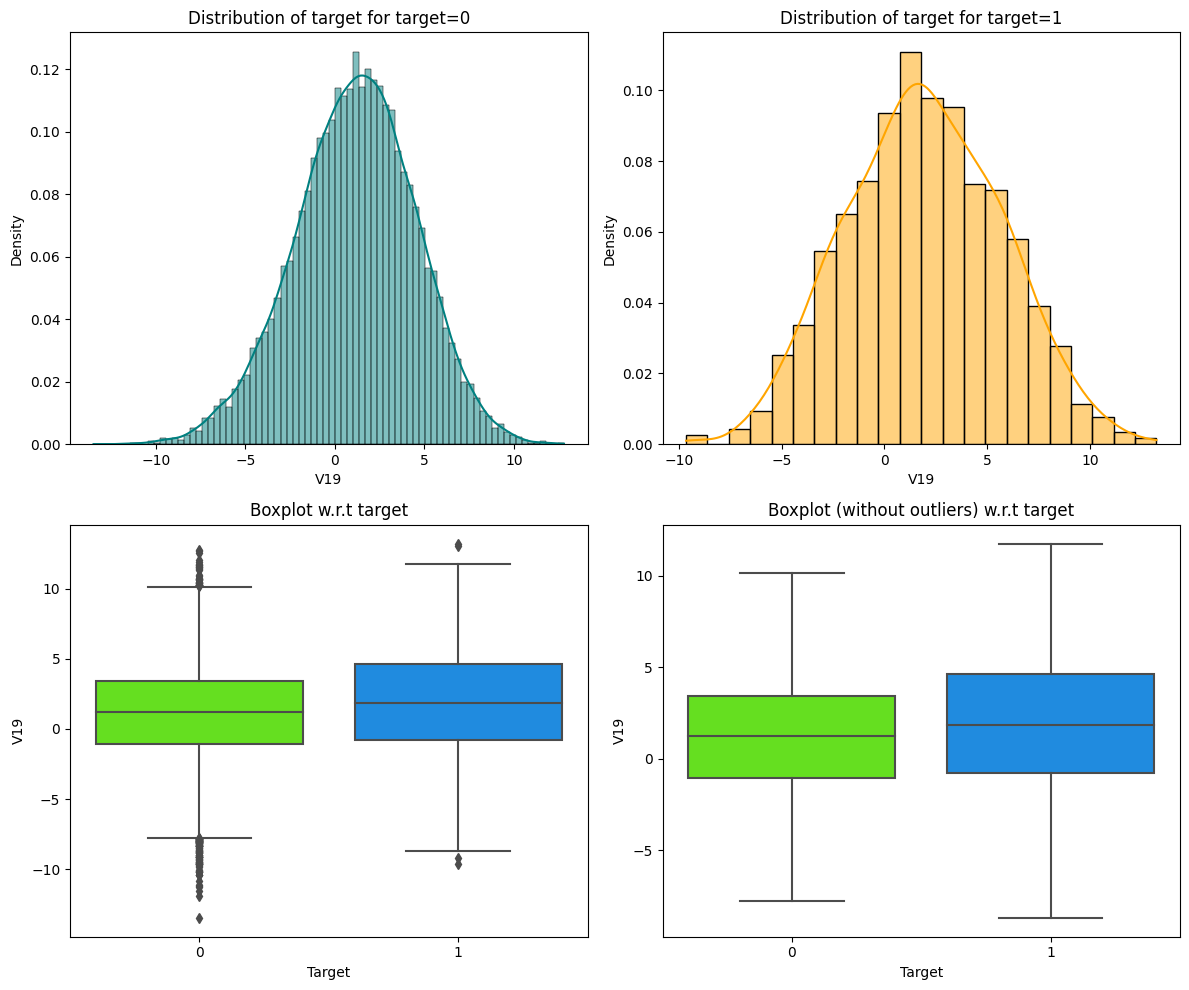

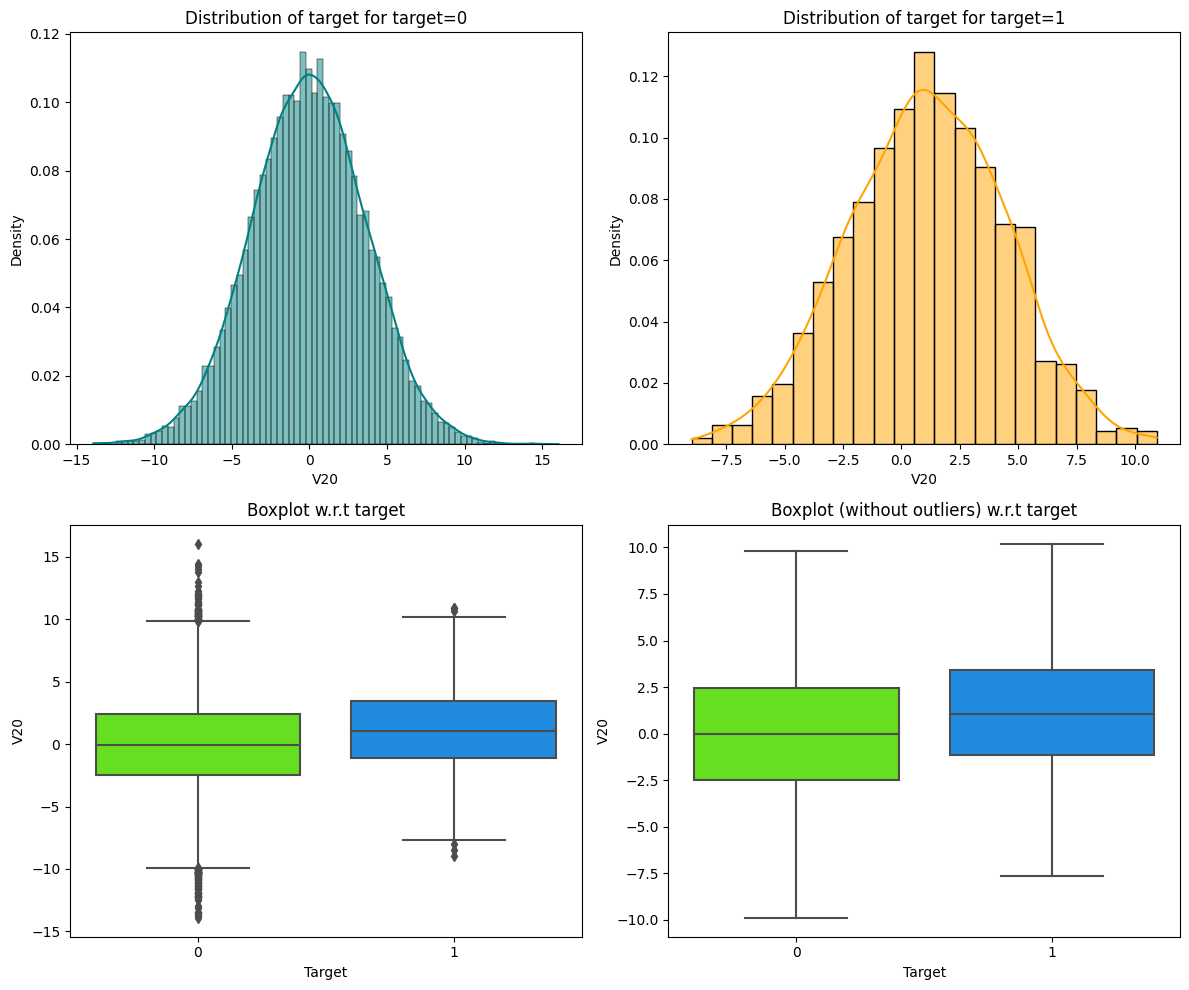

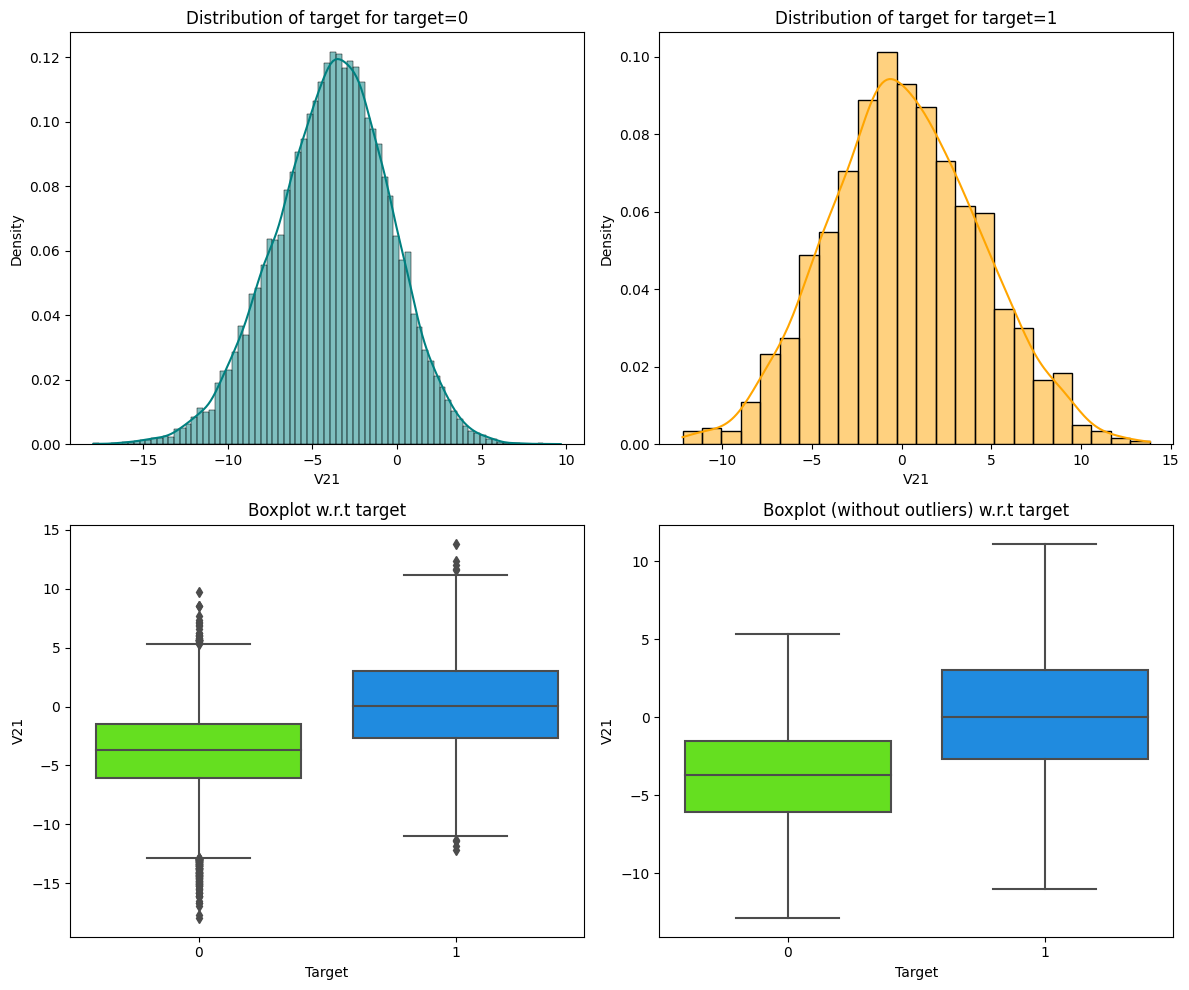

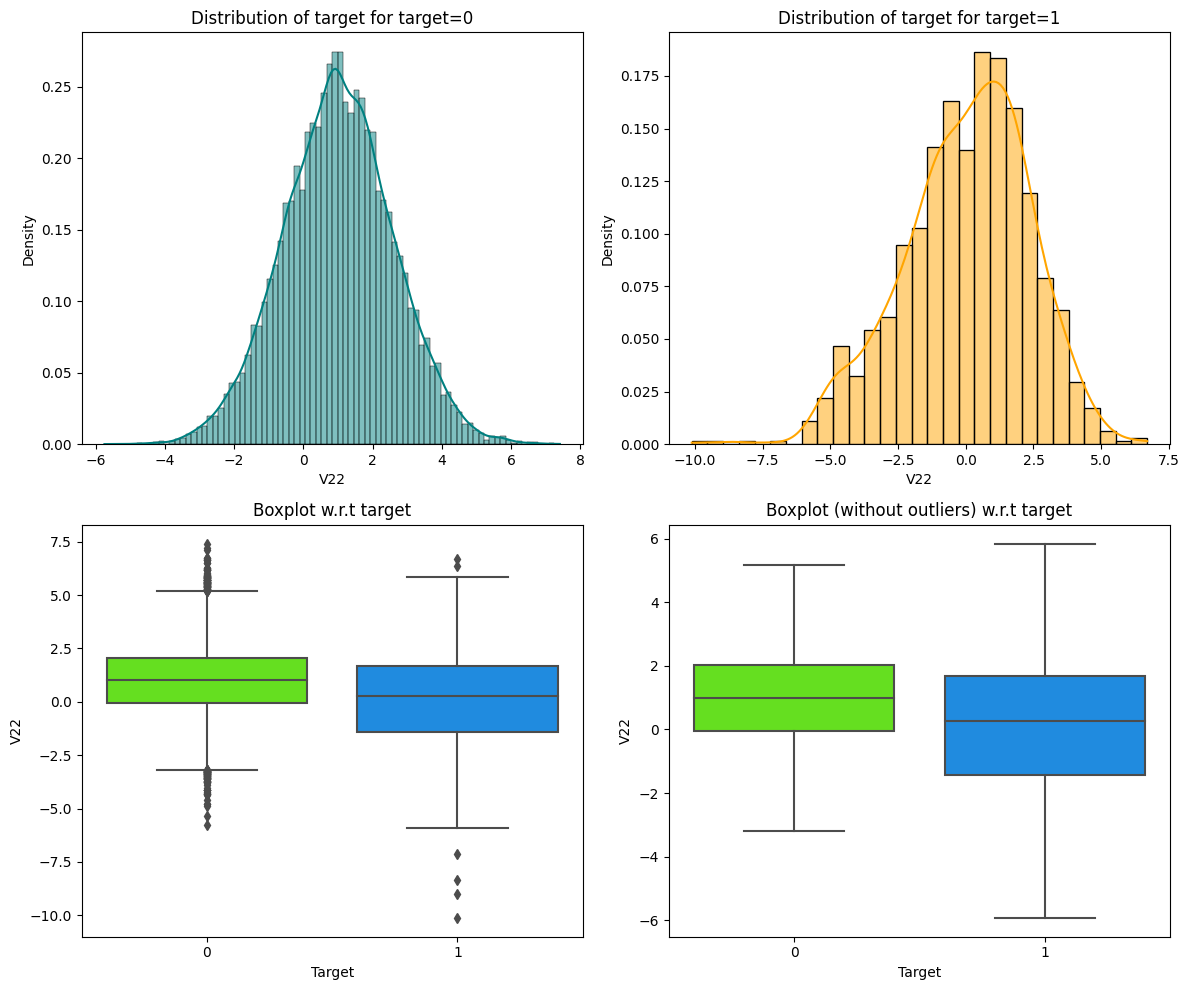

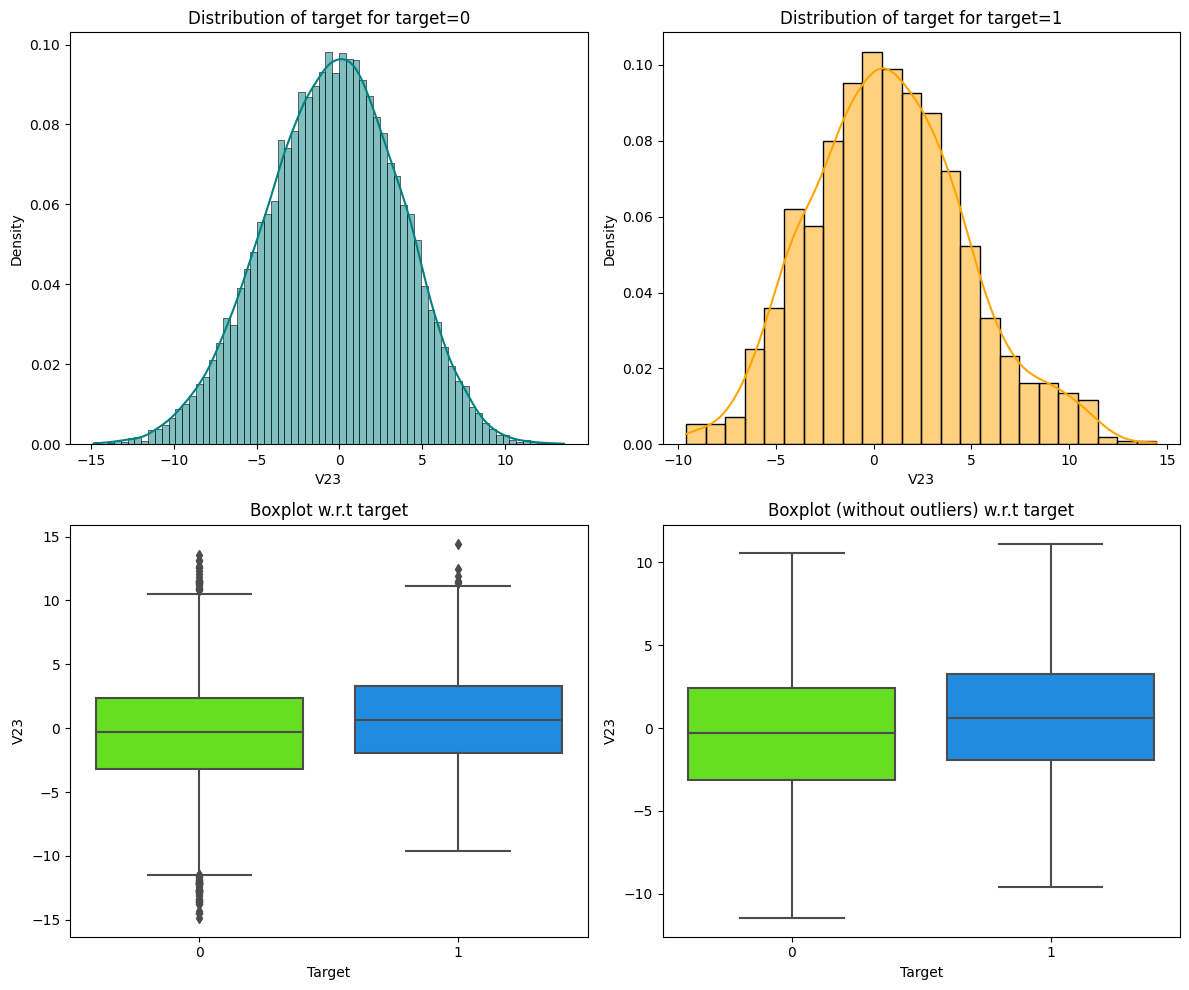

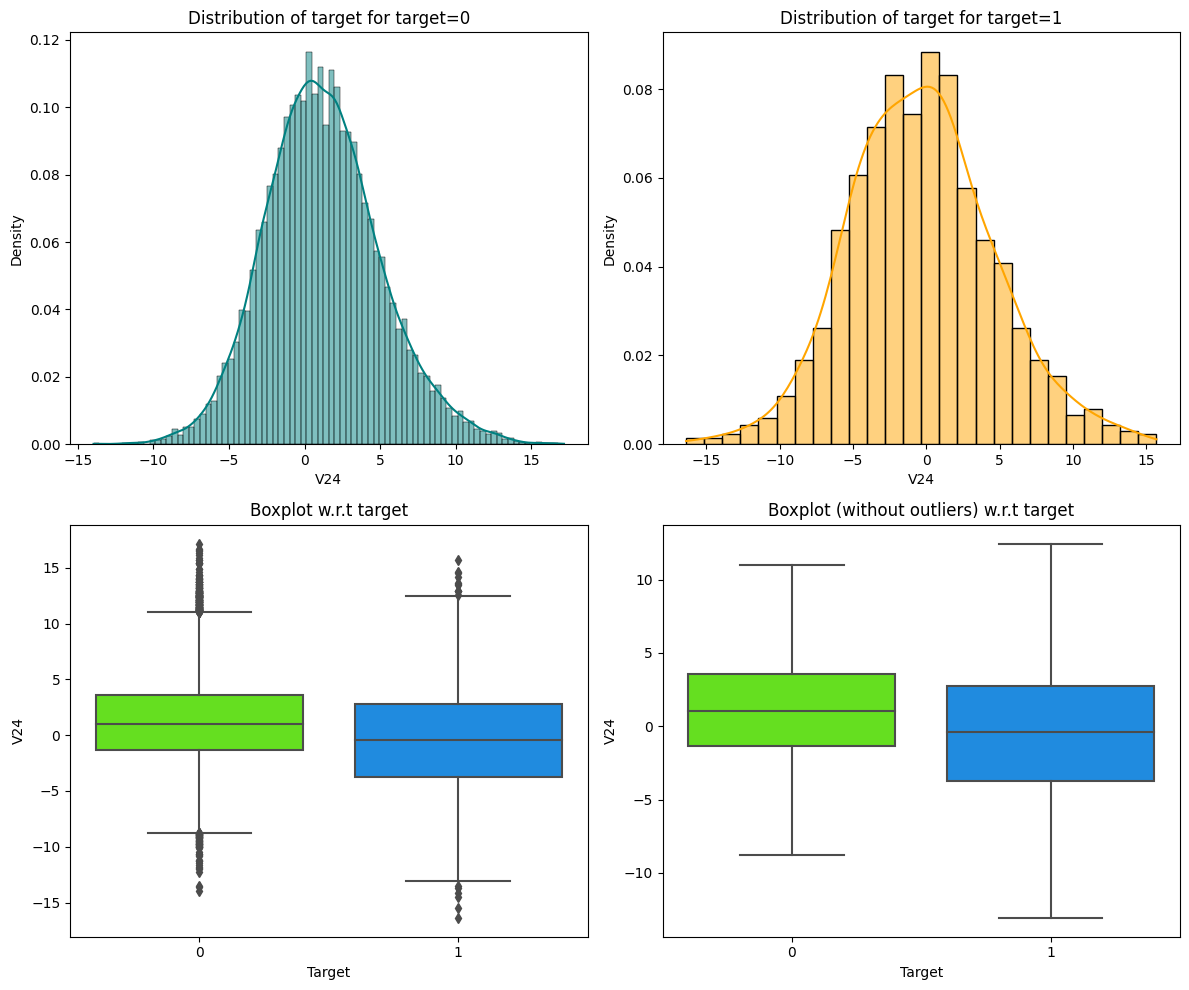

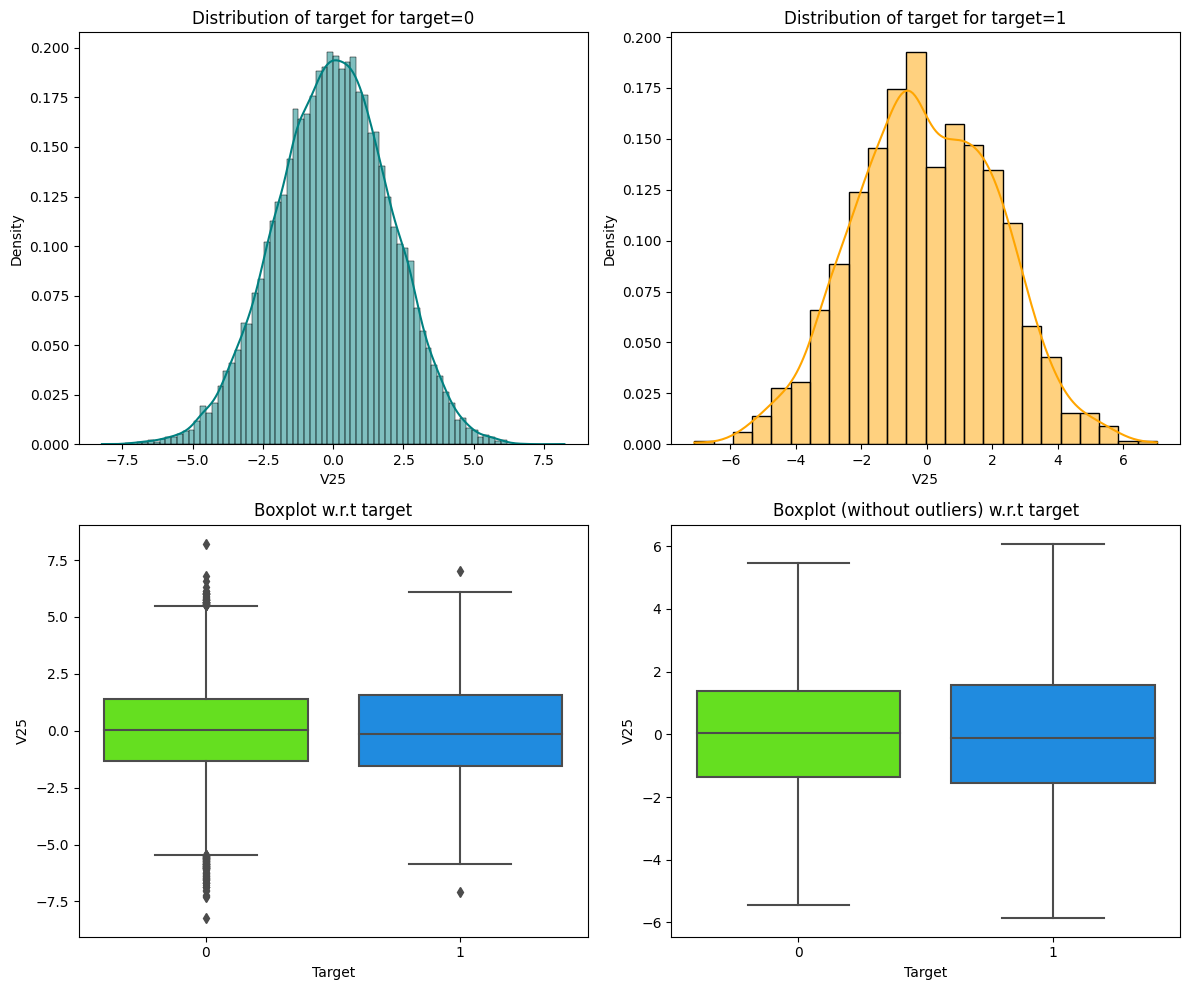

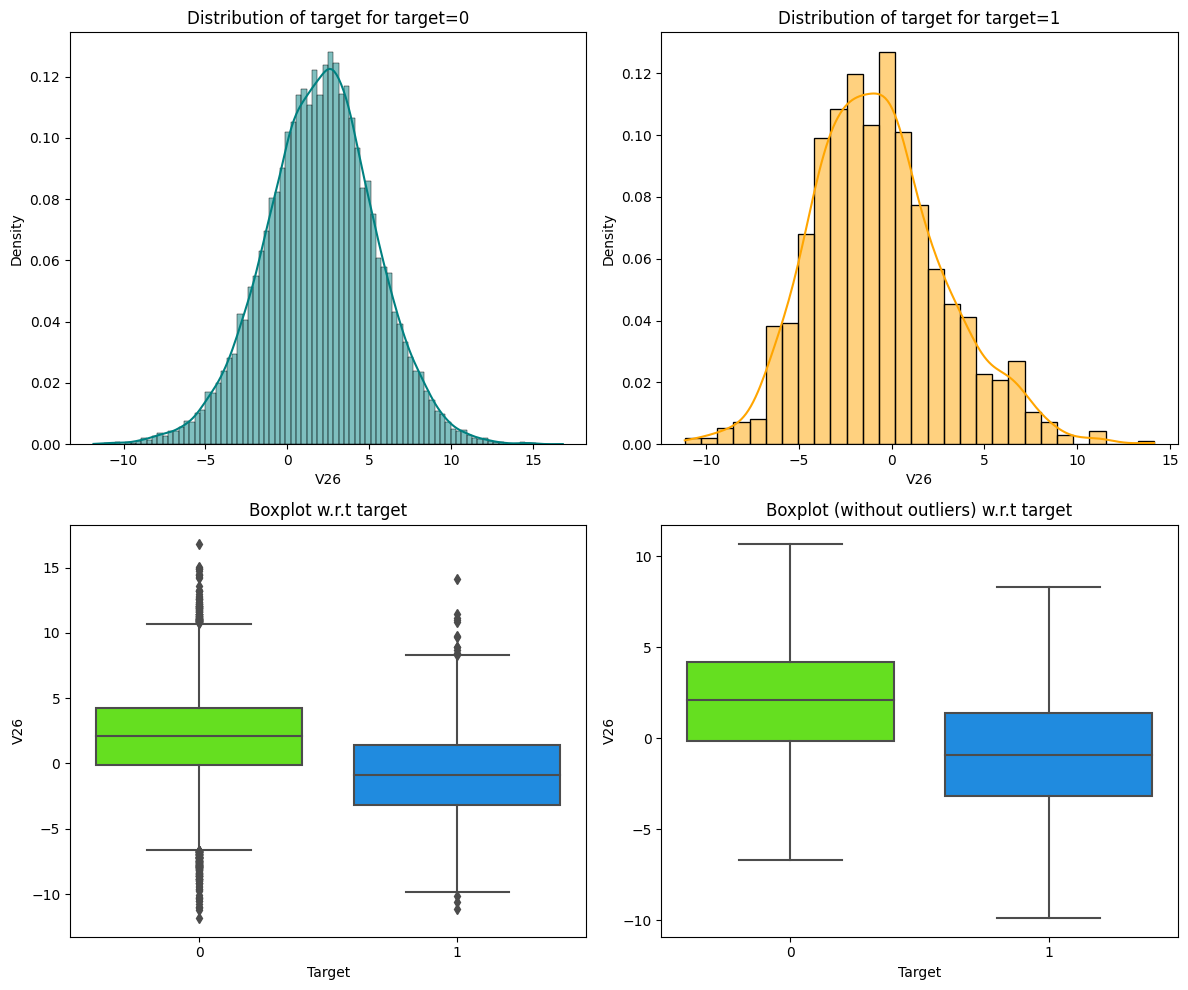

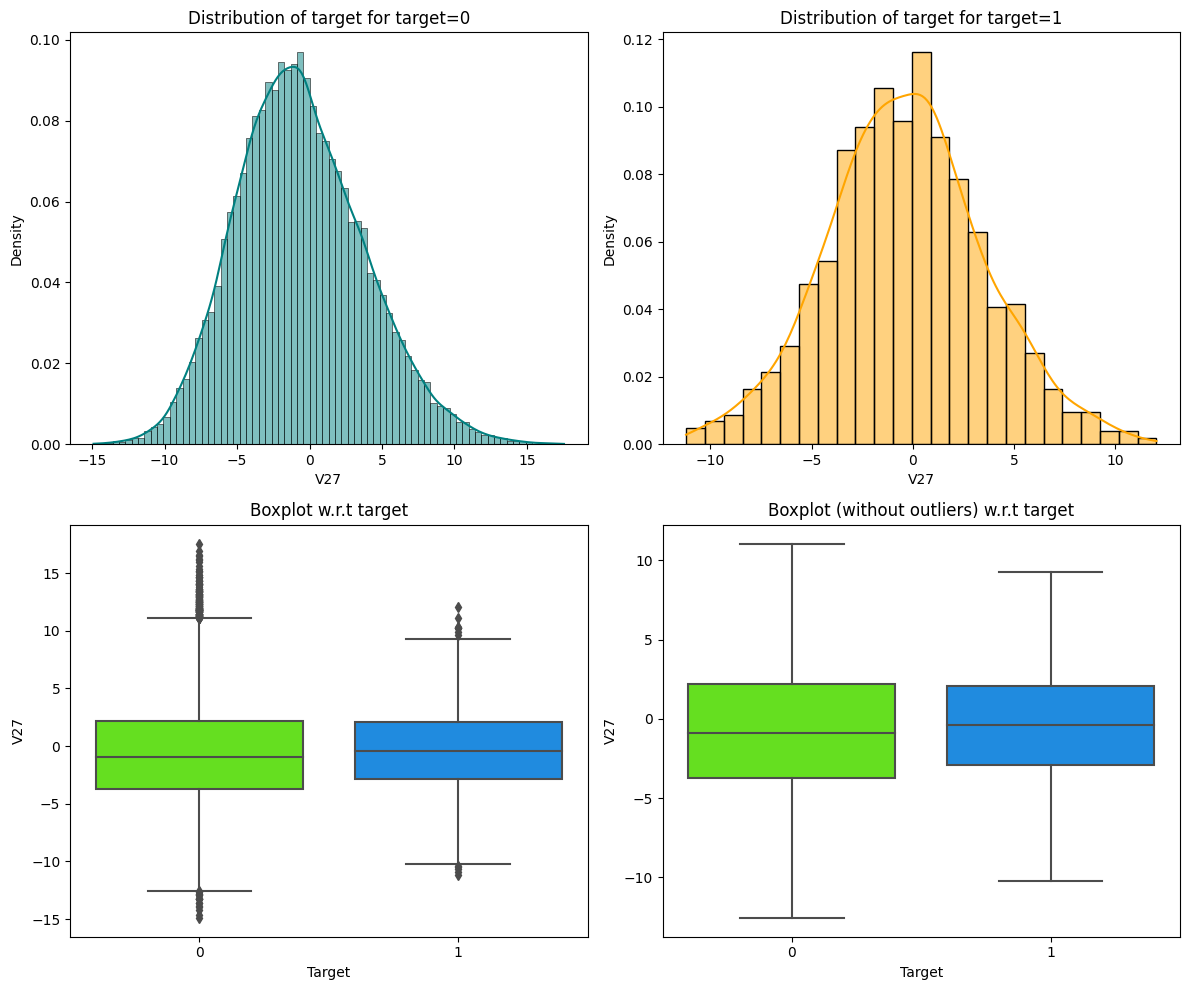

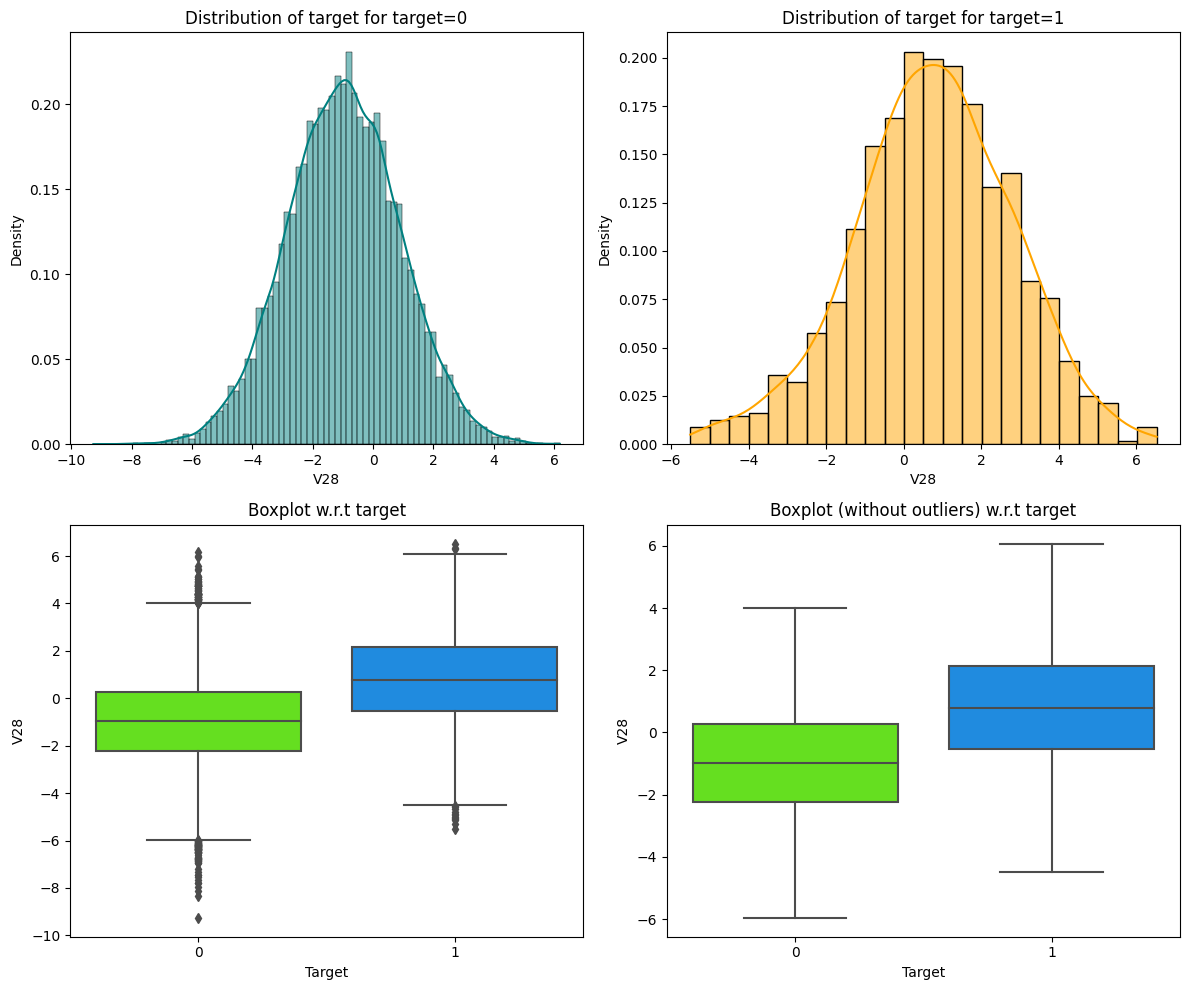

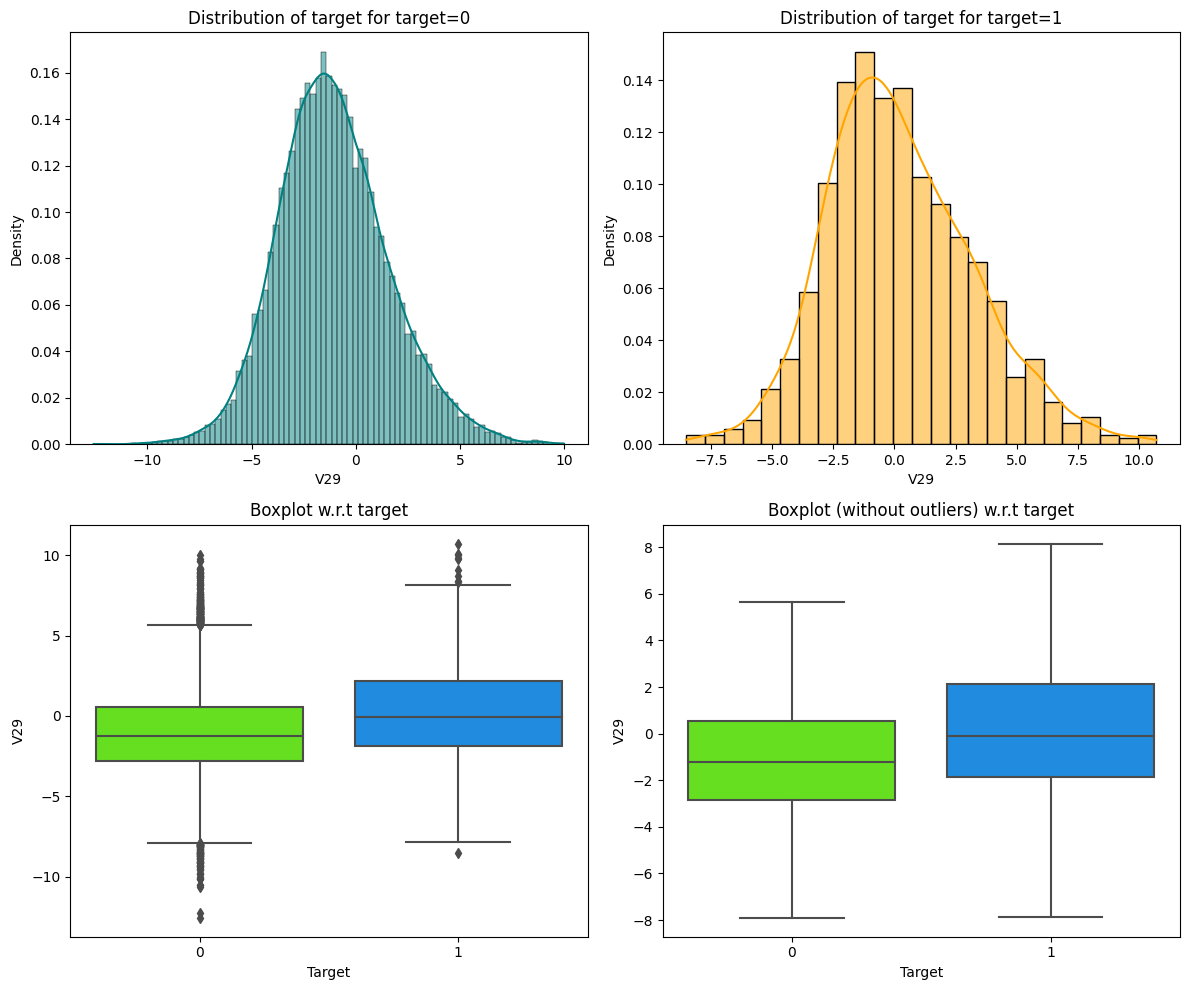

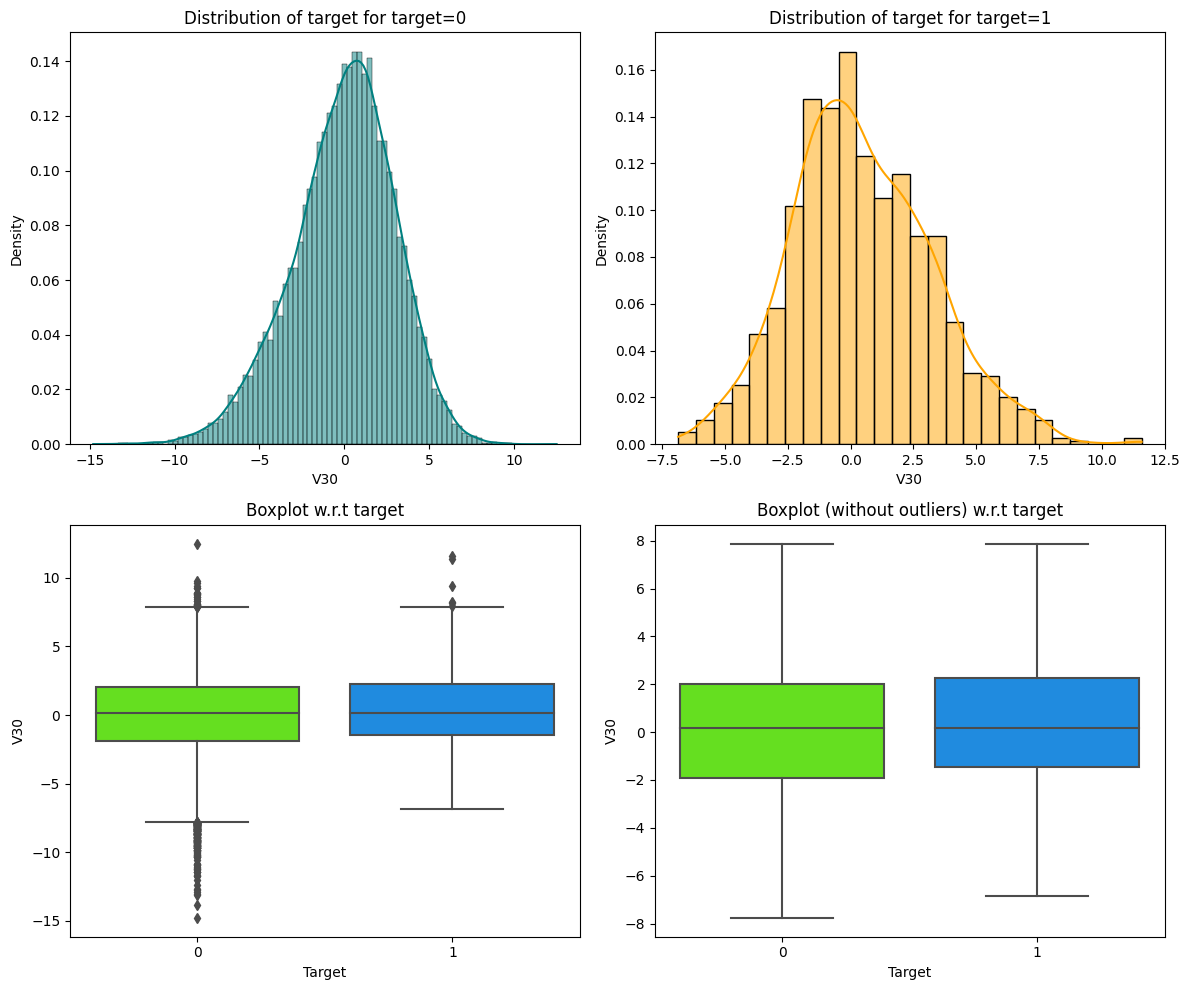

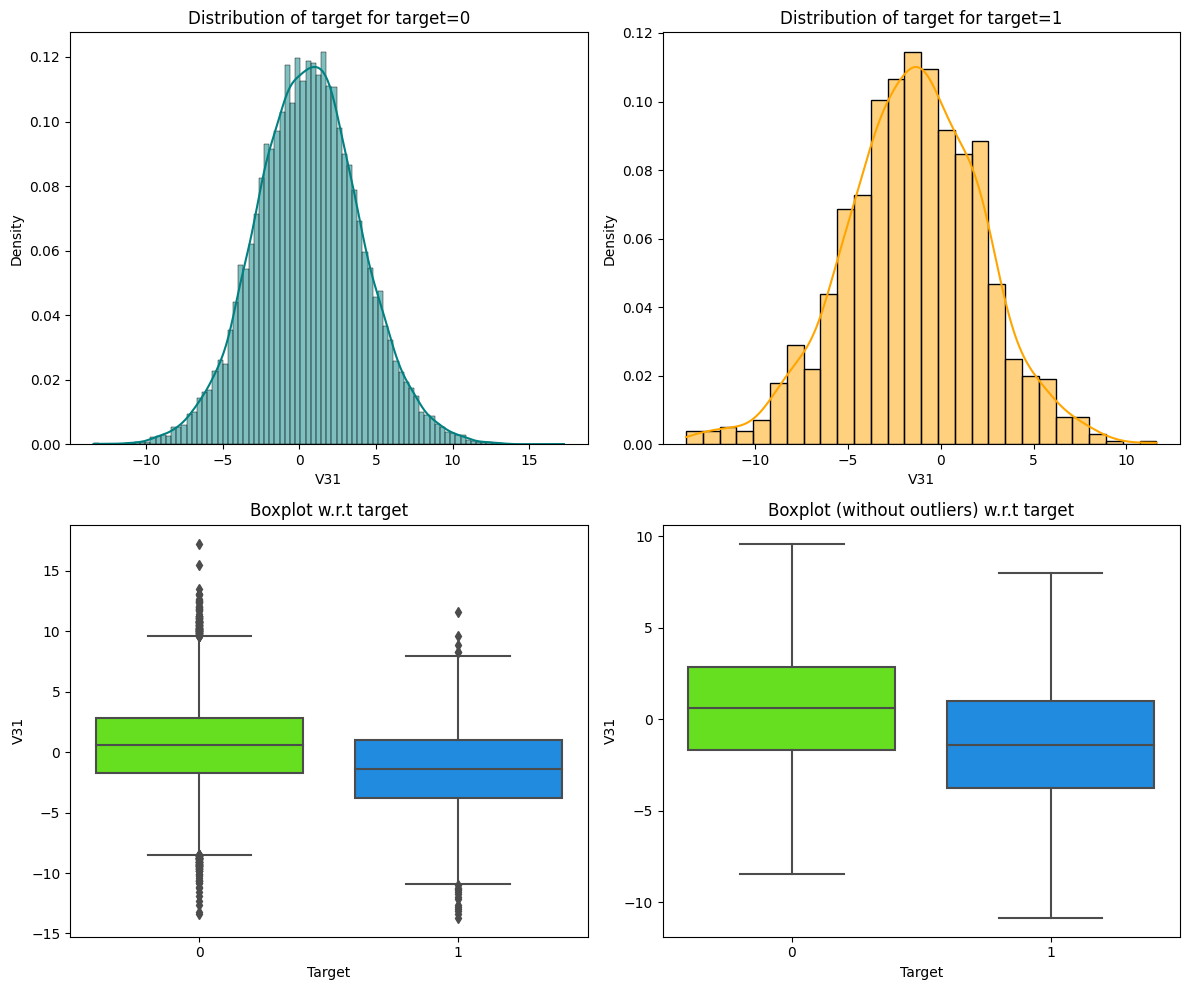

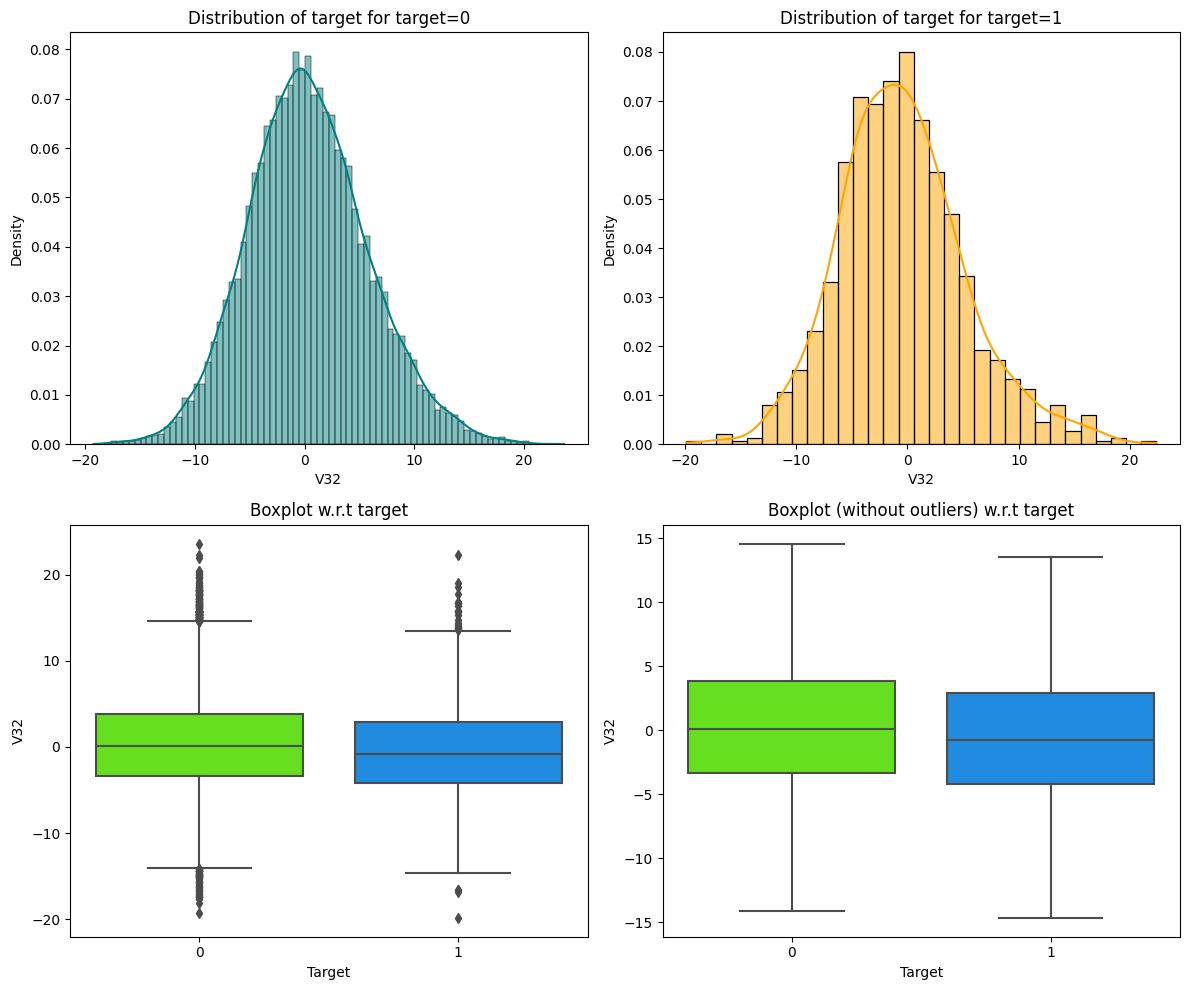

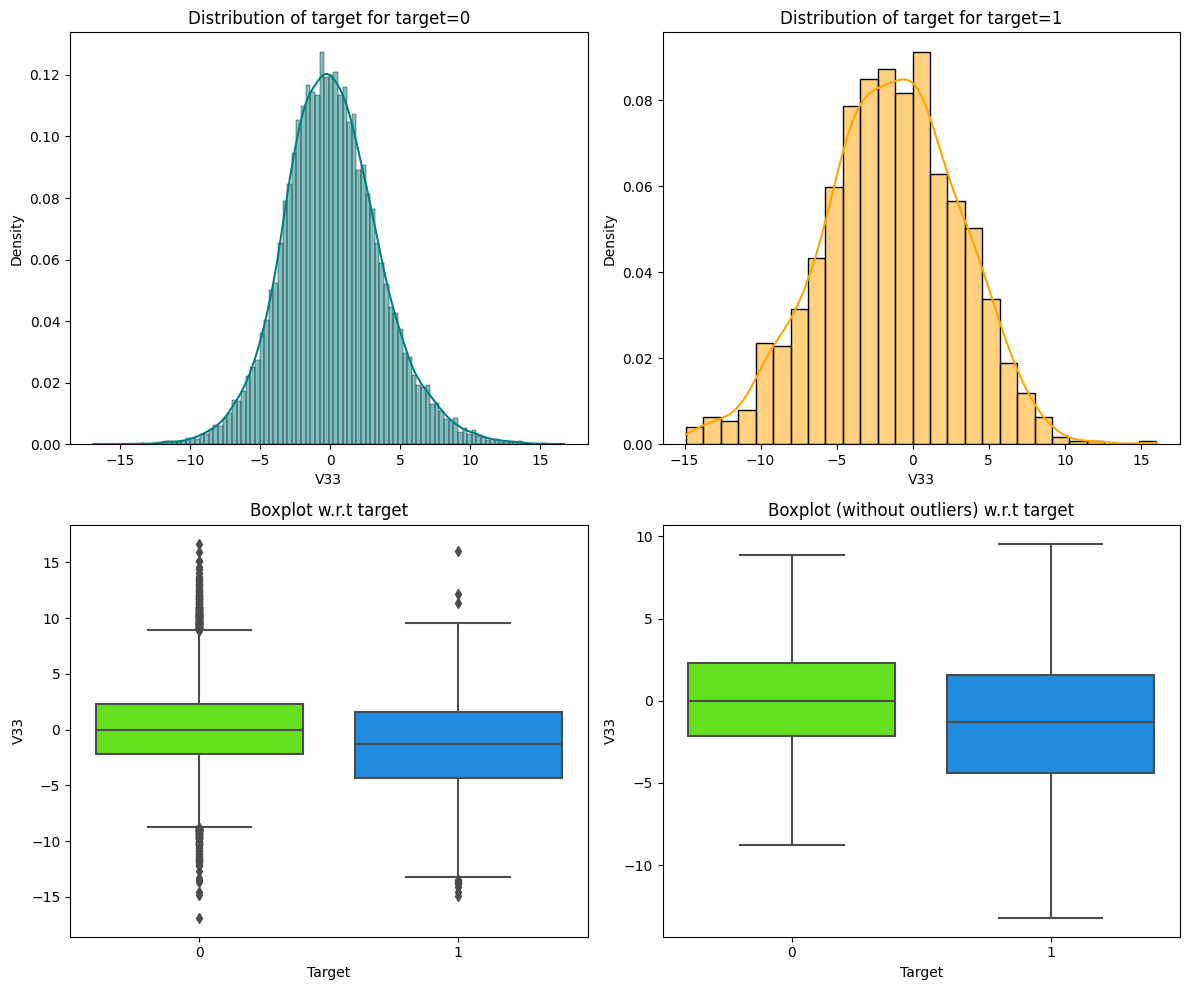

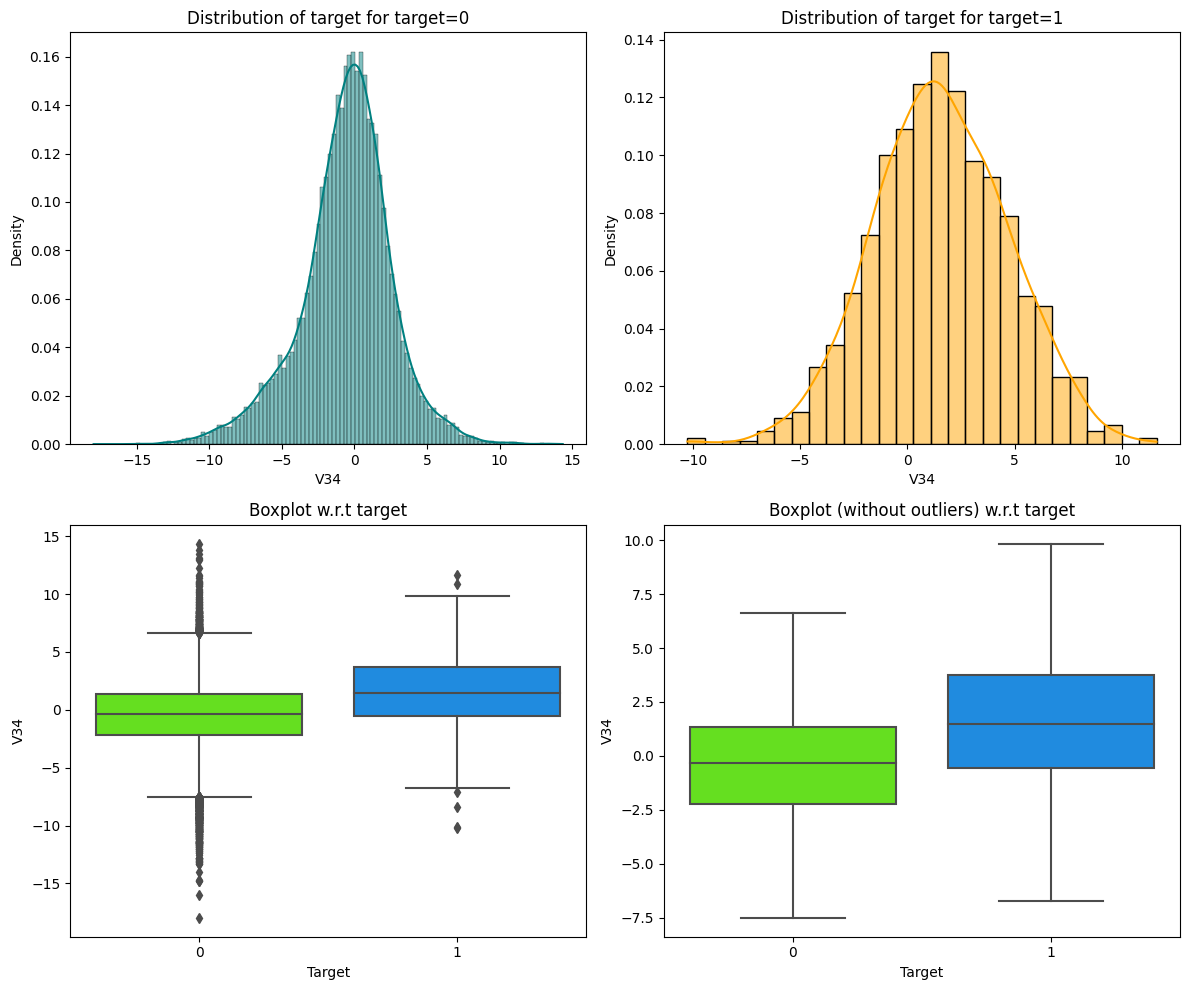

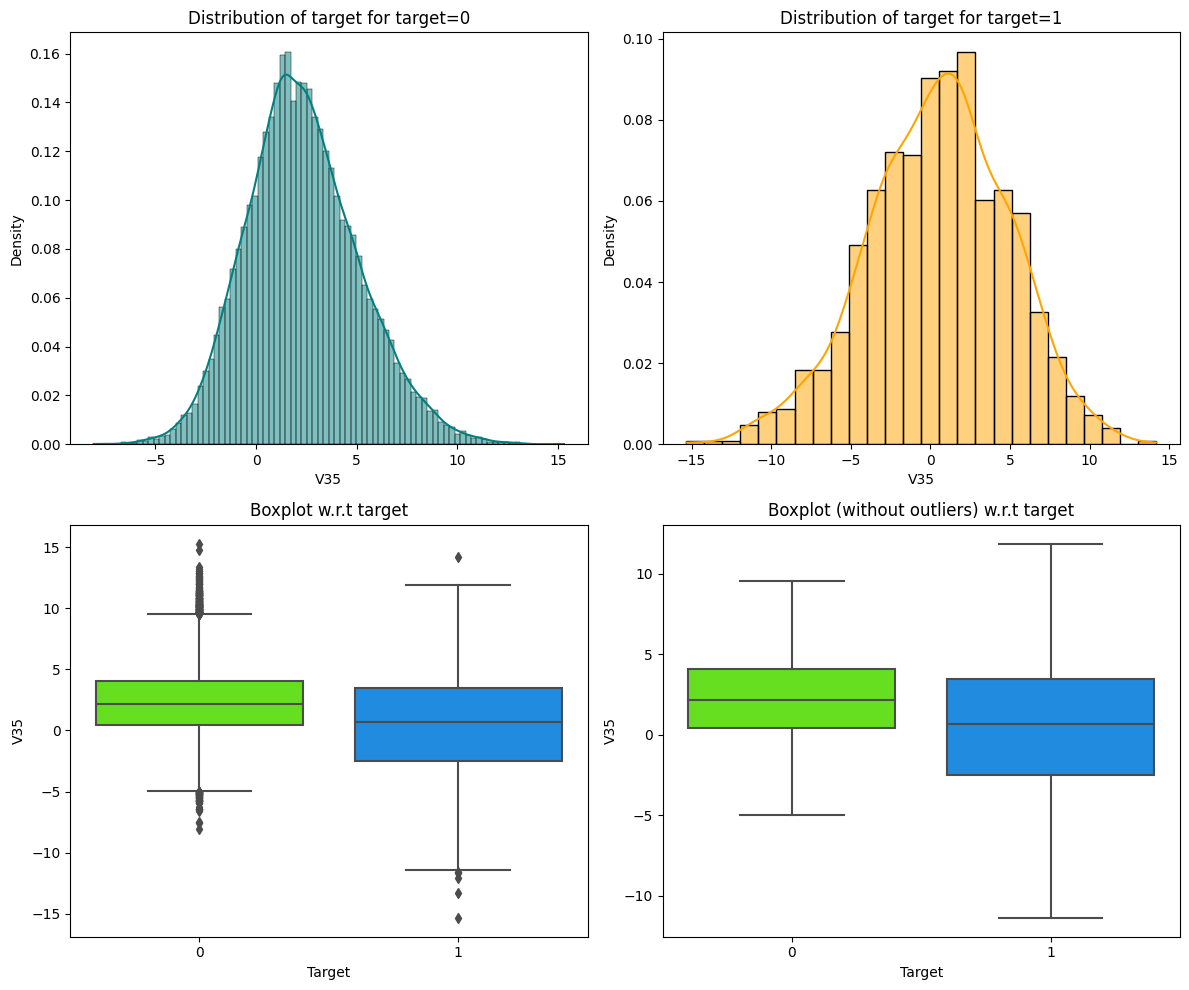

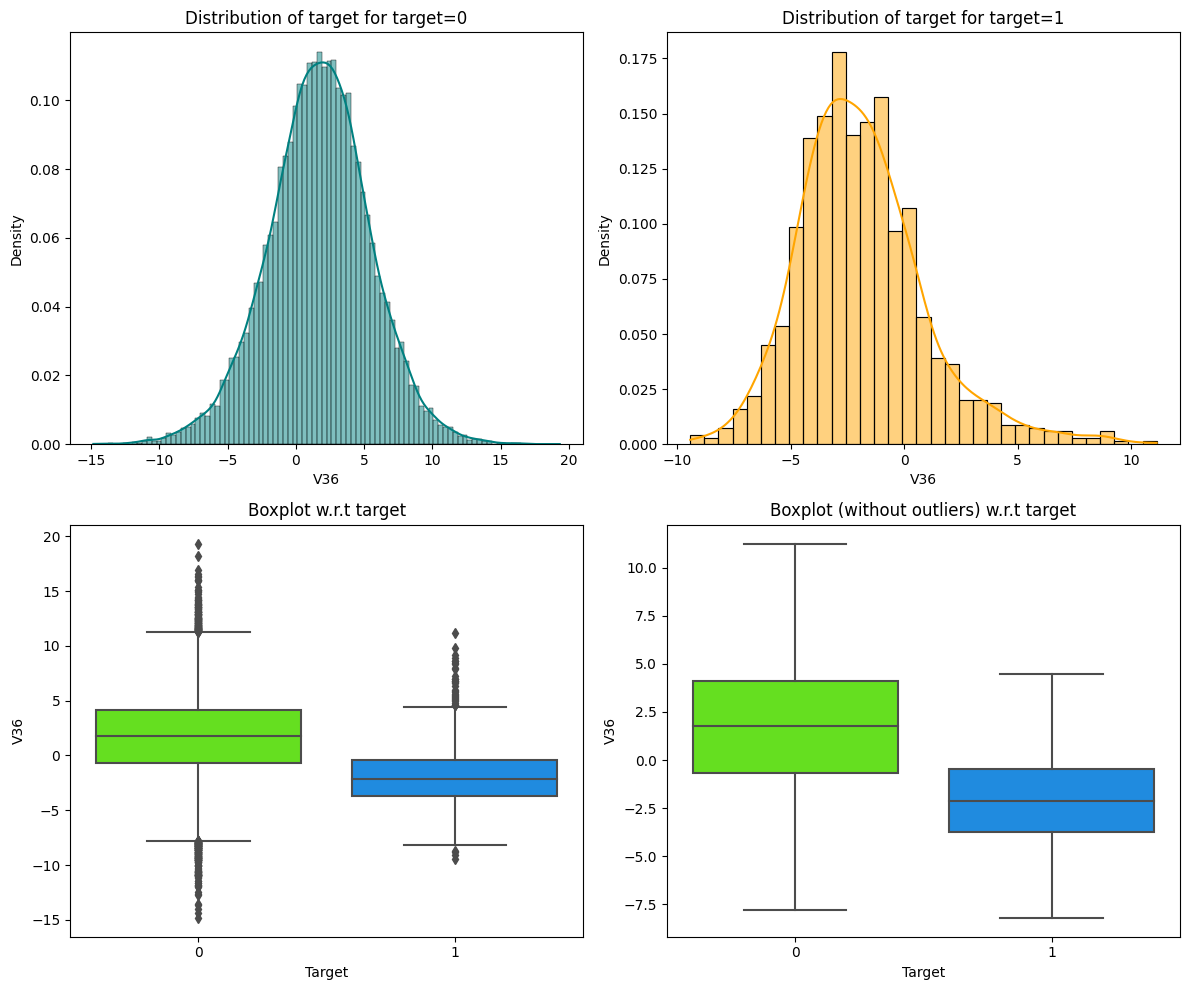

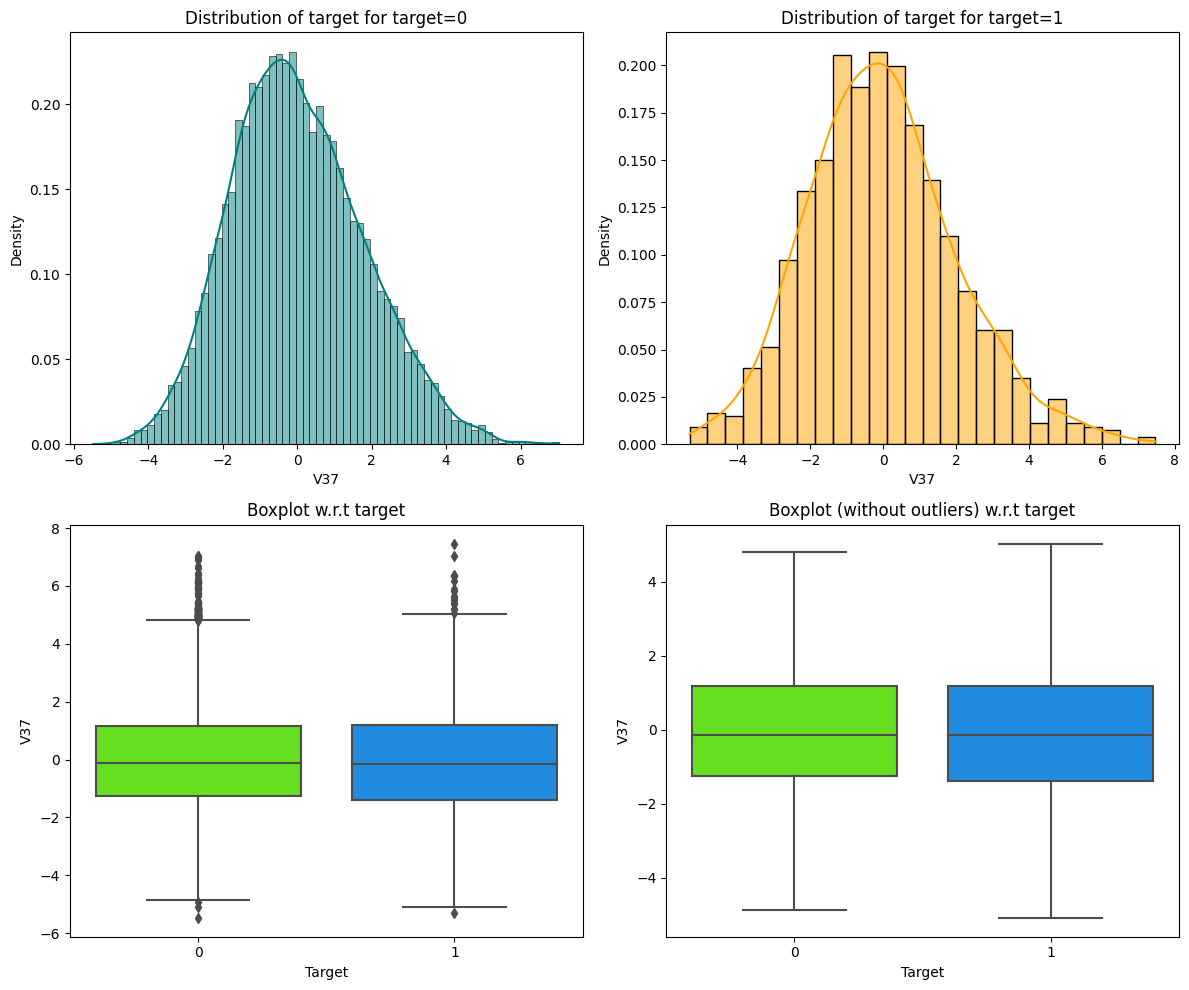

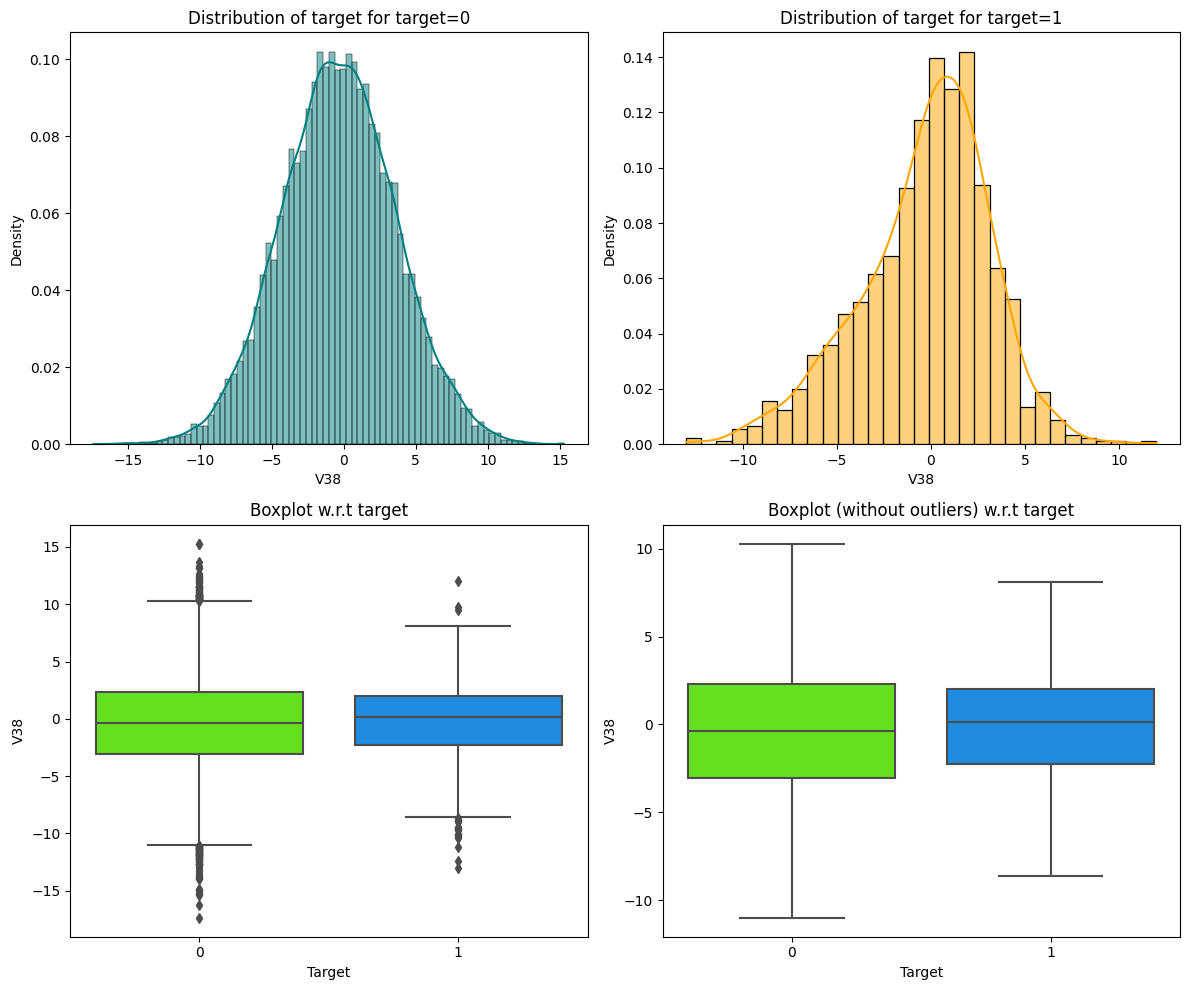

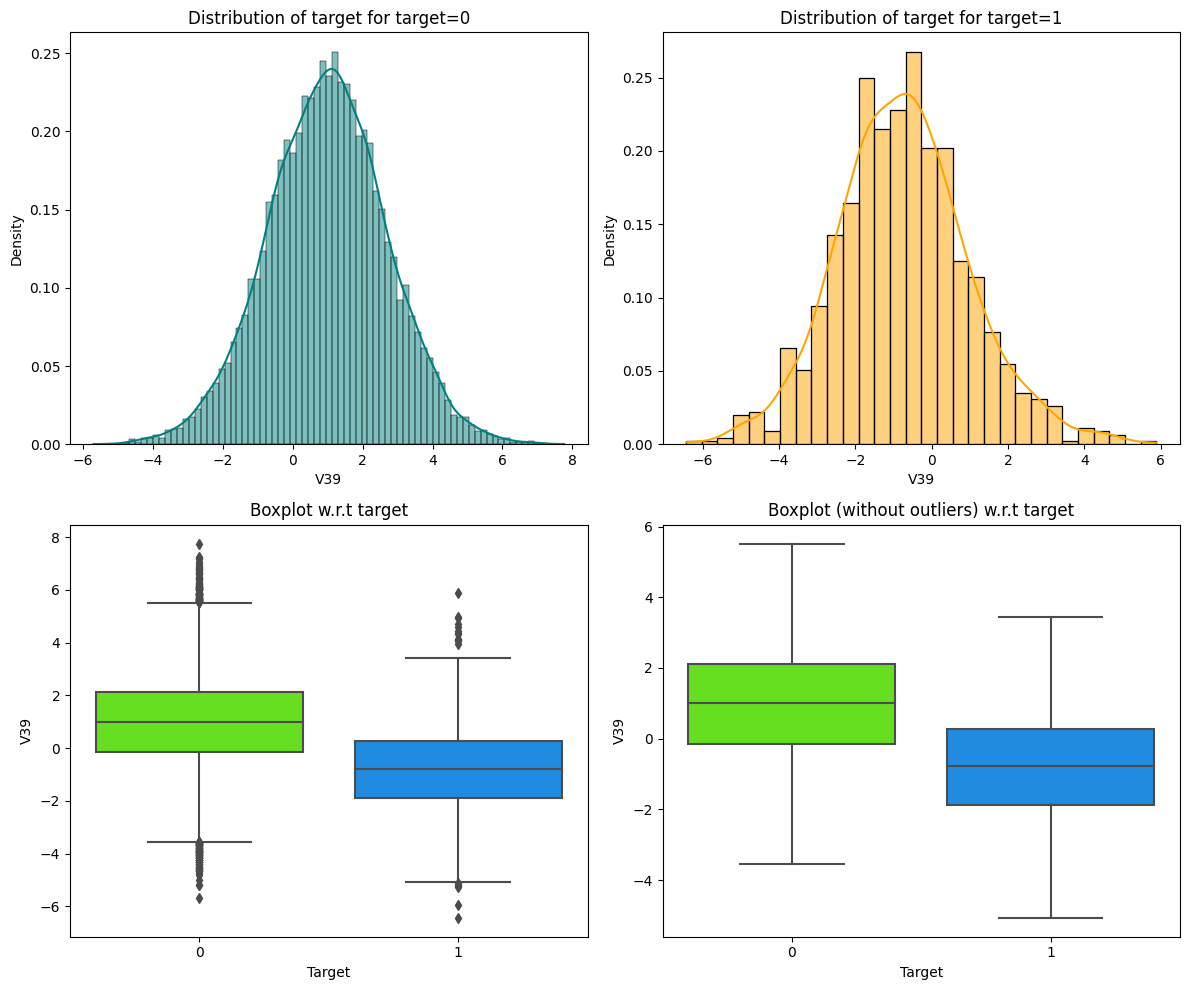

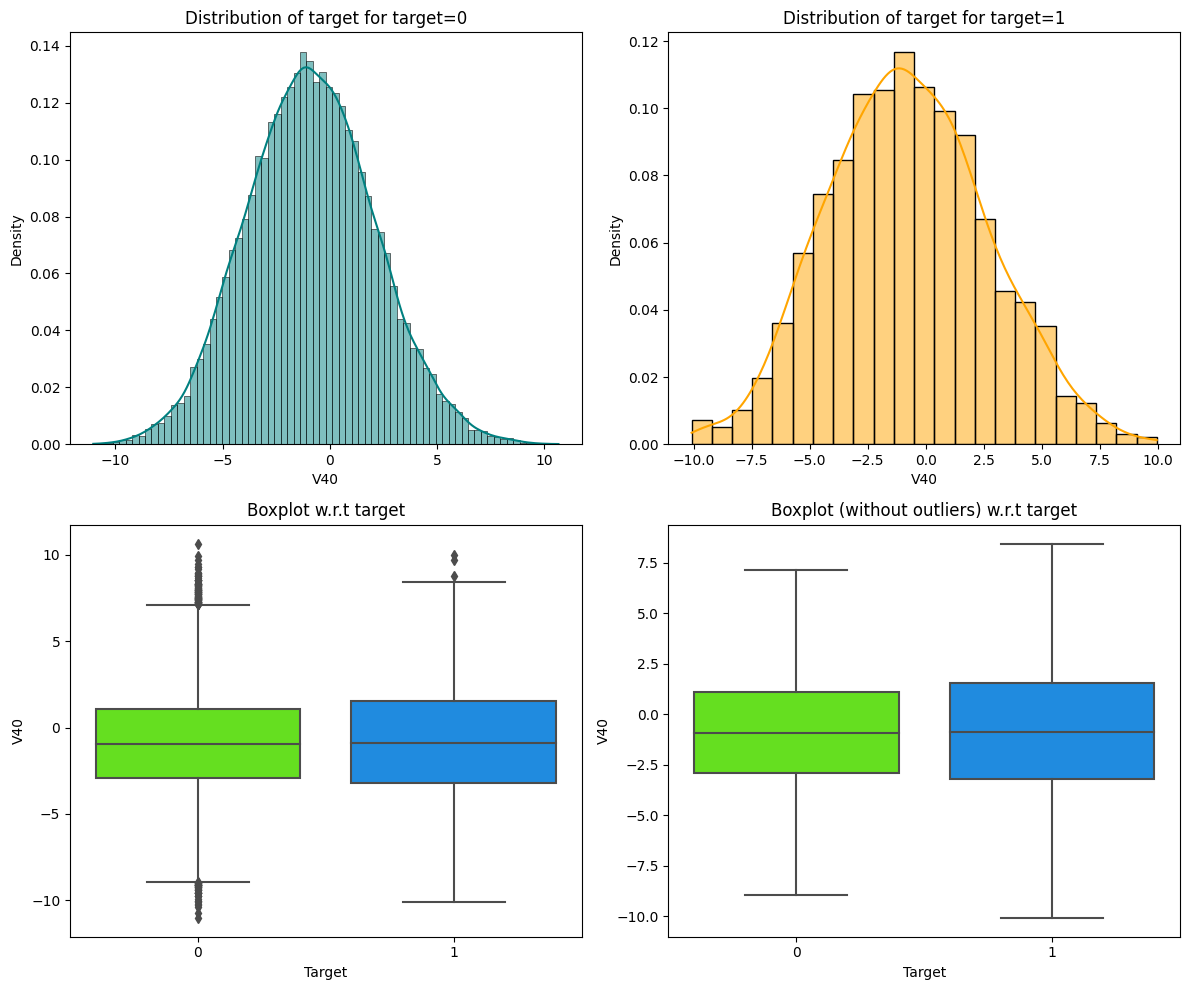

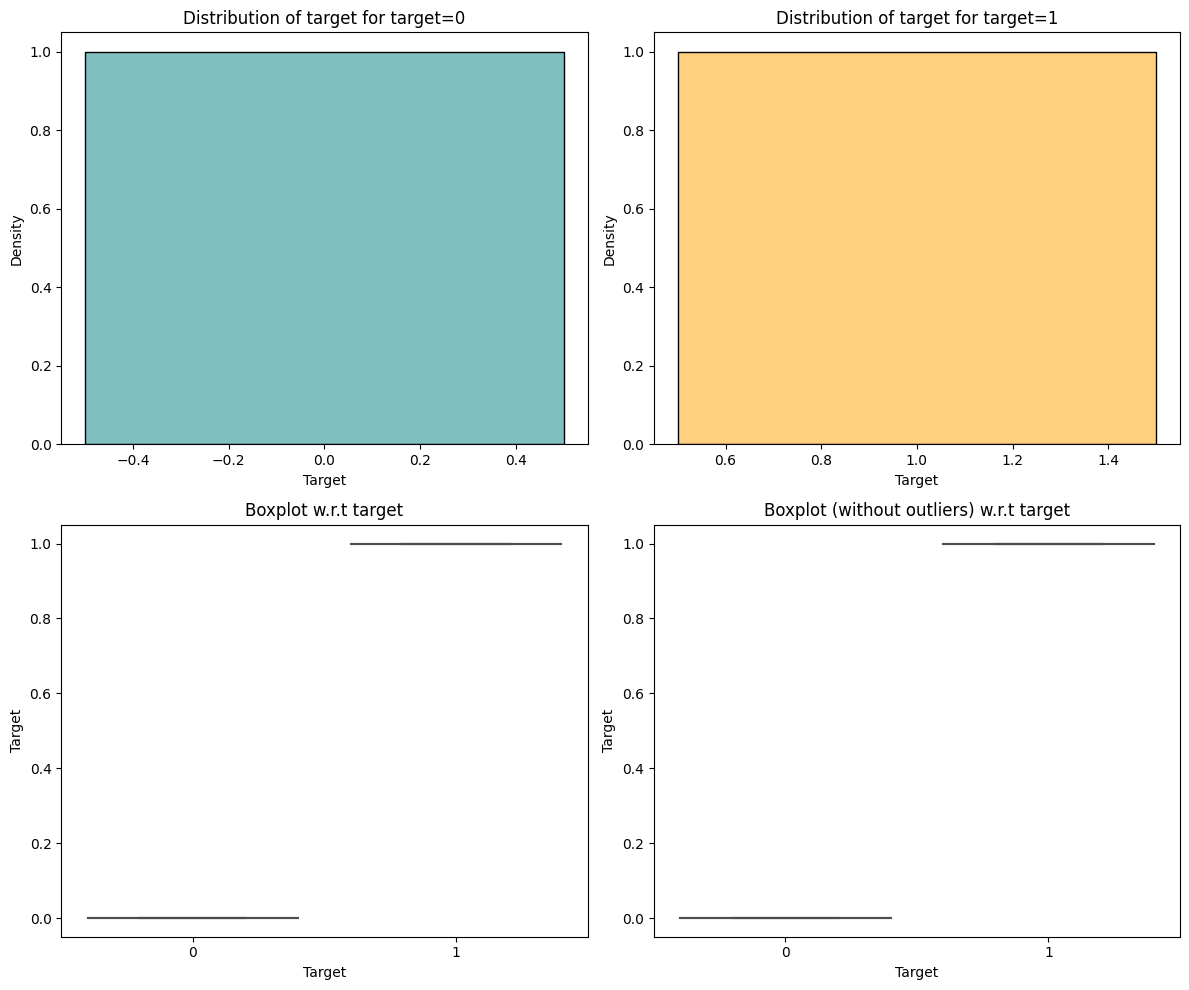

In [37]:
# Creating conditional statement to graph all variables at once
for i in train.columns:
    distribution_plot_wrt_target(train, i, "Target")

- Failing generators tend to have higher scores on V1, V4, V7, V8, V11, V14, V15, V16, V21, V28, and V34.
- Failing generators tend to have lower scores on V3, V5, V13, V18, V26, V31, V35, V36, and V39.

## Data Preprocessing

### Data Preparation for Modeling

In [5]:
# Separating target variable and other variables
X = train.drop(columns="Target")
Y = train["Target"]

In [6]:
# Splitting data into training, and validation set:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)
print(X_train.shape, X_val.shape)

(15000, 40) (5000, 40)


In [7]:
print("Percentage of classes in train set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in val set:")
print(y_val.value_counts(normalize=True))

Percentage of classes in train set:
0   0.945
1   0.055
Name: Target, dtype: float64
Percentage of classes in val set:
0   0.944
1   0.056
Name: Target, dtype: float64


In [7]:
# Separating target variable and other variables in test set
X_test = test.drop(columns="Target")
Y_test = test["Target"]

In [9]:
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Percentage of classes in test set:
0   0.944
1   0.056
Name: Target, dtype: float64


- Preservation of target class ratio was achieved.

### Missing-Value Treatment


In [8]:
imputer = SimpleImputer(strategy="median")

In [9]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [10]:
# Checking missing values in train and test set
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

- All missing values were imputed.

## Model Building

### Model evaluation criterion:

**Model can make wrong predictions as**:
1. (FP) Predicting a generator is failing when it's not; result in inspection costs.
2. (FN) Predicting a generator is not failing when it is; result in result in replacement costs.
**Which case is more important?**
* (FN) Predicting a generator is not failing when it is; result in result in replacement costs.

**How to reduce this loss i.e need to reduce False Negatives?**
* Recall needs to be maximized; greater the Recall lesser the chances of false negatives.

In [11]:
# Scorer for cross-validation and hyperparameter tuning
scorer = metrics.make_scorer(metrics.recall_score)

In [12]:
# Function to compute different metrics for performance check
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [13]:
# Function for confusion metrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

**Using KFold and cross_val_score for model building and tuning top model using GridSearchCV and RandomizedSearchCV**



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.6982829521679532
Random forest: 0.7235192266070268
Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118

Validation Performance:

dtree: 0.7050359712230215
Random forest: 0.7266187050359713
Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863


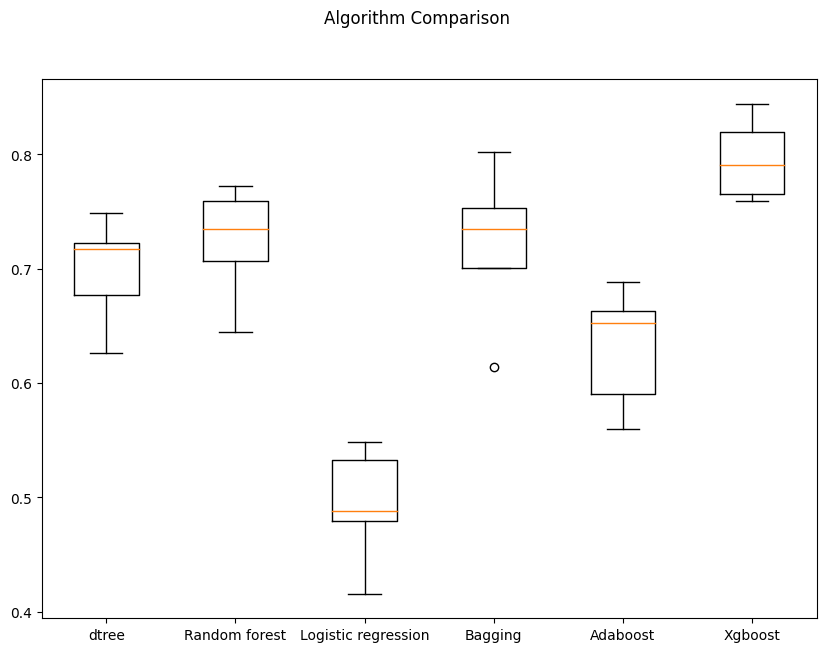

In [ ]:
# Boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving the highest cross-validated recall score followed by Bagging and then Random Forest.

## Model Building with oversampled data

In [15]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1': 832
Before Oversampling, counts of label '0': 14168 

After Oversampling, counts of label '1': 14168
After Oversampling, counts of label '0': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



In [ ]:
# Oversampled data model building
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scorer,cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9720494245534969
Random forest: 0.9839075260047615
Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209

Validation Performance:

dtree: 0.7769784172661871
Random forest: 0.8489208633093526
Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439


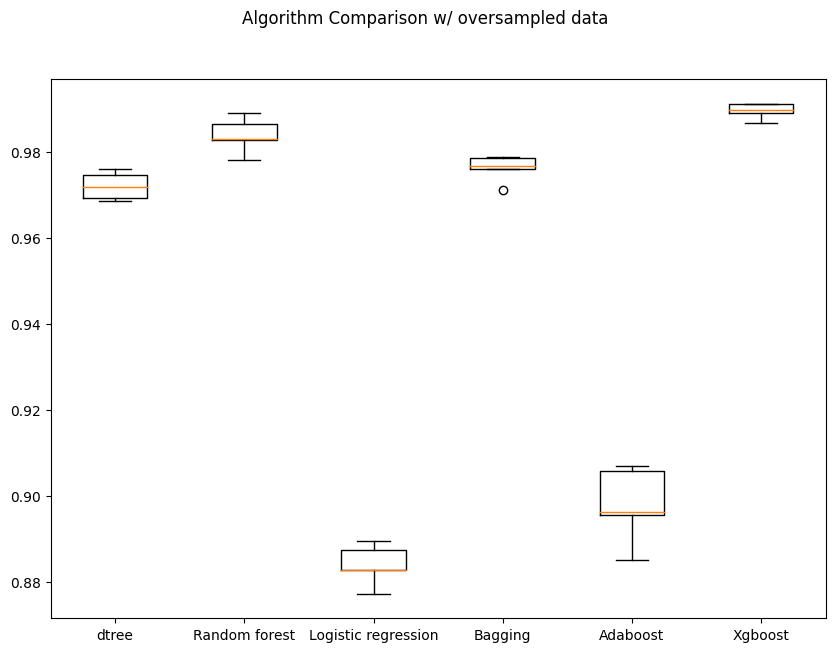

In [ ]:
# Boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison w/ oversampled data")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

- XGBoost is still giving the highest cross-validated recall score followed by Random Forest and then Bagging.

## Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



In [ ]:
# Undersampled data model building
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer,cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8617776495202367
Random forest: 0.9038669648654498
Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858

Validation Performance:

dtree: 0.841726618705036
Random forest: 0.8920863309352518
Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267


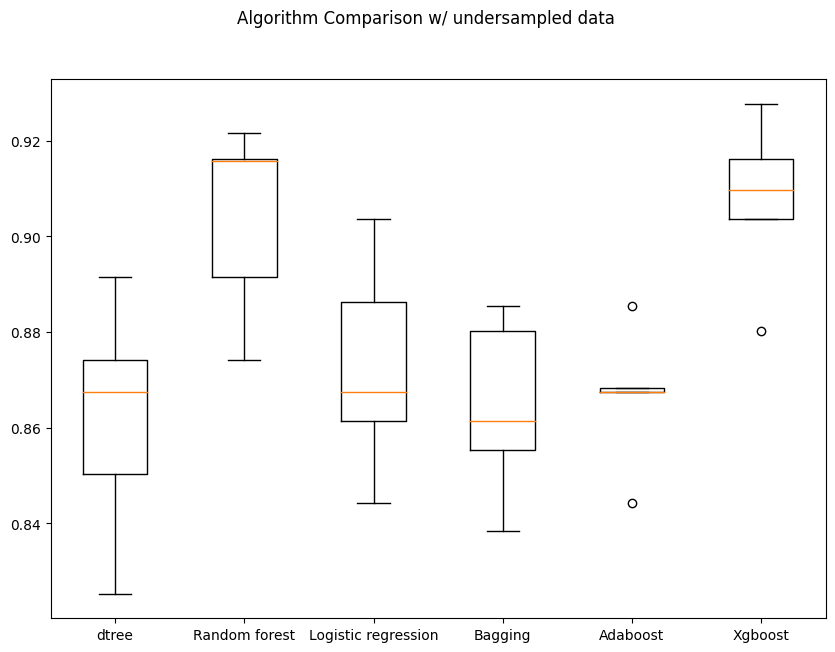

In [ ]:
# Boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison w/ undersampled data")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

- XGBoost is still giving the highest cross-validated recall score followed by Random Forest and surprisingly Log Reg, though there's no much difference between recall scores from Log Reg and Bagging.

## Hyperparameter Tuning

- We will tune models with the highest scores:
  - XBoost w/ undersampled data
  - Random Forest  w/ oversampled data
  - Bagging w/ oversampled data
  
Using RandomizedSearchCV.

### Random Forest w/ oversampled data

#### RandomSearchCV

In [ ]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.002, 'max_samples': 0.3, 'max_features': 0.5000000000000001, 'max_depth': 3, 'class_weight': 'balanced_subsample'} with CV score=0.8975855933235699:
CPU times: user 20.6 s, sys: 1.07 s, total: 21.7 s
Wall time: 27min 27s


In [ ]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=200,
    min_samples_leaf=7,
    max_features=0.5000000000000001,
    max_samples=0.3,
    class_weight='balanced_subsample',
    max_depth=3,
    min_impurity_decrease=0.002
)

# Fit the model on training data
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.5000000000000001, max_samples=0.3,
                       min_impurity_decrease=0.002, min_samples_leaf=7,
                       n_estimators=200, random_state=1)

In [ ]:
rf_random_train = model_performance_classification_sklearn(rf_tuned, X_train_over, y_train_over)
print("Training performance:")
rf_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.896   0.899      0.894 0.896

In [ ]:
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.877   0.856      0.293 0.437

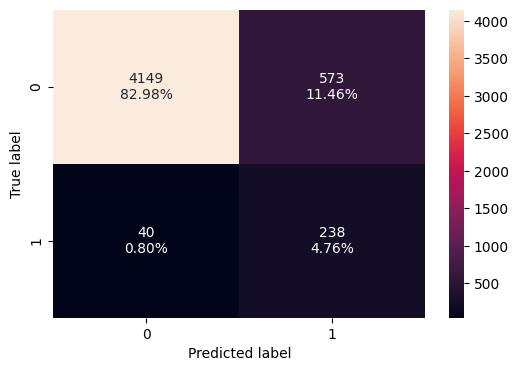

In [ ]:
# Confusion matrix on val set
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

### Bagging w/ oversampled data

#### RandomSearchCV

In [ ]:
%%time 

# defining model
model = BaggingClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9819312961639474:
CPU times: user 57 s, sys: 1.21 s, total: 58.2 s
Wall time: 32min 3s


In [44]:
# Creating new model with best parameters
bagging_tuned = BaggingClassifier(
    random_state=1,
    max_features=0.8,
    n_estimators=50,
    max_samples=0.9
)

bagging_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
bagging_random_train = model_performance_classification_sklearn(bagging_tuned, X_train_over, y_train_over)
print("Training performance:")
bagging_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
bagging_random_val = model_performance_classification_sklearn(bagging_tuned, X_val, y_val)
print("Validation performance:")
bagging_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.986   0.860      0.888 0.874

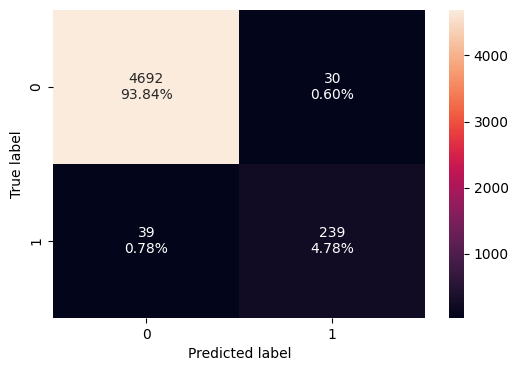

In [ ]:
# Confusion matrix on val set
confusion_matrix_sklearn(bagging_tuned, X_val, y_val)

### XGBoost w/ undersampled data

#### RandomizedSearchCV

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}
      
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=1.0:
CPU times: user 1.09 s, sys: 123 ms, total: 1.22 s
Wall time: 1min 7s


In [ ]:
# Creating new model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)

xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [ ]:
xgb_random_train = model_performance_classification_sklearn(xgb_tuned, X_train_un, y_train_un)
print("Training performance:")
xgb_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

In [ ]:
xgb_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgb_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.056   1.000      0.056 0.105

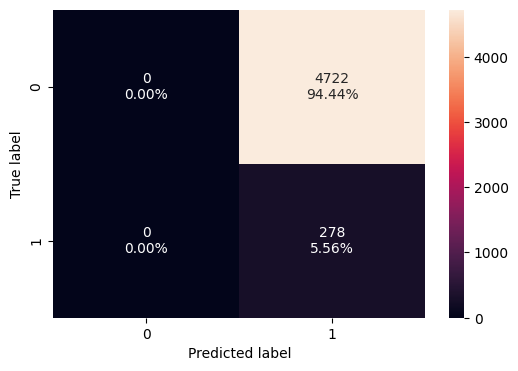

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_random_train.T,
        bagging_random_train.T,
        rf_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost tuned with undersampled data",
    "Bagging tuned with oversampled data",
    "Random forest tuned with oversampled data",
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGBoost tuned with undersampled data  \
Accuracy                                  0.500   
Recall                                    1.000   
Precision                                 0.500   
F1                                        0.667   

           Bagging tuned with oversampled data  \
Accuracy                                 1.000   
Recall                                   1.000   
Precision                                1.000   
F1                                       1.000   

           Random forest tuned with oversampled data  
Accuracy                                       0.896  
Recall                                         0.899  
Precision                                      0.894  
F1                                             0.896

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_random_val.T,
        bagging_random_val.T,
        rf_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost tuned with undersampled data",
    "Bagging tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


XGBoost tuned with undersampled data  \
Accuracy                                  0.056   
Recall                                    1.000   
Precision                                 0.056   
F1                                        0.105   

           Bagging tuned with oversampled data  \
Accuracy                                 0.986   
Recall                                   0.860   
Precision                                0.888   
F1                                       0.874   

           Random forest tuned with oversampled data  
Accuracy                                       0.877  
Recall                                         0.856  
Precision                                      0.293  
F1                                             0.437

- XGBoost is having perfect scores on Recall because the model is checking all generators as failing. This model won't work.
- Bagging model is over-fitting train data but is doing better on validation set compared to Random Forest.
- We will use Bagging Classifier as our final model. 

Let's check the final model's performance on the test set.

In [ ]:
# Calculating different metrics on the test set
bagging_tuned_test = model_performance_classification_sklearn(bagging_tuned, X_test, Y_test)
print("Test performance:")
bagging_tuned_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.984   0.823      0.889 0.855

- The performance on the test data is generalised, with average/good Recall score.


## Pipeline

In [17]:
# Separating target variable and other variables
X_train_final = train.drop(columns="Target")
Y_train_final = train["Target"]

In [18]:
# Separating target variable and other variables in test set
X_test_final = test.drop(columns="Target")
Y_test_final = test["Target"]

In [20]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ("Bagging_tuned", BaggingClassifier(
                random_state=1,
                max_features=0.8,
                n_estimators=50,
                max_samples=0.9
            )),
    ]
)

In [21]:
imputer = SimpleImputer(strategy="median")
X_train_final = imputer.fit_transform(X_train_final)

In [22]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over_final, Y_train_over_final = sm.fit_resample(X_train_final, Y_train_final)

In [23]:
# Fit the model on training data
model.fit(X_train_over_final, Y_train_over_final)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Bagging_tuned',
                 BaggingClassifier(max_features=0.8, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

In [24]:
# Performance on test set
Model_test = model_performance_classification_sklearn(model, X_test_final, Y_test_final)
Model_test

Accuracy  Recall  Precision    F1
0     0.985   0.833      0.897 0.864

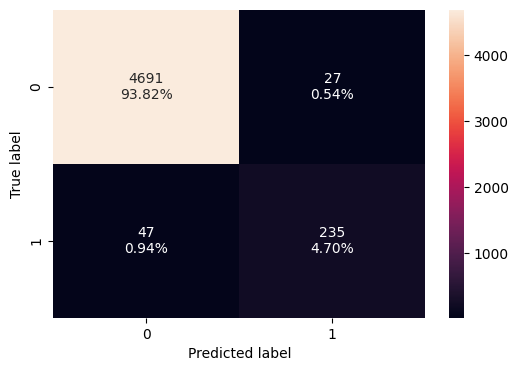

In [38]:
confusion_matrix_sklearn(model, X_test_final, Y_test_final)

- The model has a Recall score of 83%, and it's generalising on the rest of the variables.

Feature: 0, Score: 0.00305
Feature: 1, Score: 0.00269
Feature: 2, Score: 0.01048
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.03514
Feature: 5, Score: 0.00391
Feature: 6, Score: 0.00804
Feature: 7, Score: 0.00206
Feature: 8, Score: 0.01525
Feature: 9, Score: 0.00382
Feature: 10, Score: 0.01536
Feature: 11, Score: 0.00690
Feature: 12, Score: 0.00223
Feature: 13, Score: 0.01982
Feature: 14, Score: 0.00324
Feature: 15, Score: 0.06790
Feature: 16, Score: 0.00111
Feature: 17, Score: 0.14839
Feature: 18, Score: 0.00209
Feature: 19, Score: 0.00141
Feature: 20, Score: 0.00567
Feature: 21, Score: 0.00140
Feature: 22, Score: 0.00236
Feature: 23, Score: 0.00296
Feature: 24, Score: 0.00160
Feature: 25, Score: 0.06339
Feature: 26, Score: 0.00175
Feature: 27, Score: 0.00165
Feature: 28, Score: 0.00119
Feature: 29, Score: 0.00955
Feature: 30, Score: 0.00208
Feature: 31, Score: 0.00306
Feature: 32, Score: 0.00193
Feature: 33, Score: 0.00316
Feature: 34, Score: 0.00354
Feature: 35, Score: 0.16360
Fe

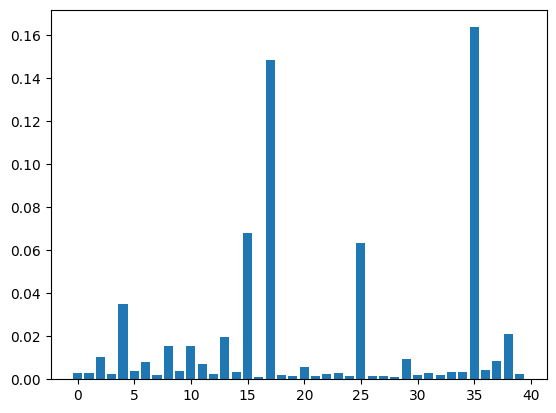

In [54]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
results = permutation_importance(bagging_tuned, X_train_over_final,Y_train_over_final, scoring='recall')

# Get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Top most important features are:
  - V35
  - V17
  - V15
  - V25
  - V4

## Business Insights and Recommendations

- The following variables have moderate to high impact on the performance of generators. It's important to keep an eye on them.
  - Failing generators tend to have higher scores on V1, V4, V7, V8, V11, V14, V15, V16, V21, V28, and V34.
  - Failing generators tend to have lower scores on V3, V5, V13, V18, V26, V31, V35, V36, and V39.
- Out of all relevant variables above, the most important ones that need extra special attention are:
  - V35
  - V17
  - V15
  - V25
  - V4
- A lot of the variables have high positive and negative correlations with each other, meaning that the values for some can drastically predict the outcome of another potentially important variable that directly affects the chances of a failing generator.
- The model can predict up to 83% of failing generators, and has an overall accuracy of 98%.
